# Part 1: Simulating the robot

In [1]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0 and h <= 0.01):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [2]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [3]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [4]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [5]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [6]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Step Size 1

In [7]:
U_save6 = []
t_save6 = []
x_save6 = []
x_exact_save6 = []


##saves every time
U_array6 = []
t_array6 = []
x_array6 = []
x_exact_array6 = []

#step size 
U_save6,t_save6,x_save6,x_exact_save6,U_array6,t_array6,x_array6,x_exact_array6=simulation(0,0,1)

## Saving values into a dataframe and plotting it 

In [8]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)
data6= {'X':x_array6,'T':t_array6}
df6= pd.DataFrame(data6)

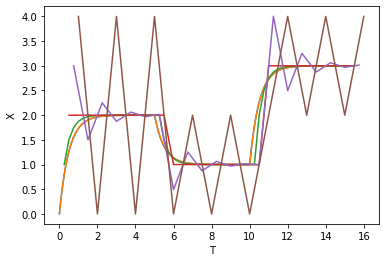

In [9]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple
plt8 = sns.lineplot(x="T", y="X", data=df6) #Purple

## Error evaluation against step size

In [10]:
data2 = {'H = 0.001':x_save1,'Time(H = 0.001)':t_save1}
df2= pd.DataFrame(data2)
data2_1 = {'H(Exact)0.001':x_exact_save1}
df2_1 = pd.DataFrame(data2_1)
data3 = {'H = 0.01':x_save2,'Time(H = 0.01)':t_save2}
df3= pd.DataFrame(data3)
data3_1 = {'H(Exact)0.01':x_exact_save2}
df3_1 = pd.DataFrame(data3_1)
data4= {'H = 0.25':x_array3,'Time(H = 0.25)':t_array3}
df4= pd.DataFrame(data4)
data4_1 = {'H(Exact)0.25':x_exact_array3}
df4_1 = pd.DataFrame(data4_1)
data5= {'H = 0.5':x_array4,'Time(H = 0.5)':t_array4}
df5= pd.DataFrame(data5)
data5_1 = {'H(Exact)0.5':x_exact_array4}
df5_1 = pd.DataFrame(data5_1)
data6= {'H = 0.75':x_array5,'Time(H = 0.75)':t_array5}
df6= pd.DataFrame(data6)
data6_1 = {'H(Exact)0.75':x_exact_array5}
df6_1 = pd.DataFrame(data6_1)
data7= {'H = 1':x_array6,'Time(H = 1)':t_array6}
df7= pd.DataFrame(data7)
data7_1 = {'H(Exact)0.75':x_exact_array6}
df7_1 = pd.DataFrame(data7_1)
frames = [df2,df2_1, df3,df3_1,df4,df4_1,df5,df5_1,df6,df6_1,df7,df7_1]
result = pd.concat(frames, axis=1, sort=False)
result

,H = 0.001,Time(H = 0.001),H(Exact)0.001,H = 0.01,Time(H = 0.01),H(Exact)0.01,H = 0.25,Time(H = 0.25),H(Exact)0.25,H = 0.5,Time(H = 0.5),H(Exact)0.5,H = 0.75,Time(H = 0.75),H(Exact)0.75,H = 1,Time(H = 1),H(Exact)0.75
0,0.039642,0.01,1.019801,0.365854,0.1,1.181269,1.0000,0.25,1.393469,2.0,0.5,1.632121,3.0000,0.75,1.776870,4.0,1.0,1.864665
1,0.078498,0.02,1.039211,0.664784,0.2,1.329680,1.5000,0.50,1.632121,2.0,1.0,1.864665,1.5000,1.50,1.950213,0.0,2.0,1.981684
2,0.116584,0.03,1.058235,0.909031,0.3,1.451188,1.7500,0.75,1.776870,2.0,1.5,1.950213,2.2500,2.25,1.988891,4.0,3.0,1.997521
3,0.153915,0.04,1.076884,1.108599,0.4,1.550671,1.8750,1.00,1.864665,2.0,2.0,1.981684,1.8750,3.00,1.997521,0.0,4.0,1.999665
4,0.190506,0.05,1.095163,1.271661,0.5,1.632121,1.9375,1.25,1.917915,2.0,2.5,1.993262,2.0625,3.75,1.999447,4.0,5.0,1.999955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2.999902,14.96,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,2.999904,14.97,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,2.999906,14.98,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,2.999908,14.99,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
result.to_csv("Step_sizes2.csv")

## Error evaluation for step size

In [12]:
path = "Step_sizes1.csv"
df = pd.read_csv(path, encoding = 'utf-8')
df

,Unnamed: 0,H = 0.001,Time(H = 0.001),H(Exact)0.001,H = 0.01,Time(H = 0.01),H(Exact)0.01,H = 0.25,Time(H = 0.25),H(Exact)0.25,...,H(Exact)0.75.1,Unnamed: 19,Unnamed: 20,2,4.5,5.5,5.01,Unnamed: 25,4.99,5.1
0,0,0.039642,0.01,1.019801,0.365854,0.1,1.181269,1.0000,0.25,1.393469,...,1.864665,NaN,NaN,THIS ABOVE IS COLUMN NUMBER,condition,condition,NaN,NaN,4.90,5.10
1,1,0.078498,0.02,1.039211,0.664784,0.2,1.329680,1.5000,0.50,1.632121,...,1.981684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.75,5.25
2,2,0.116584,0.03,1.058235,0.909031,0.3,1.451188,1.7500,0.75,1.776870,...,1.997521,NaN,NaN,STEP VALUE,TIME = 5,EXACT VALUE,ERROR,NaN,NaN,NaN
3,3,0.153915,0.04,1.076884,1.108599,0.4,1.550671,1.8750,1.00,1.864665,...,1.999665,NaN,Step =0.5,2,5,1.9999546,4.54,NaN,NaN,NaN
4,4,0.190506,0.05,1.095163,1.271661,0.5,1.632121,1.9375,1.25,1.917915,...,1.999955,NaN,Step =0.75,2.015625,5.25,1.999972464,1565.2536,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,2.999902,14.96,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,1496,2.999904,14.97,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,1497,2.999906,14.98,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,1498,2.999908,14.99,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean Data

In [13]:
cleaned = df.iloc[[9,10,11,3,4,5],[20,21,22,23,24]]
cleaned

,Unnamed: 20,2,4.5,5.5,5.01
9,Step = 0.001,1.999910105,5,1.9999546,-4.4495
10,Step =0.01,1.999917952,5,1.9999546,-3.6648
11,Step = 0.25,1.999998093,5,1.9999546,4.3493
3,Step =0.5,2,5,1.9999546,4.54
4,Step =0.75,2.015625,5.25,1.999972464,1565.2536
5,Step = 1,4,5,1.9999546,200004.54


In [14]:
errors_y_axis = cleaned.iloc[:,-1]
errors_y_axis
error_y = []
for a in errors_y_axis:
    error_y.append(float(a))

### Graphed data

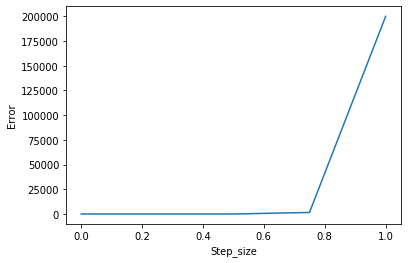

In [15]:
#6 data points...
error_y
error_step_x_axis = [0.001,0.01,0.25,0.5,0.75,1]
#data6= {'X':x_array6,'T':t_array6}
error_df = {'Error':error_y,'Step_size':error_step_x_axis}
err_plt = pd.DataFrame(error_df)
plot = sns.lineplot(x="Step_size", y="Error", data=err_plt) 

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [16]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)   #calculate standard deviation of input array
_mean1 = stat.mean(x_array1)      #calculate mean of input array

std_dev = 0.0431                  #set custom standard deviation
_mean = 0.5                       #set custom mean
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [17]:
def box_muller(array,standard_deviation,mean):
    random_vls = []
    i = 0
    it = 0                    #switches between the 2 random numbers generated
    box_1 = []                #saves value from one of the numbers generated
    box_2 = []                #saves values from the other number generated
    while i < len(array):     #while its not end of the input array
        if(it == 0):
            z1 =  rand.uniform(0,2*np.pi)       #generate random number between 0 and 2 * pi
            b  =  standard_deviation*np.sqrt(-2*math.log(rand.uniform(0,1)))     
            z2 =  b*(math.sin(z1))+mean
            z3 =  b*(math.cos(z1))+mean
            box_1.append(z2)
            noise = array[i] + z2
            random_vls.append(noise)
            it = 1
            i = i + 1
        else:
            it = 0
            box_2.append(z3)
            noise = array[i] + z3
            random_vls.append(noise)
            i= i + 1
    return random_vls,box_1,box_2

In [18]:
random_vals = []
random_vals,b1,b2 = box_muller(x_save2,std_dev,_mean)
noise_data= {'Noise_x':random_vals}
noise_df= pd.DataFrame(noise_data)
noise_df.to_csv("Noise_x.csv")

## Noise plot

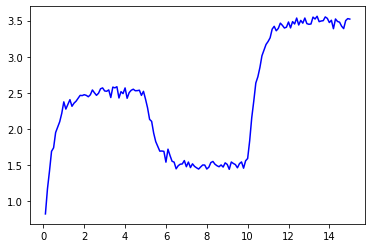

In [19]:
y = random_vals
x = t_save2
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

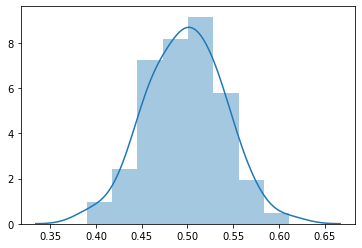

In [20]:
sns.distplot(b1)

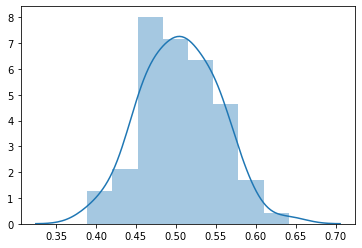

In [21]:
sns.distplot(b2)

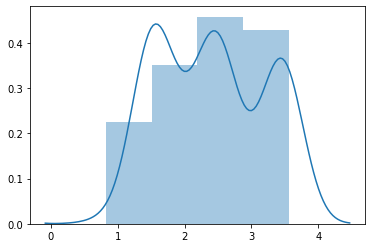

In [22]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

## Sigmoid Activation

In [23]:
def sigmoid_activation(val):
    sigmoid = 1/(1+np.exp(-val))#sigmoid activation function
    return sigmoid

def train_weights3(array, lr, loops):
    weights3 = [rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)] #initialise weights
    weights3_1 = []             #append/save created weights
    itr_array = []
    sum_error_array = []
    for loop in range(loops):   #for each epoch in epochs
        net_array = []          #append network values
        error_array = []        #append error array
        sum_error = 0.0         #keep track of sum_error
        c = 0                   #counter variable
        w_adaptor = 0           #weight counter(used to iterate through each value in weights array)
        if loop < 1:            #if its less than one epoch, create new weights and append them to an array
            for a in array:     #for each input in array input
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]]) #append weights created
                prediction = predict3(a,weights3)                                #grab weights created and predict
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction      #calculate error
                error = delta
                error_array.append(error)        #append error
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0]*lr*error           #calculate weight change for bias
                weights3[0] = weights3[0] + weights3_change_bias#add calculated weight change to bias
                weights3_change= -a[0]*lr*error                 #calculate weight change for inputs
                for i in range(len(a)):                         #for each input in input array
                    weights3[i + 1] = weights3[i +1] + weights3_change #obtain respective weight and add it with the weight change
                sum_error += error**2            #calculate sum_error
                c = c + 1                        #increment counter
            sum_error_array.append(sum_error)
            itr_array.append(loop)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
        else:                               #if epoch is > 1
            for a in array:                 #for each input in input array
                prediction = predict3(a,weights3_1[w_adaptor]) #calculate predictions using weights from previous epoch
                if c == 0:
                    Target = a[2]
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = prediction - Target #calculate error
                error = delta
                error_array.append(error)   #append error
                net_array.append(prediction)#append predictions
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change_bias = -a[0] *lr*(error) #calulate weight change for bias
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias #update bias weight in the saved weights array
                weights3_change= -a[0]*(error)*lr       #calculate weight change for weights in input
                for i in range(len(a)):                 #for each input in input array
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change #update respective weights in weights array
                sum_error += error**2                   #calculate sum_error
                c = c + 1                               #increment counter
                w_adaptor = w_adaptor + 1               #increment weight counter
            itr_array.append(loop)
            sum_error_array.append(sum_error)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
    return net_array,sum_error_array,weights3_1,itr_array
            
def predict3(noise2,weights2):
    net_sum = 1
    net_sum +=net_sum*weights2[0] #obtain bias from weight array
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i] #multiply input by respective weight to obtain a summation
    activation2 = sigmoid_activation(net_sum)  #implement sigmoid function to summation obtained
    return activation2               #return activation and network sum

#normalize data and feed into tuple
def triple_converter(array):                   #converts input into a tuple so that we can pass 3 input weights per prediction
    triple_array = []
    c = 0 #counter
    while c < len(array):
        if c == 0:
            triple_array.append([0,0,array[c]])
        elif c == 1:
            triple_array.append([0,array[c],array[c-1]])
        else:
            triple_array.append([array[c],array[c-1],array[c-2]])
        c = c + 1                              #increment counter
    return triple_array


##----------------------------------------ACCURACY CALCULATOR--------------------------------------##
def accuracy(Target, Predicted):
    Expected = abs(Target - Predicted)
    result = Expected/Target * 100
    return result


## Step function activation

In [24]:
##--------------------------------SINGLE PERCEPTRON-----------------------------------------------##
def predict_step(noise1,weights1):
    net_sum = 0                                #net_sum initialise
    out = 0                                    #initialise output of step function
    net_sum = weights1[0]                      #grab bias from weights and set as current net_sum 
    for i in range(len(noise1)-1):             #for every input
        net_sum += weights1[i + 1] * noise1[i] #multiply each input to weight and add result to netsum
    if net_sum > 1: #if netsum is greater than 1                        
        out = 1     #set output of step to 1
    else:           #else
        out = 0     #set output to 0
    return out      #return output

def train_weights_step(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)] #initialise weights
    weights3_1 = []             #append/save created weights
    itr_array = []
    sum_error_array = []
    for loop in range(loops):   #for each epoch in epochs
        net_array = []          #append network values
        error_array = []        #append error array
        sum_error = 0.0         #keep track of sum_error
        c = 0                   #counter variable
        w_adaptor = 0           #weight counter(used to iterate through each value in weights array)
        if loop < 1:            #if its less than one epoch, create new weights and append them to an array
            for a in array:     #for each input in array input
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]]) #append weights created
                prediction = predict_step(a,weights3)                                #grab weights created and predict
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction      #calculate error
                error = delta
                #print(error)
                error_array.append(error)        #append error
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0]*lr*error           #calculate weight change for bias
                weights3[0] = weights3[0] + weights3_change_bias#add calculated weight change to bias
                weights3_change= -a[0]*lr*error                 #calculate weight change for inputs
                for i in range(len(a)):                         #for each input in input array
                    weights3[i + 1] = weights3[i +1] + weights3_change #obtain respective weight and add it with the weight change
                sum_error += error**2            #calculate sum_error
                c = c + 1                        #increment counter
            sum_error_array.append(sum_error)
            itr_array.append(loop)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
        else:                               #if epoch is > 1
            for a in array:                 #for each input in input array
                prediction = predict_step(a,weights3_1[w_adaptor]) #calculate predictions using weights from previous epoch
                if c == 0:
                    Target = a[2]
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = prediction - Target #calculate error
                error = delta
                error_array.append(error)   #append error
                net_array.append(prediction)#append predictions
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change_bias = -a[0] *lr*(error) #calulate weight change for bias
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias #update bias weight in the saved weights array
                weights3_change= -a[0]*(error)*lr       #calculate weight change for weights in input
                for i in range(len(a)):                 #for each input in input array
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change #update respective weights in weights array
                sum_error += error**2                   #calculate sum_error
                c = c + 1                               #increment counter
                w_adaptor = w_adaptor + 1               #increment weight counter
            itr_array.append(loop)
            sum_error_array.append(sum_error)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
    return net_array,sum_error_array,weights3_1,itr_array

In [25]:
# 

# Implement weights function(sigmoid)

In [26]:
def implement_weights3(array,weights):
    net_array = []
    error_array = []
    sum_error = 0.0
    w_adaptor = 0
    for a in array: #loop through each input in array
        prediction, netwrk_sum = predict3(a,weights[w_adaptor]) #grab saved weight and predict
        net_array.append(prediction)   #append prediction
        Target = a[0]                  #current input
        error = Target - prediction    #error calculation
        error_array.append(error)      #append error
        sum_error += error**2          #calculate sum_error
        w_adaptor = w_adaptor + 1      #increment weight counter
    print('>error=%.3f,sum_error=%.3f' % (error, sum_error))
    return net_array,sum_error
            

## Train network using sigmoid

### normalize data

In [27]:
x_scaled = preprocessing.minmax_scale(random_vals)
dat1 = triple_converter(random_vals)
dat2 = triple_converter(x_scaled)
#dat2 = preprocessing.normalize(dat1)

In [28]:
#values,e,w,test,itrArray,accuracy_array = train_weights3(dat2, 0.01,100)
#0.006531
values,e,weights,itr = train_weights3(dat2, 0.01,5000)

>epoch=0, lrate=0.010, error=0.035, , sum_error=26.571
>epoch=1, lrate=0.010, error=-0.035, , sum_error=26.571
>epoch=2, lrate=0.010, error=-0.035, , sum_error=26.544
>epoch=3, lrate=0.010, error=-0.035, , sum_error=26.517
>epoch=4, lrate=0.010, error=-0.035, , sum_error=26.489
>epoch=5, lrate=0.010, error=-0.035, , sum_error=26.462
>epoch=6, lrate=0.010, error=-0.035, , sum_error=26.434
>epoch=7, lrate=0.010, error=-0.035, , sum_error=26.407
>epoch=8, lrate=0.010, error=-0.035, , sum_error=26.379
>epoch=9, lrate=0.010, error=-0.035, , sum_error=26.352
>epoch=10, lrate=0.010, error=-0.035, , sum_error=26.324
>epoch=11, lrate=0.010, error=-0.035, , sum_error=26.297
>epoch=12, lrate=0.010, error=-0.035, , sum_error=26.269
>epoch=13, lrate=0.010, error=-0.035, , sum_error=26.242
>epoch=14, lrate=0.010, error=-0.035, , sum_error=26.214
>epoch=15, lrate=0.010, error=-0.035, , sum_error=26.186
>epoch=16, lrate=0.010, error=-0.035, , sum_error=26.159
>epoch=17, lrate=0.010, error=-0.035, , su

>epoch=216, lrate=0.010, error=-0.027, , sum_error=20.349
>epoch=217, lrate=0.010, error=-0.027, , sum_error=20.320
>epoch=218, lrate=0.010, error=-0.027, , sum_error=20.291
>epoch=219, lrate=0.010, error=-0.027, , sum_error=20.262
>epoch=220, lrate=0.010, error=-0.027, , sum_error=20.233
>epoch=221, lrate=0.010, error=-0.027, , sum_error=20.204
>epoch=222, lrate=0.010, error=-0.027, , sum_error=20.175
>epoch=223, lrate=0.010, error=-0.027, , sum_error=20.146
>epoch=224, lrate=0.010, error=-0.027, , sum_error=20.117
>epoch=225, lrate=0.010, error=-0.027, , sum_error=20.089
>epoch=226, lrate=0.010, error=-0.027, , sum_error=20.060
>epoch=227, lrate=0.010, error=-0.027, , sum_error=20.031
>epoch=228, lrate=0.010, error=-0.027, , sum_error=20.002
>epoch=229, lrate=0.010, error=-0.027, , sum_error=19.973
>epoch=230, lrate=0.010, error=-0.026, , sum_error=19.945
>epoch=231, lrate=0.010, error=-0.026, , sum_error=19.916
>epoch=232, lrate=0.010, error=-0.026, , sum_error=19.887
>epoch=233, lr

>epoch=438, lrate=0.010, error=-0.021, , sum_error=14.490
>epoch=439, lrate=0.010, error=-0.021, , sum_error=14.467
>epoch=440, lrate=0.010, error=-0.021, , sum_error=14.443
>epoch=441, lrate=0.010, error=-0.021, , sum_error=14.420
>epoch=442, lrate=0.010, error=-0.021, , sum_error=14.397
>epoch=443, lrate=0.010, error=-0.021, , sum_error=14.374
>epoch=444, lrate=0.010, error=-0.021, , sum_error=14.351
>epoch=445, lrate=0.010, error=-0.021, , sum_error=14.328
>epoch=446, lrate=0.010, error=-0.021, , sum_error=14.305
>epoch=447, lrate=0.010, error=-0.021, , sum_error=14.282
>epoch=448, lrate=0.010, error=-0.021, , sum_error=14.260
>epoch=449, lrate=0.010, error=-0.021, , sum_error=14.237
>epoch=450, lrate=0.010, error=-0.021, , sum_error=14.214
>epoch=451, lrate=0.010, error=-0.021, , sum_error=14.191
>epoch=452, lrate=0.010, error=-0.021, , sum_error=14.168
>epoch=453, lrate=0.010, error=-0.021, , sum_error=14.146
>epoch=454, lrate=0.010, error=-0.021, , sum_error=14.123
>epoch=455, lr

>epoch=694, lrate=0.010, error=-0.017, , sum_error=9.566
>epoch=695, lrate=0.010, error=-0.017, , sum_error=9.550
>epoch=696, lrate=0.010, error=-0.017, , sum_error=9.535
>epoch=697, lrate=0.010, error=-0.017, , sum_error=9.519
>epoch=698, lrate=0.010, error=-0.017, , sum_error=9.504
>epoch=699, lrate=0.010, error=-0.017, , sum_error=9.489
>epoch=700, lrate=0.010, error=-0.017, , sum_error=9.473
>epoch=701, lrate=0.010, error=-0.017, , sum_error=9.458
>epoch=702, lrate=0.010, error=-0.017, , sum_error=9.442
>epoch=703, lrate=0.010, error=-0.017, , sum_error=9.427
>epoch=704, lrate=0.010, error=-0.017, , sum_error=9.412
>epoch=705, lrate=0.010, error=-0.016, , sum_error=9.397
>epoch=706, lrate=0.010, error=-0.016, , sum_error=9.381
>epoch=707, lrate=0.010, error=-0.016, , sum_error=9.366
>epoch=708, lrate=0.010, error=-0.016, , sum_error=9.351
>epoch=709, lrate=0.010, error=-0.016, , sum_error=9.336
>epoch=710, lrate=0.010, error=-0.016, , sum_error=9.321
>epoch=711, lrate=0.010, error=

>epoch=916, lrate=0.010, error=-0.014, , sum_error=6.710
>epoch=917, lrate=0.010, error=-0.014, , sum_error=6.700
>epoch=918, lrate=0.010, error=-0.014, , sum_error=6.689
>epoch=919, lrate=0.010, error=-0.014, , sum_error=6.679
>epoch=920, lrate=0.010, error=-0.014, , sum_error=6.669
>epoch=921, lrate=0.010, error=-0.014, , sum_error=6.658
>epoch=922, lrate=0.010, error=-0.014, , sum_error=6.648
>epoch=923, lrate=0.010, error=-0.014, , sum_error=6.638
>epoch=924, lrate=0.010, error=-0.014, , sum_error=6.627
>epoch=925, lrate=0.010, error=-0.014, , sum_error=6.617
>epoch=926, lrate=0.010, error=-0.014, , sum_error=6.607
>epoch=927, lrate=0.010, error=-0.014, , sum_error=6.596
>epoch=928, lrate=0.010, error=-0.014, , sum_error=6.586
>epoch=929, lrate=0.010, error=-0.014, , sum_error=6.576
>epoch=930, lrate=0.010, error=-0.014, , sum_error=6.566
>epoch=931, lrate=0.010, error=-0.014, , sum_error=6.556
>epoch=932, lrate=0.010, error=-0.014, , sum_error=6.545
>epoch=933, lrate=0.010, error=

>epoch=1124, lrate=0.010, error=-0.012, , sum_error=4.912
>epoch=1125, lrate=0.010, error=-0.012, , sum_error=4.905
>epoch=1126, lrate=0.010, error=-0.012, , sum_error=4.898
>epoch=1127, lrate=0.010, error=-0.012, , sum_error=4.891
>epoch=1128, lrate=0.010, error=-0.012, , sum_error=4.884
>epoch=1129, lrate=0.010, error=-0.012, , sum_error=4.877
>epoch=1130, lrate=0.010, error=-0.012, , sum_error=4.870
>epoch=1131, lrate=0.010, error=-0.012, , sum_error=4.863
>epoch=1132, lrate=0.010, error=-0.012, , sum_error=4.856
>epoch=1133, lrate=0.010, error=-0.012, , sum_error=4.850
>epoch=1134, lrate=0.010, error=-0.012, , sum_error=4.843
>epoch=1135, lrate=0.010, error=-0.012, , sum_error=4.836
>epoch=1136, lrate=0.010, error=-0.012, , sum_error=4.829
>epoch=1137, lrate=0.010, error=-0.012, , sum_error=4.822
>epoch=1138, lrate=0.010, error=-0.012, , sum_error=4.815
>epoch=1139, lrate=0.010, error=-0.012, , sum_error=4.808
>epoch=1140, lrate=0.010, error=-0.012, , sum_error=4.801
>epoch=1141, l

>epoch=1333, lrate=0.010, error=-0.010, , sum_error=3.706
>epoch=1334, lrate=0.010, error=-0.010, , sum_error=3.702
>epoch=1335, lrate=0.010, error=-0.010, , sum_error=3.697
>epoch=1336, lrate=0.010, error=-0.010, , sum_error=3.692
>epoch=1337, lrate=0.010, error=-0.010, , sum_error=3.688
>epoch=1338, lrate=0.010, error=-0.010, , sum_error=3.683
>epoch=1339, lrate=0.010, error=-0.010, , sum_error=3.679
>epoch=1340, lrate=0.010, error=-0.010, , sum_error=3.674
>epoch=1341, lrate=0.010, error=-0.010, , sum_error=3.669
>epoch=1342, lrate=0.010, error=-0.010, , sum_error=3.665
>epoch=1343, lrate=0.010, error=-0.010, , sum_error=3.660
>epoch=1344, lrate=0.010, error=-0.010, , sum_error=3.656
>epoch=1345, lrate=0.010, error=-0.010, , sum_error=3.651
>epoch=1346, lrate=0.010, error=-0.010, , sum_error=3.647
>epoch=1347, lrate=0.010, error=-0.010, , sum_error=3.642
>epoch=1348, lrate=0.010, error=-0.010, , sum_error=3.638
>epoch=1349, lrate=0.010, error=-0.010, , sum_error=3.633
>epoch=1350, l

>epoch=1534, lrate=0.010, error=-0.009, , sum_error=2.934
>epoch=1535, lrate=0.010, error=-0.009, , sum_error=2.931
>epoch=1536, lrate=0.010, error=-0.009, , sum_error=2.927
>epoch=1537, lrate=0.010, error=-0.009, , sum_error=2.924
>epoch=1538, lrate=0.010, error=-0.009, , sum_error=2.921
>epoch=1539, lrate=0.010, error=-0.009, , sum_error=2.918
>epoch=1540, lrate=0.010, error=-0.009, , sum_error=2.915
>epoch=1541, lrate=0.010, error=-0.009, , sum_error=2.912
>epoch=1542, lrate=0.010, error=-0.009, , sum_error=2.909
>epoch=1543, lrate=0.010, error=-0.009, , sum_error=2.906
>epoch=1544, lrate=0.010, error=-0.009, , sum_error=2.903
>epoch=1545, lrate=0.010, error=-0.009, , sum_error=2.900
>epoch=1546, lrate=0.010, error=-0.009, , sum_error=2.897
>epoch=1547, lrate=0.010, error=-0.009, , sum_error=2.893
>epoch=1548, lrate=0.010, error=-0.009, , sum_error=2.890
>epoch=1549, lrate=0.010, error=-0.009, , sum_error=2.887
>epoch=1550, lrate=0.010, error=-0.009, , sum_error=2.884
>epoch=1551, l

>epoch=1747, lrate=0.010, error=-0.008, , sum_error=2.389
>epoch=1748, lrate=0.010, error=-0.008, , sum_error=2.387
>epoch=1749, lrate=0.010, error=-0.008, , sum_error=2.385
>epoch=1750, lrate=0.010, error=-0.008, , sum_error=2.383
>epoch=1751, lrate=0.010, error=-0.008, , sum_error=2.381
>epoch=1752, lrate=0.010, error=-0.008, , sum_error=2.379
>epoch=1753, lrate=0.010, error=-0.008, , sum_error=2.377
>epoch=1754, lrate=0.010, error=-0.008, , sum_error=2.375
>epoch=1755, lrate=0.010, error=-0.008, , sum_error=2.373
>epoch=1756, lrate=0.010, error=-0.008, , sum_error=2.371
>epoch=1757, lrate=0.010, error=-0.008, , sum_error=2.369
>epoch=1758, lrate=0.010, error=-0.008, , sum_error=2.367
>epoch=1759, lrate=0.010, error=-0.008, , sum_error=2.365
>epoch=1760, lrate=0.010, error=-0.008, , sum_error=2.363
>epoch=1761, lrate=0.010, error=-0.008, , sum_error=2.361
>epoch=1762, lrate=0.010, error=-0.008, , sum_error=2.359
>epoch=1763, lrate=0.010, error=-0.008, , sum_error=2.357
>epoch=1764, l

>epoch=1961, lrate=0.010, error=-0.007, , sum_error=2.027
>epoch=1962, lrate=0.010, error=-0.007, , sum_error=2.026
>epoch=1963, lrate=0.010, error=-0.007, , sum_error=2.025
>epoch=1964, lrate=0.010, error=-0.007, , sum_error=2.023
>epoch=1965, lrate=0.010, error=-0.007, , sum_error=2.022
>epoch=1966, lrate=0.010, error=-0.007, , sum_error=2.021
>epoch=1967, lrate=0.010, error=-0.007, , sum_error=2.019
>epoch=1968, lrate=0.010, error=-0.007, , sum_error=2.018
>epoch=1969, lrate=0.010, error=-0.007, , sum_error=2.017
>epoch=1970, lrate=0.010, error=-0.007, , sum_error=2.015
>epoch=1971, lrate=0.010, error=-0.007, , sum_error=2.014
>epoch=1972, lrate=0.010, error=-0.007, , sum_error=2.013
>epoch=1973, lrate=0.010, error=-0.007, , sum_error=2.011
>epoch=1974, lrate=0.010, error=-0.007, , sum_error=2.010
>epoch=1975, lrate=0.010, error=-0.007, , sum_error=2.009
>epoch=1976, lrate=0.010, error=-0.007, , sum_error=2.007
>epoch=1977, lrate=0.010, error=-0.007, , sum_error=2.006
>epoch=1978, l

>epoch=2203, lrate=0.010, error=-0.006, , sum_error=1.761
>epoch=2204, lrate=0.010, error=-0.006, , sum_error=1.761
>epoch=2205, lrate=0.010, error=-0.006, , sum_error=1.760
>epoch=2206, lrate=0.010, error=-0.006, , sum_error=1.759
>epoch=2207, lrate=0.010, error=-0.006, , sum_error=1.758
>epoch=2208, lrate=0.010, error=-0.006, , sum_error=1.757
>epoch=2209, lrate=0.010, error=-0.006, , sum_error=1.756
>epoch=2210, lrate=0.010, error=-0.006, , sum_error=1.755
>epoch=2211, lrate=0.010, error=-0.006, , sum_error=1.754
>epoch=2212, lrate=0.010, error=-0.006, , sum_error=1.754
>epoch=2213, lrate=0.010, error=-0.006, , sum_error=1.753
>epoch=2214, lrate=0.010, error=-0.006, , sum_error=1.752
>epoch=2215, lrate=0.010, error=-0.006, , sum_error=1.751
>epoch=2216, lrate=0.010, error=-0.006, , sum_error=1.750
>epoch=2217, lrate=0.010, error=-0.006, , sum_error=1.749
>epoch=2218, lrate=0.010, error=-0.006, , sum_error=1.749
>epoch=2219, lrate=0.010, error=-0.006, , sum_error=1.748
>epoch=2220, l

>epoch=2396, lrate=0.010, error=-0.005, , sum_error=1.620
>epoch=2397, lrate=0.010, error=-0.005, , sum_error=1.619
>epoch=2398, lrate=0.010, error=-0.005, , sum_error=1.618
>epoch=2399, lrate=0.010, error=-0.005, , sum_error=1.618
>epoch=2400, lrate=0.010, error=-0.005, , sum_error=1.617
>epoch=2401, lrate=0.010, error=-0.005, , sum_error=1.616
>epoch=2402, lrate=0.010, error=-0.005, , sum_error=1.616
>epoch=2403, lrate=0.010, error=-0.005, , sum_error=1.615
>epoch=2404, lrate=0.010, error=-0.005, , sum_error=1.615
>epoch=2405, lrate=0.010, error=-0.005, , sum_error=1.614
>epoch=2406, lrate=0.010, error=-0.005, , sum_error=1.613
>epoch=2407, lrate=0.010, error=-0.005, , sum_error=1.613
>epoch=2408, lrate=0.010, error=-0.005, , sum_error=1.612
>epoch=2409, lrate=0.010, error=-0.005, , sum_error=1.612
>epoch=2410, lrate=0.010, error=-0.005, , sum_error=1.611
>epoch=2411, lrate=0.010, error=-0.005, , sum_error=1.610
>epoch=2412, lrate=0.010, error=-0.005, , sum_error=1.610
>epoch=2413, l

>epoch=2609, lrate=0.010, error=-0.005, , sum_error=1.510
>epoch=2610, lrate=0.010, error=-0.005, , sum_error=1.510
>epoch=2611, lrate=0.010, error=-0.005, , sum_error=1.510
>epoch=2612, lrate=0.010, error=-0.005, , sum_error=1.509
>epoch=2613, lrate=0.010, error=-0.005, , sum_error=1.509
>epoch=2614, lrate=0.010, error=-0.005, , sum_error=1.508
>epoch=2615, lrate=0.010, error=-0.005, , sum_error=1.508
>epoch=2616, lrate=0.010, error=-0.005, , sum_error=1.507
>epoch=2617, lrate=0.010, error=-0.005, , sum_error=1.507
>epoch=2618, lrate=0.010, error=-0.005, , sum_error=1.507
>epoch=2619, lrate=0.010, error=-0.005, , sum_error=1.506
>epoch=2620, lrate=0.010, error=-0.005, , sum_error=1.506
>epoch=2621, lrate=0.010, error=-0.005, , sum_error=1.505
>epoch=2622, lrate=0.010, error=-0.005, , sum_error=1.505
>epoch=2623, lrate=0.010, error=-0.005, , sum_error=1.505
>epoch=2624, lrate=0.010, error=-0.005, , sum_error=1.504
>epoch=2625, lrate=0.010, error=-0.005, , sum_error=1.504
>epoch=2626, l

>epoch=2812, lrate=0.010, error=-0.004, , sum_error=1.438
>epoch=2813, lrate=0.010, error=-0.004, , sum_error=1.438
>epoch=2814, lrate=0.010, error=-0.004, , sum_error=1.437
>epoch=2815, lrate=0.010, error=-0.004, , sum_error=1.437
>epoch=2816, lrate=0.010, error=-0.004, , sum_error=1.437
>epoch=2817, lrate=0.010, error=-0.004, , sum_error=1.436
>epoch=2818, lrate=0.010, error=-0.004, , sum_error=1.436
>epoch=2819, lrate=0.010, error=-0.004, , sum_error=1.436
>epoch=2820, lrate=0.010, error=-0.004, , sum_error=1.435
>epoch=2821, lrate=0.010, error=-0.004, , sum_error=1.435
>epoch=2822, lrate=0.010, error=-0.004, , sum_error=1.435
>epoch=2823, lrate=0.010, error=-0.004, , sum_error=1.435
>epoch=2824, lrate=0.010, error=-0.004, , sum_error=1.434
>epoch=2825, lrate=0.010, error=-0.004, , sum_error=1.434
>epoch=2826, lrate=0.010, error=-0.004, , sum_error=1.434
>epoch=2827, lrate=0.010, error=-0.004, , sum_error=1.433
>epoch=2828, lrate=0.010, error=-0.004, , sum_error=1.433
>epoch=2829, l

>epoch=3024, lrate=0.010, error=-0.004, , sum_error=1.384
>epoch=3025, lrate=0.010, error=-0.004, , sum_error=1.384
>epoch=3026, lrate=0.010, error=-0.004, , sum_error=1.384
>epoch=3027, lrate=0.010, error=-0.004, , sum_error=1.384
>epoch=3028, lrate=0.010, error=-0.004, , sum_error=1.384
>epoch=3029, lrate=0.010, error=-0.004, , sum_error=1.383
>epoch=3030, lrate=0.010, error=-0.004, , sum_error=1.383
>epoch=3031, lrate=0.010, error=-0.004, , sum_error=1.383
>epoch=3032, lrate=0.010, error=-0.004, , sum_error=1.383
>epoch=3033, lrate=0.010, error=-0.004, , sum_error=1.382
>epoch=3034, lrate=0.010, error=-0.004, , sum_error=1.382
>epoch=3035, lrate=0.010, error=-0.004, , sum_error=1.382
>epoch=3036, lrate=0.010, error=-0.004, , sum_error=1.382
>epoch=3037, lrate=0.010, error=-0.004, , sum_error=1.382
>epoch=3038, lrate=0.010, error=-0.004, , sum_error=1.381
>epoch=3039, lrate=0.010, error=-0.004, , sum_error=1.381
>epoch=3040, lrate=0.010, error=-0.004, , sum_error=1.381
>epoch=3041, l

>epoch=3252, lrate=0.010, error=-0.003, , sum_error=1.344
>epoch=3253, lrate=0.010, error=-0.003, , sum_error=1.344
>epoch=3254, lrate=0.010, error=-0.003, , sum_error=1.344
>epoch=3255, lrate=0.010, error=-0.003, , sum_error=1.344
>epoch=3256, lrate=0.010, error=-0.003, , sum_error=1.344
>epoch=3257, lrate=0.010, error=-0.003, , sum_error=1.343
>epoch=3258, lrate=0.010, error=-0.003, , sum_error=1.343
>epoch=3259, lrate=0.010, error=-0.003, , sum_error=1.343
>epoch=3260, lrate=0.010, error=-0.003, , sum_error=1.343
>epoch=3261, lrate=0.010, error=-0.003, , sum_error=1.343
>epoch=3262, lrate=0.010, error=-0.003, , sum_error=1.343
>epoch=3263, lrate=0.010, error=-0.003, , sum_error=1.343
>epoch=3264, lrate=0.010, error=-0.003, , sum_error=1.342
>epoch=3265, lrate=0.010, error=-0.003, , sum_error=1.342
>epoch=3266, lrate=0.010, error=-0.003, , sum_error=1.342
>epoch=3267, lrate=0.010, error=-0.003, , sum_error=1.342
>epoch=3268, lrate=0.010, error=-0.003, , sum_error=1.342
>epoch=3269, l

>epoch=3474, lrate=0.010, error=-0.003, , sum_error=1.317
>epoch=3475, lrate=0.010, error=-0.003, , sum_error=1.317
>epoch=3476, lrate=0.010, error=-0.003, , sum_error=1.317
>epoch=3477, lrate=0.010, error=-0.003, , sum_error=1.317
>epoch=3478, lrate=0.010, error=-0.003, , sum_error=1.317
>epoch=3479, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3480, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3481, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3482, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3483, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3484, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3485, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3486, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3487, lrate=0.010, error=-0.003, , sum_error=1.316
>epoch=3488, lrate=0.010, error=-0.003, , sum_error=1.315
>epoch=3489, lrate=0.010, error=-0.003, , sum_error=1.315
>epoch=3490, lrate=0.010, error=-0.003, , sum_error=1.315
>epoch=3491, l

>epoch=3621, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3622, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3623, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3624, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3625, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3626, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3627, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3628, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3629, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3630, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3631, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3632, lrate=0.010, error=-0.003, , sum_error=1.303
>epoch=3633, lrate=0.010, error=-0.003, , sum_error=1.302
>epoch=3634, lrate=0.010, error=-0.003, , sum_error=1.302
>epoch=3635, lrate=0.010, error=-0.003, , sum_error=1.302
>epoch=3636, lrate=0.010, error=-0.003, , sum_error=1.302
>epoch=3637, lrate=0.010, error=-0.003, , sum_error=1.302
>epoch=3638, l

>epoch=3835, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3836, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3837, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3838, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3839, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3840, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3841, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3842, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3843, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3844, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3845, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3846, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3847, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3848, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3849, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3850, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3851, lrate=0.010, error=-0.002, , sum_error=1.288
>epoch=3852, l

>epoch=4032, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4033, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4034, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4035, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4036, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4037, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4038, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4039, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4040, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4041, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4042, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4043, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4044, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4045, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4046, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4047, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4048, lrate=0.010, error=-0.002, , sum_error=1.278
>epoch=4049, l

>epoch=4198, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4199, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4200, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4201, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4202, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4203, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4204, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4205, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4206, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4207, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4208, lrate=0.010, error=-0.002, , sum_error=1.272
>epoch=4209, lrate=0.010, error=-0.002, , sum_error=1.271
>epoch=4210, lrate=0.010, error=-0.002, , sum_error=1.271
>epoch=4211, lrate=0.010, error=-0.002, , sum_error=1.271
>epoch=4212, lrate=0.010, error=-0.002, , sum_error=1.271
>epoch=4213, lrate=0.010, error=-0.002, , sum_error=1.271
>epoch=4214, lrate=0.010, error=-0.002, , sum_error=1.271
>epoch=4215, l

>epoch=4424, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4425, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4426, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4427, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4428, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4429, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4430, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4431, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4432, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4433, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4434, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4435, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4436, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4437, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4438, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4439, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4440, lrate=0.010, error=-0.002, , sum_error=1.265
>epoch=4441, l

>epoch=4639, lrate=0.010, error=-0.002, , sum_error=1.261
>epoch=4640, lrate=0.010, error=-0.002, , sum_error=1.261
>epoch=4641, lrate=0.010, error=-0.002, , sum_error=1.261
>epoch=4642, lrate=0.010, error=-0.002, , sum_error=1.261
>epoch=4643, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4644, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4645, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4646, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4647, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4648, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4649, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4650, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4651, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4652, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4653, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4654, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4655, lrate=0.010, error=-0.002, , sum_error=1.260
>epoch=4656, l

>epoch=4834, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4835, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4836, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4837, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4838, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4839, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4840, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4841, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4842, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4843, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4844, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4845, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4846, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4847, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4848, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4849, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4850, lrate=0.010, error=-0.002, , sum_error=1.257
>epoch=4851, l

### Network output

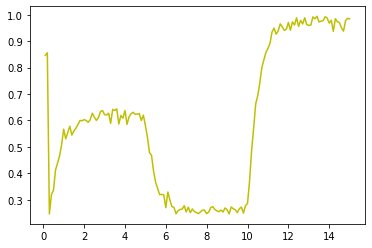

In [29]:
#save to dataframe
#data6= {'Noise_values':dat1,'Output of Perceptron':values,'Error':e,'T':t_save2}
#df6= pd.DataFrame(data6)
y_axis = values #network output
#y = x_scaled
x_axis = x = t_save2
#plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

## Implementation during training

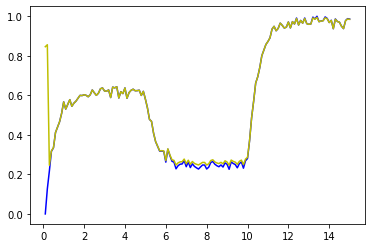

In [30]:
#y_axis = values #network output
y = x_scaled
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#network
plt.show()

## Weights implementation on unseen but similar data

In [31]:
#dat1 = triple_converter(x_save2)
#net_array,sum_error_array = implement_weights3(dat1,w) #use trained weights(w) on unseen data
#weights_data= {'Weights_data':w}
weights_df= pd.DataFrame(weights)
weights_df.to_csv("Sigmoid_Network_weights.csv")

## Network ouput on unseen data(blue)

In [32]:
#y_axis = net_array #network output
#y = x_save2
#x_axis = x = t_save2
#plt.plot(x,y,"y") #actual
#plt.plot(x_axis,y_axis,"b")#noise
#plt.show()

### Error plot per iteration

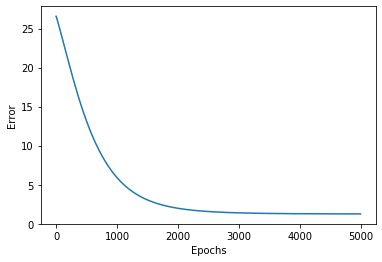

In [33]:
error_dataframe = {'Error':e,'Epochs':itr}
error_df = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df) #blue

## Accuracy plot

In [34]:
#len(test)

In [35]:
#error_dataframe = {'Accuracy':accuracy_array,'Epochs':itrArray}
#error_df = pd.DataFrame(error_dataframe)
#error_plt = sns.lineplot(x="Epochs", y="Accuracy", data=error_df) #blue

## Dataframe containing noise values, trained values and error

In [36]:
#df6

## Train network using step function

In [37]:
dat1 = preprocessing.normalize(dat1)
values1,error_step,weights_step,itr, = train_weights_step(dat1, 0.01,5000)
weights_data= {'Weights_data':weights_step}
weights_df= pd.DataFrame(weights_data)
weights_df.to_csv("Step_Network_weights.csv")

>epoch=0, lrate=0.010, error=-0.422, , sum_error=26.991
>epoch=1, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=2, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=3, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=4, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=5, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=6, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=7, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=8, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=9, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=10, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=11, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=12, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=13, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=14, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=15, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=16, lrate=0.010, error=0.422, , sum_error=26.991
>epoch=17, lrate=0.010, error=0.422, , sum_error=26.991
>

>epoch=264, lrate=0.010, error=-0.578, , sum_error=37.004
>epoch=265, lrate=0.010, error=0.422, , sum_error=37.277
>epoch=266, lrate=0.010, error=-0.578, , sum_error=36.729
>epoch=267, lrate=0.010, error=0.422, , sum_error=37.626
>epoch=268, lrate=0.010, error=-0.578, , sum_error=36.048
>epoch=269, lrate=0.010, error=0.422, , sum_error=37.649
>epoch=270, lrate=0.010, error=0.422, , sum_error=35.222
>epoch=271, lrate=0.010, error=-0.578, , sum_error=37.731
>epoch=272, lrate=0.010, error=0.422, , sum_error=37.804
>epoch=273, lrate=0.010, error=-0.578, , sum_error=36.477
>epoch=274, lrate=0.010, error=0.422, , sum_error=37.513
>epoch=275, lrate=0.010, error=-0.578, , sum_error=36.984
>epoch=276, lrate=0.010, error=0.422, , sum_error=37.514
>epoch=277, lrate=0.010, error=0.422, , sum_error=35.563
>epoch=278, lrate=0.010, error=-0.578, , sum_error=37.505
>epoch=279, lrate=0.010, error=0.422, , sum_error=37.918
>epoch=280, lrate=0.010, error=-0.578, , sum_error=35.409
>epoch=281, lrate=0.010

>epoch=513, lrate=0.010, error=-0.578, , sum_error=38.481
>epoch=514, lrate=0.010, error=0.422, , sum_error=35.366
>epoch=515, lrate=0.010, error=-0.578, , sum_error=38.438
>epoch=516, lrate=0.010, error=0.422, , sum_error=35.983
>epoch=517, lrate=0.010, error=-0.578, , sum_error=35.793
>epoch=518, lrate=0.010, error=0.422, , sum_error=39.110
>epoch=519, lrate=0.010, error=0.422, , sum_error=36.029
>epoch=520, lrate=0.010, error=-0.578, , sum_error=37.907
>epoch=521, lrate=0.010, error=0.422, , sum_error=35.625
>epoch=522, lrate=0.010, error=-0.578, , sum_error=37.381
>epoch=523, lrate=0.010, error=0.422, , sum_error=37.028
>epoch=524, lrate=0.010, error=-0.578, , sum_error=35.968
>epoch=525, lrate=0.010, error=0.422, , sum_error=38.920
>epoch=526, lrate=0.010, error=0.422, , sum_error=35.353
>epoch=527, lrate=0.010, error=-0.578, , sum_error=37.686
>epoch=528, lrate=0.010, error=0.422, , sum_error=37.140
>epoch=529, lrate=0.010, error=-0.578, , sum_error=36.669
>epoch=530, lrate=0.010

>epoch=749, lrate=0.010, error=0.422, , sum_error=38.018
>epoch=750, lrate=0.010, error=-0.578, , sum_error=36.323
>epoch=751, lrate=0.010, error=0.422, , sum_error=38.307
>epoch=752, lrate=0.010, error=-0.578, , sum_error=34.786
>epoch=753, lrate=0.010, error=0.422, , sum_error=37.239
>epoch=754, lrate=0.010, error=-0.578, , sum_error=37.701
>epoch=755, lrate=0.010, error=0.422, , sum_error=35.765
>epoch=756, lrate=0.010, error=0.422, , sum_error=39.010
>epoch=757, lrate=0.010, error=-0.578, , sum_error=35.200
>epoch=758, lrate=0.010, error=0.422, , sum_error=38.879
>epoch=759, lrate=0.010, error=-0.578, , sum_error=36.456
>epoch=760, lrate=0.010, error=0.422, , sum_error=34.937
>epoch=761, lrate=0.010, error=-0.578, , sum_error=38.975
>epoch=762, lrate=0.010, error=0.422, , sum_error=35.620
>epoch=763, lrate=0.010, error=0.422, , sum_error=38.340
>epoch=764, lrate=0.010, error=-0.578, , sum_error=36.609
>epoch=765, lrate=0.010, error=0.422, , sum_error=36.536
>epoch=766, lrate=0.010,

>epoch=1008, lrate=0.010, error=-0.578, , sum_error=36.812
>epoch=1009, lrate=0.010, error=0.422, , sum_error=36.625
>epoch=1010, lrate=0.010, error=-0.578, , sum_error=36.172
>epoch=1011, lrate=0.010, error=0.422, , sum_error=37.484
>epoch=1012, lrate=0.010, error=0.422, , sum_error=37.023
>epoch=1013, lrate=0.010, error=-0.578, , sum_error=36.538
>epoch=1014, lrate=0.010, error=0.422, , sum_error=38.199
>epoch=1015, lrate=0.010, error=-0.578, , sum_error=35.923
>epoch=1016, lrate=0.010, error=0.422, , sum_error=36.055
>epoch=1017, lrate=0.010, error=-0.578, , sum_error=38.522
>epoch=1018, lrate=0.010, error=0.422, , sum_error=36.742
>epoch=1019, lrate=0.010, error=0.422, , sum_error=37.794
>epoch=1020, lrate=0.010, error=-0.578, , sum_error=35.526
>epoch=1021, lrate=0.010, error=0.422, , sum_error=37.951
>epoch=1022, lrate=0.010, error=-0.578, , sum_error=36.466
>epoch=1023, lrate=0.010, error=0.422, , sum_error=35.485
>epoch=1024, lrate=0.010, error=0.422, , sum_error=39.433
>epoch=

>epoch=1277, lrate=0.010, error=0.422, , sum_error=36.277
>epoch=1278, lrate=0.010, error=-0.578, , sum_error=37.112
>epoch=1279, lrate=0.010, error=0.422, , sum_error=35.752
>epoch=1280, lrate=0.010, error=0.422, , sum_error=37.038
>epoch=1281, lrate=0.010, error=-0.578, , sum_error=39.077
>epoch=1282, lrate=0.010, error=0.422, , sum_error=35.246
>epoch=1283, lrate=0.010, error=-0.578, , sum_error=39.065
>epoch=1284, lrate=0.010, error=0.422, , sum_error=35.606
>epoch=1285, lrate=0.010, error=-0.578, , sum_error=36.134
>epoch=1286, lrate=0.010, error=0.422, , sum_error=37.961
>epoch=1287, lrate=0.010, error=0.422, , sum_error=36.079
>epoch=1288, lrate=0.010, error=-0.578, , sum_error=37.927
>epoch=1289, lrate=0.010, error=0.422, , sum_error=35.839
>epoch=1290, lrate=0.010, error=-0.578, , sum_error=37.844
>epoch=1291, lrate=0.010, error=0.422, , sum_error=37.944
>epoch=1292, lrate=0.010, error=-0.578, , sum_error=35.849
>epoch=1293, lrate=0.010, error=0.422, , sum_error=36.704
>epoch=

>epoch=1428, lrate=0.010, error=0.422, , sum_error=38.417
>epoch=1429, lrate=0.010, error=0.422, , sum_error=36.188
>epoch=1430, lrate=0.010, error=-0.578, , sum_error=37.439
>epoch=1431, lrate=0.010, error=0.422, , sum_error=37.374
>epoch=1432, lrate=0.010, error=-0.578, , sum_error=36.344
>epoch=1433, lrate=0.010, error=0.422, , sum_error=37.045
>epoch=1434, lrate=0.010, error=0.422, , sum_error=37.433
>epoch=1435, lrate=0.010, error=-0.578, , sum_error=36.679
>epoch=1436, lrate=0.010, error=0.422, , sum_error=36.674
>epoch=1437, lrate=0.010, error=-0.578, , sum_error=36.656
>epoch=1438, lrate=0.010, error=0.422, , sum_error=37.628
>epoch=1439, lrate=0.010, error=-0.578, , sum_error=37.391
>epoch=1440, lrate=0.010, error=0.422, , sum_error=36.833
>epoch=1441, lrate=0.010, error=0.422, , sum_error=36.523
>epoch=1442, lrate=0.010, error=-0.578, , sum_error=36.842
>epoch=1443, lrate=0.010, error=0.422, , sum_error=37.047
>epoch=1444, lrate=0.010, error=-0.578, , sum_error=35.999
>epoch=

>epoch=1684, lrate=0.010, error=-0.578, , sum_error=37.906
>epoch=1685, lrate=0.010, error=0.422, , sum_error=36.252
>epoch=1686, lrate=0.010, error=-0.578, , sum_error=38.451
>epoch=1687, lrate=0.010, error=0.422, , sum_error=35.156
>epoch=1688, lrate=0.010, error=-0.578, , sum_error=38.455
>epoch=1689, lrate=0.010, error=0.422, , sum_error=36.630
>epoch=1690, lrate=0.010, error=0.422, , sum_error=36.008
>epoch=1691, lrate=0.010, error=-0.578, , sum_error=38.755
>epoch=1692, lrate=0.010, error=0.422, , sum_error=34.939
>epoch=1693, lrate=0.010, error=-0.578, , sum_error=38.664
>epoch=1694, lrate=0.010, error=0.422, , sum_error=35.276
>epoch=1695, lrate=0.010, error=-0.578, , sum_error=37.380
>epoch=1696, lrate=0.010, error=0.422, , sum_error=37.770
>epoch=1697, lrate=0.010, error=0.422, , sum_error=35.855
>epoch=1698, lrate=0.010, error=-0.578, , sum_error=39.671
>epoch=1699, lrate=0.010, error=0.422, , sum_error=33.939
>epoch=1700, lrate=0.010, error=-0.578, , sum_error=38.549
>epoch

>epoch=1847, lrate=0.010, error=-0.578, , sum_error=37.088
>epoch=1848, lrate=0.010, error=0.422, , sum_error=36.738
>epoch=1849, lrate=0.010, error=-0.578, , sum_error=36.925
>epoch=1850, lrate=0.010, error=0.422, , sum_error=37.718
>epoch=1851, lrate=0.010, error=0.422, , sum_error=35.595
>epoch=1852, lrate=0.010, error=-0.578, , sum_error=38.313
>epoch=1853, lrate=0.010, error=0.422, , sum_error=35.838
>epoch=1854, lrate=0.010, error=-0.578, , sum_error=37.547
>epoch=1855, lrate=0.010, error=0.422, , sum_error=38.123
>epoch=1856, lrate=0.010, error=0.422, , sum_error=34.615
>epoch=1857, lrate=0.010, error=-0.578, , sum_error=38.532
>epoch=1858, lrate=0.010, error=0.422, , sum_error=36.151
>epoch=1859, lrate=0.010, error=-0.578, , sum_error=37.335
>epoch=1860, lrate=0.010, error=0.422, , sum_error=37.028
>epoch=1861, lrate=0.010, error=-0.578, , sum_error=37.328
>epoch=1862, lrate=0.010, error=0.422, , sum_error=38.051
>epoch=1863, lrate=0.010, error=0.422, , sum_error=34.212
>epoch=

>epoch=2118, lrate=0.010, error=0.422, , sum_error=37.367
>epoch=2119, lrate=0.010, error=0.422, , sum_error=37.338
>epoch=2120, lrate=0.010, error=-0.578, , sum_error=35.936
>epoch=2121, lrate=0.010, error=0.422, , sum_error=37.091
>epoch=2122, lrate=0.010, error=-0.578, , sum_error=37.569
>epoch=2123, lrate=0.010, error=0.422, , sum_error=36.336
>epoch=2124, lrate=0.010, error=-0.578, , sum_error=38.008
>epoch=2125, lrate=0.010, error=0.422, , sum_error=36.024
>epoch=2126, lrate=0.010, error=0.422, , sum_error=37.280
>epoch=2127, lrate=0.010, error=-0.578, , sum_error=36.678
>epoch=2128, lrate=0.010, error=0.422, , sum_error=37.942
>epoch=2129, lrate=0.010, error=-0.578, , sum_error=35.882
>epoch=2130, lrate=0.010, error=0.422, , sum_error=36.995
>epoch=2131, lrate=0.010, error=0.422, , sum_error=38.803
>epoch=2132, lrate=0.010, error=-0.578, , sum_error=34.491
>epoch=2133, lrate=0.010, error=0.422, , sum_error=37.750
>epoch=2134, lrate=0.010, error=-0.578, , sum_error=37.058
>epoch=

>epoch=2371, lrate=0.010, error=-0.578, , sum_error=38.162
>epoch=2372, lrate=0.010, error=0.422, , sum_error=35.967
>epoch=2373, lrate=0.010, error=-0.578, , sum_error=37.039
>epoch=2374, lrate=0.010, error=0.422, , sum_error=38.097
>epoch=2375, lrate=0.010, error=0.422, , sum_error=36.238
>epoch=2376, lrate=0.010, error=-0.578, , sum_error=37.550
>epoch=2377, lrate=0.010, error=0.422, , sum_error=36.965
>epoch=2378, lrate=0.010, error=-0.578, , sum_error=36.481
>epoch=2379, lrate=0.010, error=0.422, , sum_error=36.553
>epoch=2380, lrate=0.010, error=-0.578, , sum_error=37.481
>epoch=2381, lrate=0.010, error=0.422, , sum_error=37.364
>epoch=2382, lrate=0.010, error=0.422, , sum_error=35.545
>epoch=2383, lrate=0.010, error=-0.578, , sum_error=38.397
>epoch=2384, lrate=0.010, error=0.422, , sum_error=36.476
>epoch=2385, lrate=0.010, error=-0.578, , sum_error=36.887
>epoch=2386, lrate=0.010, error=0.422, , sum_error=36.907
>epoch=2387, lrate=0.010, error=0.422, , sum_error=36.717
>epoch=

>epoch=2635, lrate=0.010, error=0.422, , sum_error=35.841
>epoch=2636, lrate=0.010, error=-0.578, , sum_error=39.051
>epoch=2637, lrate=0.010, error=0.422, , sum_error=34.386
>epoch=2638, lrate=0.010, error=0.422, , sum_error=38.037
>epoch=2639, lrate=0.010, error=-0.578, , sum_error=37.115
>epoch=2640, lrate=0.010, error=0.422, , sum_error=36.228
>epoch=2641, lrate=0.010, error=-0.578, , sum_error=39.222
>epoch=2642, lrate=0.010, error=0.422, , sum_error=35.092
>epoch=2643, lrate=0.010, error=0.422, , sum_error=37.660
>epoch=2644, lrate=0.010, error=-0.578, , sum_error=36.193
>epoch=2645, lrate=0.010, error=0.422, , sum_error=36.410
>epoch=2646, lrate=0.010, error=-0.578, , sum_error=38.030
>epoch=2647, lrate=0.010, error=0.422, , sum_error=36.959
>epoch=2648, lrate=0.010, error=-0.578, , sum_error=38.159
>epoch=2649, lrate=0.010, error=0.422, , sum_error=35.721
>epoch=2650, lrate=0.010, error=0.422, , sum_error=36.139
>epoch=2651, lrate=0.010, error=-0.578, , sum_error=37.155
>epoch=

>epoch=2889, lrate=0.010, error=0.422, , sum_error=34.956
>epoch=2890, lrate=0.010, error=-0.578, , sum_error=39.056
>epoch=2891, lrate=0.010, error=0.422, , sum_error=37.097
>epoch=2892, lrate=0.010, error=-0.578, , sum_error=36.073
>epoch=2893, lrate=0.010, error=0.422, , sum_error=37.994
>epoch=2894, lrate=0.010, error=0.422, , sum_error=35.584
>epoch=2895, lrate=0.010, error=-0.578, , sum_error=36.887
>epoch=2896, lrate=0.010, error=0.422, , sum_error=36.701
>epoch=2897, lrate=0.010, error=-0.578, , sum_error=38.260
>epoch=2898, lrate=0.010, error=0.422, , sum_error=37.576
>epoch=2899, lrate=0.010, error=0.422, , sum_error=34.691
>epoch=2900, lrate=0.010, error=-0.578, , sum_error=38.979
>epoch=2901, lrate=0.010, error=0.422, , sum_error=36.268
>epoch=2902, lrate=0.010, error=-0.578, , sum_error=37.070
>epoch=2903, lrate=0.010, error=0.422, , sum_error=37.126
>epoch=2904, lrate=0.010, error=-0.578, , sum_error=36.735
>epoch=2905, lrate=0.010, error=0.422, , sum_error=37.332
>epoch=

>epoch=3135, lrate=0.010, error=0.422, , sum_error=36.371
>epoch=3136, lrate=0.010, error=0.422, , sum_error=36.482
>epoch=3137, lrate=0.010, error=-0.578, , sum_error=37.543
>epoch=3138, lrate=0.010, error=0.422, , sum_error=36.017
>epoch=3139, lrate=0.010, error=-0.578, , sum_error=38.494
>epoch=3140, lrate=0.010, error=0.422, , sum_error=35.928
>epoch=3141, lrate=0.010, error=-0.578, , sum_error=38.072
>epoch=3142, lrate=0.010, error=0.422, , sum_error=36.613
>epoch=3143, lrate=0.010, error=0.422, , sum_error=35.943
>epoch=3144, lrate=0.010, error=-0.578, , sum_error=38.697
>epoch=3145, lrate=0.010, error=0.422, , sum_error=35.255
>epoch=3146, lrate=0.010, error=-0.578, , sum_error=37.803
>epoch=3147, lrate=0.010, error=0.422, , sum_error=37.249
>epoch=3148, lrate=0.010, error=-0.578, , sum_error=36.200
>epoch=3149, lrate=0.010, error=0.422, , sum_error=37.582
>epoch=3150, lrate=0.010, error=0.422, , sum_error=37.177
>epoch=3151, lrate=0.010, error=-0.578, , sum_error=37.146
>epoch=

>epoch=3392, lrate=0.010, error=0.422, , sum_error=36.165
>epoch=3393, lrate=0.010, error=-0.578, , sum_error=38.803
>epoch=3394, lrate=0.010, error=0.422, , sum_error=36.285
>epoch=3395, lrate=0.010, error=-0.578, , sum_error=36.465
>epoch=3396, lrate=0.010, error=0.422, , sum_error=37.831
>epoch=3397, lrate=0.010, error=-0.578, , sum_error=35.177
>epoch=3398, lrate=0.010, error=0.422, , sum_error=38.372
>epoch=3399, lrate=0.010, error=0.422, , sum_error=35.913
>epoch=3400, lrate=0.010, error=-0.578, , sum_error=38.005
>epoch=3401, lrate=0.010, error=0.422, , sum_error=37.460
>epoch=3402, lrate=0.010, error=-0.578, , sum_error=34.294
>epoch=3403, lrate=0.010, error=0.422, , sum_error=39.462
>epoch=3404, lrate=0.010, error=-0.578, , sum_error=35.625
>epoch=3405, lrate=0.010, error=0.422, , sum_error=38.462
>epoch=3406, lrate=0.010, error=0.422, , sum_error=36.435
>epoch=3407, lrate=0.010, error=-0.578, , sum_error=35.602
>epoch=3408, lrate=0.010, error=0.422, , sum_error=39.460
>epoch=

>epoch=3625, lrate=0.010, error=-0.578, , sum_error=37.325
>epoch=3626, lrate=0.010, error=0.422, , sum_error=36.242
>epoch=3627, lrate=0.010, error=-0.578, , sum_error=37.753
>epoch=3628, lrate=0.010, error=0.422, , sum_error=36.659
>epoch=3629, lrate=0.010, error=0.422, , sum_error=37.357
>epoch=3630, lrate=0.010, error=-0.578, , sum_error=36.978
>epoch=3631, lrate=0.010, error=0.422, , sum_error=35.349
>epoch=3632, lrate=0.010, error=-0.578, , sum_error=38.694
>epoch=3633, lrate=0.010, error=0.422, , sum_error=36.517
>epoch=3634, lrate=0.010, error=-0.578, , sum_error=36.994
>epoch=3635, lrate=0.010, error=0.422, , sum_error=36.613
>epoch=3636, lrate=0.010, error=0.422, , sum_error=37.731
>epoch=3637, lrate=0.010, error=-0.578, , sum_error=37.290
>epoch=3638, lrate=0.010, error=0.422, , sum_error=35.079
>epoch=3639, lrate=0.010, error=-0.578, , sum_error=39.224
>epoch=3640, lrate=0.010, error=0.422, , sum_error=35.092
>epoch=3641, lrate=0.010, error=-0.578, , sum_error=37.699
>epoch

>epoch=3863, lrate=0.010, error=0.422, , sum_error=35.999
>epoch=3864, lrate=0.010, error=-0.578, , sum_error=37.700
>epoch=3865, lrate=0.010, error=0.422, , sum_error=37.297
>epoch=3866, lrate=0.010, error=0.422, , sum_error=36.050
>epoch=3867, lrate=0.010, error=-0.578, , sum_error=36.602
>epoch=3868, lrate=0.010, error=0.422, , sum_error=37.379
>epoch=3869, lrate=0.010, error=-0.578, , sum_error=37.485
>epoch=3870, lrate=0.010, error=0.422, , sum_error=35.655
>epoch=3871, lrate=0.010, error=-0.578, , sum_error=38.839
>epoch=3872, lrate=0.010, error=0.422, , sum_error=35.193
>epoch=3873, lrate=0.010, error=0.422, , sum_error=37.949
>epoch=3874, lrate=0.010, error=-0.578, , sum_error=37.158
>epoch=3875, lrate=0.010, error=0.422, , sum_error=36.266
>epoch=3876, lrate=0.010, error=-0.578, , sum_error=38.154
>epoch=3877, lrate=0.010, error=0.422, , sum_error=35.805
>epoch=3878, lrate=0.010, error=0.422, , sum_error=37.388
>epoch=3879, lrate=0.010, error=-0.578, , sum_error=36.438
>epoch=

>epoch=4129, lrate=0.010, error=0.422, , sum_error=35.842
>epoch=4130, lrate=0.010, error=-0.578, , sum_error=36.974
>epoch=4131, lrate=0.010, error=0.422, , sum_error=37.537
>epoch=4132, lrate=0.010, error=-0.578, , sum_error=36.509
>epoch=4133, lrate=0.010, error=0.422, , sum_error=38.931
>epoch=4134, lrate=0.010, error=0.422, , sum_error=34.802
>epoch=4135, lrate=0.010, error=-0.578, , sum_error=37.514
>epoch=4136, lrate=0.010, error=0.422, , sum_error=37.213
>epoch=4137, lrate=0.010, error=-0.578, , sum_error=36.179
>epoch=4138, lrate=0.010, error=0.422, , sum_error=37.693
>epoch=4139, lrate=0.010, error=-0.578, , sum_error=36.295
>epoch=4140, lrate=0.010, error=0.422, , sum_error=37.484
>epoch=4141, lrate=0.010, error=0.422, , sum_error=37.158
>epoch=4142, lrate=0.010, error=-0.578, , sum_error=36.231
>epoch=4143, lrate=0.010, error=0.422, , sum_error=37.744
>epoch=4144, lrate=0.010, error=-0.578, , sum_error=36.863
>epoch=4145, lrate=0.010, error=0.422, , sum_error=37.030
>epoch=

>epoch=4375, lrate=0.010, error=0.422, , sum_error=38.194
>epoch=4376, lrate=0.010, error=-0.578, , sum_error=35.195
>epoch=4377, lrate=0.010, error=0.422, , sum_error=38.385
>epoch=4378, lrate=0.010, error=0.422, , sum_error=36.454
>epoch=4379, lrate=0.010, error=-0.578, , sum_error=36.731
>epoch=4380, lrate=0.010, error=0.422, , sum_error=37.441
>epoch=4381, lrate=0.010, error=-0.578, , sum_error=35.396
>epoch=4382, lrate=0.010, error=0.422, , sum_error=40.040
>epoch=4383, lrate=0.010, error=-0.578, , sum_error=34.786
>epoch=4384, lrate=0.010, error=0.422, , sum_error=37.171
>epoch=4385, lrate=0.010, error=0.422, , sum_error=37.573
>epoch=4386, lrate=0.010, error=-0.578, , sum_error=35.316
>epoch=4387, lrate=0.010, error=0.422, , sum_error=39.243
>epoch=4388, lrate=0.010, error=-0.578, , sum_error=35.738
>epoch=4389, lrate=0.010, error=0.422, , sum_error=38.349
>epoch=4390, lrate=0.010, error=0.422, , sum_error=35.118
>epoch=4391, lrate=0.010, error=-0.578, , sum_error=36.866
>epoch=

>epoch=4608, lrate=0.010, error=0.422, , sum_error=37.308
>epoch=4609, lrate=0.010, error=-0.578, , sum_error=36.334
>epoch=4610, lrate=0.010, error=0.422, , sum_error=38.066
>epoch=4611, lrate=0.010, error=-0.578, , sum_error=36.262
>epoch=4612, lrate=0.010, error=0.422, , sum_error=36.655
>epoch=4613, lrate=0.010, error=-0.578, , sum_error=38.277
>epoch=4614, lrate=0.010, error=0.422, , sum_error=35.551
>epoch=4615, lrate=0.010, error=0.422, , sum_error=37.770
>epoch=4616, lrate=0.010, error=-0.578, , sum_error=36.228
>epoch=4617, lrate=0.010, error=0.422, , sum_error=37.445
>epoch=4618, lrate=0.010, error=-0.578, , sum_error=36.910
>epoch=4619, lrate=0.010, error=0.422, , sum_error=36.893
>epoch=4620, lrate=0.010, error=-0.578, , sum_error=37.978
>epoch=4621, lrate=0.010, error=0.422, , sum_error=35.604
>epoch=4622, lrate=0.010, error=0.422, , sum_error=38.463
>epoch=4623, lrate=0.010, error=-0.578, , sum_error=35.273
>epoch=4624, lrate=0.010, error=0.422, , sum_error=37.254
>epoch=

>epoch=4865, lrate=0.010, error=-0.578, , sum_error=36.387
>epoch=4866, lrate=0.010, error=0.422, , sum_error=37.375
>epoch=4867, lrate=0.010, error=-0.578, , sum_error=37.852
>epoch=4868, lrate=0.010, error=0.422, , sum_error=35.900
>epoch=4869, lrate=0.010, error=-0.578, , sum_error=38.224
>epoch=4870, lrate=0.010, error=0.422, , sum_error=35.607
>epoch=4871, lrate=0.010, error=0.422, , sum_error=37.118
>epoch=4872, lrate=0.010, error=-0.578, , sum_error=37.676
>epoch=4873, lrate=0.010, error=0.422, , sum_error=35.860
>epoch=4874, lrate=0.010, error=-0.578, , sum_error=38.039
>epoch=4875, lrate=0.010, error=0.422, , sum_error=37.384
>epoch=4876, lrate=0.010, error=-0.578, , sum_error=35.637
>epoch=4877, lrate=0.010, error=0.422, , sum_error=37.294
>epoch=4878, lrate=0.010, error=0.422, , sum_error=37.725
>epoch=4879, lrate=0.010, error=-0.578, , sum_error=36.784
>epoch=4880, lrate=0.010, error=0.422, , sum_error=36.156
>epoch=4881, lrate=0.010, error=-0.578, , sum_error=37.580
>epoch

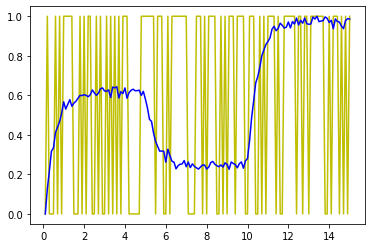

In [38]:

y_axis = x_scaled #network output
#y_axis = norm
y = values1
x_axis = x = t_save2
plt.plot(x,y,"y") #robot
plt.plot(x_axis,y_axis,"b")#tracker
plt.show()


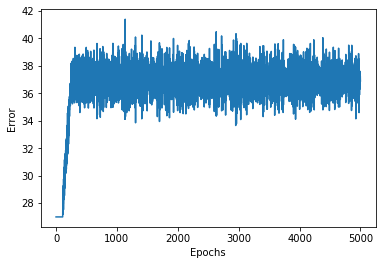

In [39]:
x = itr
y = error_step
error_dataframe = {'Error':y,'Epochs':x}
error_df = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df) #blue

# Perceptron model with different learning rates

#### Example 1(Learning rate =50)

In [40]:
random_vals1 = []
#data,std_dev.mean
random_vals1,_,_ = box_muller(x_save2,0.001,_mean) #call box muller
x_scaled = preprocessing.minmax_scale(random_vals1)
random_vals_t1 = triple_converter(x_scaled)
values1,e1,w1,itrArray1 = train_weights3(random_vals_t1, 50,2000)

>epoch=0, lrate=50.000, error=-0.000, , sum_error=38.057
>epoch=1, lrate=50.000, error=0.000, , sum_error=38.057
>epoch=2, lrate=50.000, error=0.000, , sum_error=37.152
>epoch=3, lrate=50.000, error=0.000, , sum_error=37.117
>epoch=4, lrate=50.000, error=0.000, , sum_error=36.888
>epoch=5, lrate=50.000, error=0.000, , sum_error=36.655
>epoch=6, lrate=50.000, error=0.000, , sum_error=36.722
>epoch=7, lrate=50.000, error=0.000, , sum_error=36.751
>epoch=8, lrate=50.000, error=0.000, , sum_error=36.495
>epoch=9, lrate=50.000, error=0.000, , sum_error=36.725
>epoch=10, lrate=50.000, error=0.000, , sum_error=36.905
>epoch=11, lrate=50.000, error=0.000, , sum_error=36.722
>epoch=12, lrate=50.000, error=0.000, , sum_error=36.869
>epoch=13, lrate=50.000, error=0.000, , sum_error=36.927
>epoch=14, lrate=50.000, error=0.000, , sum_error=36.797
>epoch=15, lrate=50.000, error=0.000, , sum_error=36.810
>epoch=16, lrate=50.000, error=0.000, , sum_error=36.751
>epoch=17, lrate=50.000, error=0.000, , 

>epoch=199, lrate=50.000, error=0.000, , sum_error=14.862
>epoch=200, lrate=50.000, error=0.000, , sum_error=17.904
>epoch=201, lrate=50.000, error=0.000, , sum_error=18.470
>epoch=202, lrate=50.000, error=0.000, , sum_error=17.070
>epoch=203, lrate=50.000, error=0.000, , sum_error=19.149
>epoch=204, lrate=50.000, error=0.000, , sum_error=17.948
>epoch=205, lrate=50.000, error=0.000, , sum_error=15.997
>epoch=206, lrate=50.000, error=0.000, , sum_error=18.011
>epoch=207, lrate=50.000, error=0.000, , sum_error=17.499
>epoch=208, lrate=50.000, error=0.000, , sum_error=16.149
>epoch=209, lrate=50.000, error=0.000, , sum_error=17.671
>epoch=210, lrate=50.000, error=0.000, , sum_error=17.878
>epoch=211, lrate=50.000, error=0.000, , sum_error=18.568
>epoch=212, lrate=50.000, error=0.000, , sum_error=16.146
>epoch=213, lrate=50.000, error=0.000, , sum_error=16.083
>epoch=214, lrate=50.000, error=0.000, , sum_error=18.284
>epoch=215, lrate=50.000, error=0.000, , sum_error=19.535
>epoch=216, lr

>epoch=403, lrate=50.000, error=0.000, , sum_error=15.619
>epoch=404, lrate=50.000, error=0.000, , sum_error=18.164
>epoch=405, lrate=50.000, error=0.000, , sum_error=17.488
>epoch=406, lrate=50.000, error=0.000, , sum_error=16.349
>epoch=407, lrate=50.000, error=0.000, , sum_error=18.890
>epoch=408, lrate=50.000, error=0.000, , sum_error=17.470
>epoch=409, lrate=50.000, error=0.000, , sum_error=17.015
>epoch=410, lrate=50.000, error=0.000, , sum_error=18.087
>epoch=411, lrate=50.000, error=0.000, , sum_error=17.638
>epoch=412, lrate=50.000, error=0.000, , sum_error=15.981
>epoch=413, lrate=50.000, error=0.000, , sum_error=18.883
>epoch=414, lrate=50.000, error=0.000, , sum_error=17.692
>epoch=415, lrate=50.000, error=0.000, , sum_error=17.630
>epoch=416, lrate=50.000, error=0.000, , sum_error=18.264
>epoch=417, lrate=50.000, error=0.000, , sum_error=17.769
>epoch=418, lrate=50.000, error=0.000, , sum_error=17.188
>epoch=419, lrate=50.000, error=0.000, , sum_error=17.055
>epoch=420, lr

>epoch=547, lrate=50.000, error=0.000, , sum_error=17.584
>epoch=548, lrate=50.000, error=0.000, , sum_error=18.672
>epoch=549, lrate=50.000, error=0.000, , sum_error=18.611
>epoch=550, lrate=50.000, error=0.000, , sum_error=17.201
>epoch=551, lrate=50.000, error=0.000, , sum_error=17.846
>epoch=552, lrate=50.000, error=0.000, , sum_error=19.237
>epoch=553, lrate=50.000, error=0.000, , sum_error=15.277
>epoch=554, lrate=50.000, error=0.000, , sum_error=17.938
>epoch=555, lrate=50.000, error=0.000, , sum_error=19.679
>epoch=556, lrate=50.000, error=0.000, , sum_error=15.815
>epoch=557, lrate=50.000, error=0.000, , sum_error=16.759
>epoch=558, lrate=50.000, error=0.000, , sum_error=18.749
>epoch=559, lrate=50.000, error=0.000, , sum_error=16.969
>epoch=560, lrate=50.000, error=0.000, , sum_error=18.390
>epoch=561, lrate=50.000, error=0.000, , sum_error=18.817
>epoch=562, lrate=50.000, error=0.000, , sum_error=15.676
>epoch=563, lrate=50.000, error=0.000, , sum_error=18.055
>epoch=564, lr

>epoch=730, lrate=50.000, error=0.000, , sum_error=16.201
>epoch=731, lrate=50.000, error=0.000, , sum_error=18.205
>epoch=732, lrate=50.000, error=0.000, , sum_error=18.232
>epoch=733, lrate=50.000, error=0.000, , sum_error=15.368
>epoch=734, lrate=50.000, error=0.000, , sum_error=18.022
>epoch=735, lrate=50.000, error=0.000, , sum_error=18.958
>epoch=736, lrate=50.000, error=0.000, , sum_error=17.221
>epoch=737, lrate=50.000, error=0.000, , sum_error=18.311
>epoch=738, lrate=50.000, error=0.000, , sum_error=18.223
>epoch=739, lrate=50.000, error=0.000, , sum_error=17.056
>epoch=740, lrate=50.000, error=0.000, , sum_error=16.284
>epoch=741, lrate=50.000, error=0.000, , sum_error=17.860
>epoch=742, lrate=50.000, error=0.000, , sum_error=17.379
>epoch=743, lrate=50.000, error=0.000, , sum_error=19.375
>epoch=744, lrate=50.000, error=0.000, , sum_error=18.012
>epoch=745, lrate=50.000, error=0.000, , sum_error=16.532
>epoch=746, lrate=50.000, error=0.000, , sum_error=16.450
>epoch=747, lr

>epoch=945, lrate=50.000, error=0.000, , sum_error=17.591
>epoch=946, lrate=50.000, error=0.000, , sum_error=16.151
>epoch=947, lrate=50.000, error=0.000, , sum_error=17.138
>epoch=948, lrate=50.000, error=0.000, , sum_error=18.860
>epoch=949, lrate=50.000, error=0.000, , sum_error=17.801
>epoch=950, lrate=50.000, error=0.000, , sum_error=16.234
>epoch=951, lrate=50.000, error=0.000, , sum_error=19.809
>epoch=952, lrate=50.000, error=0.000, , sum_error=17.529
>epoch=953, lrate=50.000, error=0.000, , sum_error=18.701
>epoch=954, lrate=50.000, error=0.000, , sum_error=17.353
>epoch=955, lrate=50.000, error=0.000, , sum_error=16.392
>epoch=956, lrate=50.000, error=0.000, , sum_error=17.875
>epoch=957, lrate=50.000, error=0.000, , sum_error=17.089
>epoch=958, lrate=50.000, error=0.000, , sum_error=15.663
>epoch=959, lrate=50.000, error=0.000, , sum_error=20.590
>epoch=960, lrate=50.000, error=0.000, , sum_error=17.681
>epoch=961, lrate=50.000, error=0.000, , sum_error=16.347
>epoch=962, lr

>epoch=1168, lrate=50.000, error=0.000, , sum_error=17.209
>epoch=1169, lrate=50.000, error=0.000, , sum_error=18.392
>epoch=1170, lrate=50.000, error=0.000, , sum_error=16.731
>epoch=1171, lrate=50.000, error=0.000, , sum_error=16.844
>epoch=1172, lrate=50.000, error=0.000, , sum_error=17.384
>epoch=1173, lrate=50.000, error=0.000, , sum_error=16.880
>epoch=1174, lrate=50.000, error=0.000, , sum_error=17.580
>epoch=1175, lrate=50.000, error=0.000, , sum_error=19.719
>epoch=1176, lrate=50.000, error=0.000, , sum_error=19.168
>epoch=1177, lrate=50.000, error=0.000, , sum_error=16.036
>epoch=1178, lrate=50.000, error=0.000, , sum_error=17.632
>epoch=1179, lrate=50.000, error=0.000, , sum_error=18.479
>epoch=1180, lrate=50.000, error=0.000, , sum_error=15.671
>epoch=1181, lrate=50.000, error=0.000, , sum_error=17.664
>epoch=1182, lrate=50.000, error=0.000, , sum_error=18.140
>epoch=1183, lrate=50.000, error=0.000, , sum_error=18.040
>epoch=1184, lrate=50.000, error=0.000, , sum_error=17.6

>epoch=1363, lrate=50.000, error=0.000, , sum_error=17.801
>epoch=1364, lrate=50.000, error=0.000, , sum_error=18.657
>epoch=1365, lrate=50.000, error=0.000, , sum_error=16.196
>epoch=1366, lrate=50.000, error=0.000, , sum_error=18.282
>epoch=1367, lrate=50.000, error=0.000, , sum_error=20.121
>epoch=1368, lrate=50.000, error=0.000, , sum_error=17.427
>epoch=1369, lrate=50.000, error=0.000, , sum_error=16.443
>epoch=1370, lrate=50.000, error=0.000, , sum_error=18.133
>epoch=1371, lrate=50.000, error=0.000, , sum_error=17.070
>epoch=1372, lrate=50.000, error=0.000, , sum_error=17.501
>epoch=1373, lrate=50.000, error=0.000, , sum_error=18.137
>epoch=1374, lrate=50.000, error=0.000, , sum_error=18.650
>epoch=1375, lrate=50.000, error=0.000, , sum_error=17.249
>epoch=1376, lrate=50.000, error=0.000, , sum_error=17.147
>epoch=1377, lrate=50.000, error=0.000, , sum_error=19.879
>epoch=1378, lrate=50.000, error=0.000, , sum_error=16.202
>epoch=1379, lrate=50.000, error=0.000, , sum_error=17.9

>epoch=1592, lrate=50.000, error=0.000, , sum_error=17.850
>epoch=1593, lrate=50.000, error=0.000, , sum_error=16.260
>epoch=1594, lrate=50.000, error=0.000, , sum_error=17.854
>epoch=1595, lrate=50.000, error=0.000, , sum_error=19.163
>epoch=1596, lrate=50.000, error=0.000, , sum_error=16.508
>epoch=1597, lrate=50.000, error=0.000, , sum_error=17.324
>epoch=1598, lrate=50.000, error=0.000, , sum_error=17.963
>epoch=1599, lrate=50.000, error=0.000, , sum_error=18.618
>epoch=1600, lrate=50.000, error=0.000, , sum_error=17.868
>epoch=1601, lrate=50.000, error=0.000, , sum_error=17.988
>epoch=1602, lrate=50.000, error=0.000, , sum_error=18.176
>epoch=1603, lrate=50.000, error=0.000, , sum_error=16.515
>epoch=1604, lrate=50.000, error=0.000, , sum_error=17.435
>epoch=1605, lrate=50.000, error=0.000, , sum_error=18.117
>epoch=1606, lrate=50.000, error=0.000, , sum_error=15.268
>epoch=1607, lrate=50.000, error=0.000, , sum_error=18.447
>epoch=1608, lrate=50.000, error=0.000, , sum_error=19.2

>epoch=1854, lrate=50.000, error=0.000, , sum_error=17.044
>epoch=1855, lrate=50.000, error=0.000, , sum_error=17.648
>epoch=1856, lrate=50.000, error=0.000, , sum_error=17.807
>epoch=1857, lrate=50.000, error=0.000, , sum_error=18.289
>epoch=1858, lrate=50.000, error=0.000, , sum_error=17.220
>epoch=1859, lrate=50.000, error=0.000, , sum_error=17.279
>epoch=1860, lrate=50.000, error=0.000, , sum_error=17.384
>epoch=1861, lrate=50.000, error=0.000, , sum_error=17.636
>epoch=1862, lrate=50.000, error=0.000, , sum_error=17.382
>epoch=1863, lrate=50.000, error=0.000, , sum_error=19.019
>epoch=1864, lrate=50.000, error=0.000, , sum_error=18.033
>epoch=1865, lrate=50.000, error=0.000, , sum_error=16.741
>epoch=1866, lrate=50.000, error=0.000, , sum_error=18.695
>epoch=1867, lrate=50.000, error=0.000, , sum_error=16.417
>epoch=1868, lrate=50.000, error=0.000, , sum_error=18.430
>epoch=1869, lrate=50.000, error=0.000, , sum_error=17.897
>epoch=1870, lrate=50.000, error=0.000, , sum_error=15.5

## Network representation

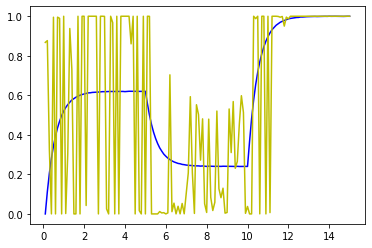

In [41]:
y_axis = values1 #network output
y = x_scaled # x noise
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

## Error representation 

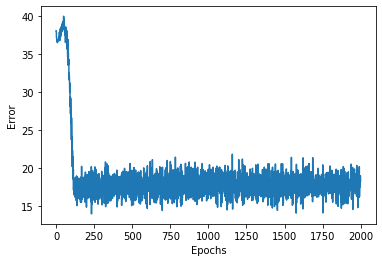

In [42]:
error_dataframe = {'Error':e1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

### Example 2(learning rate =10)

In [43]:
values1,e1,w1,itrArray1 = train_weights3(random_vals_t1, 10,2000)

>epoch=0, lrate=10.000, error=-0.000, , sum_error=37.654
>epoch=1, lrate=10.000, error=0.000, , sum_error=37.654
>epoch=2, lrate=10.000, error=0.000, , sum_error=36.949
>epoch=3, lrate=10.000, error=0.000, , sum_error=36.338
>epoch=4, lrate=10.000, error=0.000, , sum_error=35.959
>epoch=5, lrate=10.000, error=0.000, , sum_error=35.677
>epoch=6, lrate=10.000, error=0.000, , sum_error=35.465
>epoch=7, lrate=10.000, error=0.000, , sum_error=35.319
>epoch=8, lrate=10.000, error=0.000, , sum_error=35.228
>epoch=9, lrate=10.000, error=0.000, , sum_error=35.174
>epoch=10, lrate=10.000, error=0.000, , sum_error=35.138
>epoch=11, lrate=10.000, error=0.000, , sum_error=35.106
>epoch=12, lrate=10.000, error=0.000, , sum_error=35.067
>epoch=13, lrate=10.000, error=0.000, , sum_error=35.027
>epoch=14, lrate=10.000, error=0.000, , sum_error=34.987
>epoch=15, lrate=10.000, error=0.000, , sum_error=34.947
>epoch=16, lrate=10.000, error=0.000, , sum_error=34.908
>epoch=17, lrate=10.000, error=0.000, , 

>epoch=226, lrate=10.000, error=0.000, , sum_error=7.681
>epoch=227, lrate=10.000, error=0.000, , sum_error=7.392
>epoch=228, lrate=10.000, error=0.000, , sum_error=7.557
>epoch=229, lrate=10.000, error=0.000, , sum_error=7.752
>epoch=230, lrate=10.000, error=0.000, , sum_error=7.575
>epoch=231, lrate=10.000, error=0.000, , sum_error=7.422
>epoch=232, lrate=10.000, error=0.000, , sum_error=7.479
>epoch=233, lrate=10.000, error=0.000, , sum_error=7.850
>epoch=234, lrate=10.000, error=0.000, , sum_error=7.705
>epoch=235, lrate=10.000, error=0.000, , sum_error=7.336
>epoch=236, lrate=10.000, error=0.000, , sum_error=7.530
>epoch=237, lrate=10.000, error=0.000, , sum_error=7.835
>epoch=238, lrate=10.000, error=0.000, , sum_error=7.594
>epoch=239, lrate=10.000, error=0.000, , sum_error=7.301
>epoch=240, lrate=10.000, error=0.000, , sum_error=7.505
>epoch=241, lrate=10.000, error=0.000, , sum_error=7.890
>epoch=242, lrate=10.000, error=0.000, , sum_error=7.656
>epoch=243, lrate=10.000, error

>epoch=450, lrate=10.000, error=0.000, , sum_error=7.602
>epoch=451, lrate=10.000, error=0.000, , sum_error=7.428
>epoch=452, lrate=10.000, error=0.000, , sum_error=7.378
>epoch=453, lrate=10.000, error=0.000, , sum_error=7.553
>epoch=454, lrate=10.000, error=0.000, , sum_error=7.621
>epoch=455, lrate=10.000, error=0.000, , sum_error=7.480
>epoch=456, lrate=10.000, error=0.000, , sum_error=7.444
>epoch=457, lrate=10.000, error=0.000, , sum_error=7.611
>epoch=458, lrate=10.000, error=0.000, , sum_error=7.528
>epoch=459, lrate=10.000, error=0.000, , sum_error=7.394
>epoch=460, lrate=10.000, error=0.000, , sum_error=7.474
>epoch=461, lrate=10.000, error=0.000, , sum_error=7.808
>epoch=462, lrate=10.000, error=0.000, , sum_error=7.705
>epoch=463, lrate=10.000, error=0.000, , sum_error=7.338
>epoch=464, lrate=10.000, error=0.000, , sum_error=7.576
>epoch=465, lrate=10.000, error=0.000, , sum_error=7.802
>epoch=466, lrate=10.000, error=0.000, , sum_error=7.499
>epoch=467, lrate=10.000, error

>epoch=659, lrate=10.000, error=0.000, , sum_error=7.342
>epoch=660, lrate=10.000, error=0.000, , sum_error=7.396
>epoch=661, lrate=10.000, error=0.000, , sum_error=7.878
>epoch=662, lrate=10.000, error=0.000, , sum_error=7.621
>epoch=663, lrate=10.000, error=0.000, , sum_error=7.281
>epoch=664, lrate=10.000, error=0.000, , sum_error=7.443
>epoch=665, lrate=10.000, error=0.000, , sum_error=7.625
>epoch=666, lrate=10.000, error=0.000, , sum_error=7.603
>epoch=667, lrate=10.000, error=0.000, , sum_error=7.478
>epoch=668, lrate=10.000, error=0.000, , sum_error=7.492
>epoch=669, lrate=10.000, error=0.000, , sum_error=7.589
>epoch=670, lrate=10.000, error=0.000, , sum_error=7.569
>epoch=671, lrate=10.000, error=0.000, , sum_error=7.364
>epoch=672, lrate=10.000, error=0.000, , sum_error=7.490
>epoch=673, lrate=10.000, error=0.000, , sum_error=7.812
>epoch=674, lrate=10.000, error=0.000, , sum_error=7.537
>epoch=675, lrate=10.000, error=0.000, , sum_error=7.313
>epoch=676, lrate=10.000, error

>epoch=859, lrate=10.000, error=0.000, , sum_error=7.448
>epoch=860, lrate=10.000, error=0.000, , sum_error=7.544
>epoch=861, lrate=10.000, error=0.000, , sum_error=7.686
>epoch=862, lrate=10.000, error=0.000, , sum_error=7.583
>epoch=863, lrate=10.000, error=0.000, , sum_error=7.406
>epoch=864, lrate=10.000, error=0.000, , sum_error=7.554
>epoch=865, lrate=10.000, error=0.000, , sum_error=7.780
>epoch=866, lrate=10.000, error=0.000, , sum_error=7.591
>epoch=867, lrate=10.000, error=0.000, , sum_error=7.276
>epoch=868, lrate=10.000, error=0.000, , sum_error=7.443
>epoch=869, lrate=10.000, error=0.000, , sum_error=7.649
>epoch=870, lrate=10.000, error=0.000, , sum_error=7.482
>epoch=871, lrate=10.000, error=0.000, , sum_error=7.482
>epoch=872, lrate=10.000, error=0.000, , sum_error=7.440
>epoch=873, lrate=10.000, error=0.000, , sum_error=7.649
>epoch=874, lrate=10.000, error=0.000, , sum_error=7.672
>epoch=875, lrate=10.000, error=0.000, , sum_error=7.359
>epoch=876, lrate=10.000, error

>epoch=1074, lrate=10.000, error=0.000, , sum_error=7.510
>epoch=1075, lrate=10.000, error=0.000, , sum_error=7.454
>epoch=1076, lrate=10.000, error=0.000, , sum_error=7.519
>epoch=1077, lrate=10.000, error=0.000, , sum_error=7.677
>epoch=1078, lrate=10.000, error=0.000, , sum_error=7.666
>epoch=1079, lrate=10.000, error=0.000, , sum_error=7.400
>epoch=1080, lrate=10.000, error=0.000, , sum_error=7.514
>epoch=1081, lrate=10.000, error=0.000, , sum_error=7.755
>epoch=1082, lrate=10.000, error=0.000, , sum_error=7.464
>epoch=1083, lrate=10.000, error=0.000, , sum_error=7.358
>epoch=1084, lrate=10.000, error=0.000, , sum_error=7.570
>epoch=1085, lrate=10.000, error=0.000, , sum_error=7.648
>epoch=1086, lrate=10.000, error=0.000, , sum_error=7.522
>epoch=1087, lrate=10.000, error=0.000, , sum_error=7.508
>epoch=1088, lrate=10.000, error=0.000, , sum_error=7.538
>epoch=1089, lrate=10.000, error=0.000, , sum_error=7.686
>epoch=1090, lrate=10.000, error=0.000, , sum_error=7.625
>epoch=1091, l

>epoch=1314, lrate=10.000, error=0.000, , sum_error=7.701
>epoch=1315, lrate=10.000, error=0.000, , sum_error=7.415
>epoch=1316, lrate=10.000, error=0.000, , sum_error=7.301
>epoch=1317, lrate=10.000, error=0.000, , sum_error=7.554
>epoch=1318, lrate=10.000, error=0.000, , sum_error=7.643
>epoch=1319, lrate=10.000, error=0.000, , sum_error=7.320
>epoch=1320, lrate=10.000, error=0.000, , sum_error=7.600
>epoch=1321, lrate=10.000, error=0.000, , sum_error=7.817
>epoch=1322, lrate=10.000, error=0.000, , sum_error=7.521
>epoch=1323, lrate=10.000, error=0.000, , sum_error=7.436
>epoch=1324, lrate=10.000, error=0.000, , sum_error=7.464
>epoch=1325, lrate=10.000, error=0.000, , sum_error=7.628
>epoch=1326, lrate=10.000, error=0.000, , sum_error=7.713
>epoch=1327, lrate=10.000, error=0.000, , sum_error=7.386
>epoch=1328, lrate=10.000, error=0.000, , sum_error=7.487
>epoch=1329, lrate=10.000, error=0.000, , sum_error=7.780
>epoch=1330, lrate=10.000, error=0.000, , sum_error=7.445
>epoch=1331, l

>epoch=1522, lrate=10.000, error=0.000, , sum_error=7.482
>epoch=1523, lrate=10.000, error=0.000, , sum_error=7.333
>epoch=1524, lrate=10.000, error=0.000, , sum_error=7.385
>epoch=1525, lrate=10.000, error=0.000, , sum_error=7.620
>epoch=1526, lrate=10.000, error=0.000, , sum_error=7.582
>epoch=1527, lrate=10.000, error=0.000, , sum_error=7.540
>epoch=1528, lrate=10.000, error=0.000, , sum_error=7.448
>epoch=1529, lrate=10.000, error=0.000, , sum_error=7.591
>epoch=1530, lrate=10.000, error=0.000, , sum_error=7.691
>epoch=1531, lrate=10.000, error=0.000, , sum_error=7.326
>epoch=1532, lrate=10.000, error=0.000, , sum_error=7.443
>epoch=1533, lrate=10.000, error=0.000, , sum_error=7.781
>epoch=1534, lrate=10.000, error=0.000, , sum_error=7.507
>epoch=1535, lrate=10.000, error=0.000, , sum_error=7.348
>epoch=1536, lrate=10.000, error=0.000, , sum_error=7.619
>epoch=1537, lrate=10.000, error=0.000, , sum_error=7.695
>epoch=1538, lrate=10.000, error=0.000, , sum_error=7.479
>epoch=1539, l

>epoch=1732, lrate=10.000, error=0.000, , sum_error=7.497
>epoch=1733, lrate=10.000, error=0.000, , sum_error=7.820
>epoch=1734, lrate=10.000, error=0.000, , sum_error=7.564
>epoch=1735, lrate=10.000, error=0.000, , sum_error=7.300
>epoch=1736, lrate=10.000, error=0.000, , sum_error=7.477
>epoch=1737, lrate=10.000, error=0.000, , sum_error=7.762
>epoch=1738, lrate=10.000, error=0.000, , sum_error=7.578
>epoch=1739, lrate=10.000, error=0.000, , sum_error=7.340
>epoch=1740, lrate=10.000, error=0.000, , sum_error=7.494
>epoch=1741, lrate=10.000, error=0.000, , sum_error=7.684
>epoch=1742, lrate=10.000, error=0.000, , sum_error=7.745
>epoch=1743, lrate=10.000, error=0.000, , sum_error=7.441
>epoch=1744, lrate=10.000, error=0.000, , sum_error=7.331
>epoch=1745, lrate=10.000, error=0.000, , sum_error=7.697
>epoch=1746, lrate=10.000, error=0.000, , sum_error=7.699
>epoch=1747, lrate=10.000, error=0.000, , sum_error=7.282
>epoch=1748, lrate=10.000, error=0.000, , sum_error=7.267
>epoch=1749, l

>epoch=1949, lrate=10.000, error=0.000, , sum_error=7.801
>epoch=1950, lrate=10.000, error=0.000, , sum_error=7.689
>epoch=1951, lrate=10.000, error=0.000, , sum_error=7.355
>epoch=1952, lrate=10.000, error=0.000, , sum_error=7.481
>epoch=1953, lrate=10.000, error=0.000, , sum_error=7.702
>epoch=1954, lrate=10.000, error=0.000, , sum_error=7.681
>epoch=1955, lrate=10.000, error=0.000, , sum_error=7.440
>epoch=1956, lrate=10.000, error=0.000, , sum_error=7.394
>epoch=1957, lrate=10.000, error=0.000, , sum_error=7.717
>epoch=1958, lrate=10.000, error=0.000, , sum_error=7.704
>epoch=1959, lrate=10.000, error=0.000, , sum_error=7.358
>epoch=1960, lrate=10.000, error=0.000, , sum_error=7.383
>epoch=1961, lrate=10.000, error=0.000, , sum_error=7.894
>epoch=1962, lrate=10.000, error=0.000, , sum_error=7.681
>epoch=1963, lrate=10.000, error=0.000, , sum_error=7.283
>epoch=1964, lrate=10.000, error=0.000, , sum_error=7.527
>epoch=1965, lrate=10.000, error=0.000, , sum_error=7.646
>epoch=1966, l

#### Network Representation

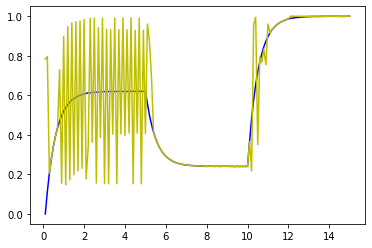

In [44]:
y_axis = values1 #network output
y = x_scaled # x noise
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

#### Error representation

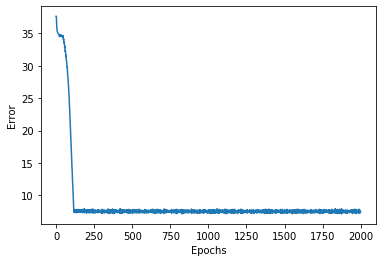

In [45]:
error_dataframe = {'Error':e1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

### Example 3(Learning rate = 0.01)

In [46]:
values1,e1,w1,itrArray1 = train_weights3(random_vals_t1, 0.01,2000)

>epoch=0, lrate=0.010, error=0.108, , sum_error=20.637
>epoch=1, lrate=0.010, error=-0.108, , sum_error=20.637
>epoch=2, lrate=0.010, error=-0.107, , sum_error=20.606
>epoch=3, lrate=0.010, error=-0.107, , sum_error=20.574
>epoch=4, lrate=0.010, error=-0.107, , sum_error=20.543
>epoch=5, lrate=0.010, error=-0.107, , sum_error=20.512
>epoch=6, lrate=0.010, error=-0.106, , sum_error=20.480
>epoch=7, lrate=0.010, error=-0.106, , sum_error=20.449
>epoch=8, lrate=0.010, error=-0.106, , sum_error=20.418
>epoch=9, lrate=0.010, error=-0.105, , sum_error=20.387
>epoch=10, lrate=0.010, error=-0.105, , sum_error=20.355
>epoch=11, lrate=0.010, error=-0.105, , sum_error=20.324
>epoch=12, lrate=0.010, error=-0.104, , sum_error=20.293
>epoch=13, lrate=0.010, error=-0.104, , sum_error=20.262
>epoch=14, lrate=0.010, error=-0.104, , sum_error=20.231
>epoch=15, lrate=0.010, error=-0.104, , sum_error=20.200
>epoch=16, lrate=0.010, error=-0.103, , sum_error=20.169
>epoch=17, lrate=0.010, error=-0.103, , su

>epoch=215, lrate=0.010, error=-0.066, , sum_error=14.600
>epoch=216, lrate=0.010, error=-0.066, , sum_error=14.575
>epoch=217, lrate=0.010, error=-0.066, , sum_error=14.551
>epoch=218, lrate=0.010, error=-0.066, , sum_error=14.526
>epoch=219, lrate=0.010, error=-0.065, , sum_error=14.502
>epoch=220, lrate=0.010, error=-0.065, , sum_error=14.477
>epoch=221, lrate=0.010, error=-0.065, , sum_error=14.453
>epoch=222, lrate=0.010, error=-0.065, , sum_error=14.429
>epoch=223, lrate=0.010, error=-0.065, , sum_error=14.404
>epoch=224, lrate=0.010, error=-0.065, , sum_error=14.380
>epoch=225, lrate=0.010, error=-0.065, , sum_error=14.356
>epoch=226, lrate=0.010, error=-0.065, , sum_error=14.332
>epoch=227, lrate=0.010, error=-0.064, , sum_error=14.308
>epoch=228, lrate=0.010, error=-0.064, , sum_error=14.283
>epoch=229, lrate=0.010, error=-0.064, , sum_error=14.259
>epoch=230, lrate=0.010, error=-0.064, , sum_error=14.235
>epoch=231, lrate=0.010, error=-0.064, , sum_error=14.211
>epoch=232, lr

>epoch=369, lrate=0.010, error=-0.051, , sum_error=11.239
>epoch=370, lrate=0.010, error=-0.051, , sum_error=11.220
>epoch=371, lrate=0.010, error=-0.051, , sum_error=11.201
>epoch=372, lrate=0.010, error=-0.051, , sum_error=11.182
>epoch=373, lrate=0.010, error=-0.051, , sum_error=11.163
>epoch=374, lrate=0.010, error=-0.051, , sum_error=11.144
>epoch=375, lrate=0.010, error=-0.051, , sum_error=11.125
>epoch=376, lrate=0.010, error=-0.051, , sum_error=11.106
>epoch=377, lrate=0.010, error=-0.051, , sum_error=11.087
>epoch=378, lrate=0.010, error=-0.050, , sum_error=11.068
>epoch=379, lrate=0.010, error=-0.050, , sum_error=11.049
>epoch=380, lrate=0.010, error=-0.050, , sum_error=11.030
>epoch=381, lrate=0.010, error=-0.050, , sum_error=11.011
>epoch=382, lrate=0.010, error=-0.050, , sum_error=10.993
>epoch=383, lrate=0.010, error=-0.050, , sum_error=10.974
>epoch=384, lrate=0.010, error=-0.050, , sum_error=10.955
>epoch=385, lrate=0.010, error=-0.050, , sum_error=10.937
>epoch=386, lr

>epoch=592, lrate=0.010, error=-0.038, , sum_error=7.715
>epoch=593, lrate=0.010, error=-0.038, , sum_error=7.702
>epoch=594, lrate=0.010, error=-0.038, , sum_error=7.690
>epoch=595, lrate=0.010, error=-0.038, , sum_error=7.677
>epoch=596, lrate=0.010, error=-0.038, , sum_error=7.664
>epoch=597, lrate=0.010, error=-0.038, , sum_error=7.652
>epoch=598, lrate=0.010, error=-0.038, , sum_error=7.639
>epoch=599, lrate=0.010, error=-0.038, , sum_error=7.626
>epoch=600, lrate=0.010, error=-0.038, , sum_error=7.614
>epoch=601, lrate=0.010, error=-0.038, , sum_error=7.601
>epoch=602, lrate=0.010, error=-0.038, , sum_error=7.589
>epoch=603, lrate=0.010, error=-0.038, , sum_error=7.576
>epoch=604, lrate=0.010, error=-0.038, , sum_error=7.564
>epoch=605, lrate=0.010, error=-0.038, , sum_error=7.551
>epoch=606, lrate=0.010, error=-0.038, , sum_error=7.539
>epoch=607, lrate=0.010, error=-0.038, , sum_error=7.526
>epoch=608, lrate=0.010, error=-0.038, , sum_error=7.514
>epoch=609, lrate=0.010, error=

>epoch=772, lrate=0.010, error=-0.032, , sum_error=5.765
>epoch=773, lrate=0.010, error=-0.032, , sum_error=5.756
>epoch=774, lrate=0.010, error=-0.032, , sum_error=5.747
>epoch=775, lrate=0.010, error=-0.032, , sum_error=5.738
>epoch=776, lrate=0.010, error=-0.032, , sum_error=5.729
>epoch=777, lrate=0.010, error=-0.032, , sum_error=5.720
>epoch=778, lrate=0.010, error=-0.032, , sum_error=5.711
>epoch=779, lrate=0.010, error=-0.032, , sum_error=5.702
>epoch=780, lrate=0.010, error=-0.032, , sum_error=5.693
>epoch=781, lrate=0.010, error=-0.032, , sum_error=5.684
>epoch=782, lrate=0.010, error=-0.032, , sum_error=5.675
>epoch=783, lrate=0.010, error=-0.032, , sum_error=5.666
>epoch=784, lrate=0.010, error=-0.032, , sum_error=5.657
>epoch=785, lrate=0.010, error=-0.032, , sum_error=5.648
>epoch=786, lrate=0.010, error=-0.032, , sum_error=5.640
>epoch=787, lrate=0.010, error=-0.032, , sum_error=5.631
>epoch=788, lrate=0.010, error=-0.032, , sum_error=5.622
>epoch=789, lrate=0.010, error=

>epoch=940, lrate=0.010, error=-0.028, , sum_error=4.465
>epoch=941, lrate=0.010, error=-0.028, , sum_error=4.459
>epoch=942, lrate=0.010, error=-0.028, , sum_error=4.452
>epoch=943, lrate=0.010, error=-0.028, , sum_error=4.446
>epoch=944, lrate=0.010, error=-0.028, , sum_error=4.439
>epoch=945, lrate=0.010, error=-0.028, , sum_error=4.433
>epoch=946, lrate=0.010, error=-0.028, , sum_error=4.426
>epoch=947, lrate=0.010, error=-0.028, , sum_error=4.420
>epoch=948, lrate=0.010, error=-0.027, , sum_error=4.413
>epoch=949, lrate=0.010, error=-0.027, , sum_error=4.407
>epoch=950, lrate=0.010, error=-0.027, , sum_error=4.401
>epoch=951, lrate=0.010, error=-0.027, , sum_error=4.394
>epoch=952, lrate=0.010, error=-0.027, , sum_error=4.388
>epoch=953, lrate=0.010, error=-0.027, , sum_error=4.381
>epoch=954, lrate=0.010, error=-0.027, , sum_error=4.375
>epoch=955, lrate=0.010, error=-0.027, , sum_error=4.369
>epoch=956, lrate=0.010, error=-0.027, , sum_error=4.362
>epoch=957, lrate=0.010, error=

>epoch=1187, lrate=0.010, error=-0.023, , sum_error=3.189
>epoch=1188, lrate=0.010, error=-0.023, , sum_error=3.185
>epoch=1189, lrate=0.010, error=-0.023, , sum_error=3.181
>epoch=1190, lrate=0.010, error=-0.023, , sum_error=3.177
>epoch=1191, lrate=0.010, error=-0.023, , sum_error=3.173
>epoch=1192, lrate=0.010, error=-0.023, , sum_error=3.169
>epoch=1193, lrate=0.010, error=-0.023, , sum_error=3.165
>epoch=1194, lrate=0.010, error=-0.023, , sum_error=3.161
>epoch=1195, lrate=0.010, error=-0.023, , sum_error=3.157
>epoch=1196, lrate=0.010, error=-0.023, , sum_error=3.153
>epoch=1197, lrate=0.010, error=-0.023, , sum_error=3.149
>epoch=1198, lrate=0.010, error=-0.023, , sum_error=3.145
>epoch=1199, lrate=0.010, error=-0.023, , sum_error=3.141
>epoch=1200, lrate=0.010, error=-0.023, , sum_error=3.137
>epoch=1201, lrate=0.010, error=-0.023, , sum_error=3.133
>epoch=1202, lrate=0.010, error=-0.023, , sum_error=3.129
>epoch=1203, lrate=0.010, error=-0.023, , sum_error=3.126
>epoch=1204, l

>epoch=1404, lrate=0.010, error=-0.020, , sum_error=2.481
>epoch=1405, lrate=0.010, error=-0.020, , sum_error=2.478
>epoch=1406, lrate=0.010, error=-0.020, , sum_error=2.475
>epoch=1407, lrate=0.010, error=-0.020, , sum_error=2.473
>epoch=1408, lrate=0.010, error=-0.020, , sum_error=2.470
>epoch=1409, lrate=0.010, error=-0.020, , sum_error=2.468
>epoch=1410, lrate=0.010, error=-0.020, , sum_error=2.465
>epoch=1411, lrate=0.010, error=-0.020, , sum_error=2.462
>epoch=1412, lrate=0.010, error=-0.020, , sum_error=2.460
>epoch=1413, lrate=0.010, error=-0.020, , sum_error=2.457
>epoch=1414, lrate=0.010, error=-0.020, , sum_error=2.455
>epoch=1415, lrate=0.010, error=-0.020, , sum_error=2.452
>epoch=1416, lrate=0.010, error=-0.020, , sum_error=2.450
>epoch=1417, lrate=0.010, error=-0.020, , sum_error=2.447
>epoch=1418, lrate=0.010, error=-0.020, , sum_error=2.444
>epoch=1419, lrate=0.010, error=-0.020, , sum_error=2.442
>epoch=1420, lrate=0.010, error=-0.020, , sum_error=2.439
>epoch=1421, l

>epoch=1639, lrate=0.010, error=-0.018, , sum_error=1.986
>epoch=1640, lrate=0.010, error=-0.018, , sum_error=1.984
>epoch=1641, lrate=0.010, error=-0.018, , sum_error=1.982
>epoch=1642, lrate=0.010, error=-0.018, , sum_error=1.981
>epoch=1643, lrate=0.010, error=-0.018, , sum_error=1.979
>epoch=1644, lrate=0.010, error=-0.018, , sum_error=1.978
>epoch=1645, lrate=0.010, error=-0.018, , sum_error=1.976
>epoch=1646, lrate=0.010, error=-0.018, , sum_error=1.974
>epoch=1647, lrate=0.010, error=-0.018, , sum_error=1.973
>epoch=1648, lrate=0.010, error=-0.017, , sum_error=1.971
>epoch=1649, lrate=0.010, error=-0.017, , sum_error=1.969
>epoch=1650, lrate=0.010, error=-0.017, , sum_error=1.968
>epoch=1651, lrate=0.010, error=-0.017, , sum_error=1.966
>epoch=1652, lrate=0.010, error=-0.017, , sum_error=1.964
>epoch=1653, lrate=0.010, error=-0.017, , sum_error=1.963
>epoch=1654, lrate=0.010, error=-0.017, , sum_error=1.961
>epoch=1655, lrate=0.010, error=-0.017, , sum_error=1.960
>epoch=1656, l

>epoch=1850, lrate=0.010, error=-0.016, , sum_error=1.695
>epoch=1851, lrate=0.010, error=-0.016, , sum_error=1.694
>epoch=1852, lrate=0.010, error=-0.016, , sum_error=1.693
>epoch=1853, lrate=0.010, error=-0.016, , sum_error=1.692
>epoch=1854, lrate=0.010, error=-0.016, , sum_error=1.691
>epoch=1855, lrate=0.010, error=-0.016, , sum_error=1.690
>epoch=1856, lrate=0.010, error=-0.016, , sum_error=1.688
>epoch=1857, lrate=0.010, error=-0.016, , sum_error=1.687
>epoch=1858, lrate=0.010, error=-0.016, , sum_error=1.686
>epoch=1859, lrate=0.010, error=-0.016, , sum_error=1.685
>epoch=1860, lrate=0.010, error=-0.016, , sum_error=1.684
>epoch=1861, lrate=0.010, error=-0.016, , sum_error=1.683
>epoch=1862, lrate=0.010, error=-0.016, , sum_error=1.682
>epoch=1863, lrate=0.010, error=-0.016, , sum_error=1.681
>epoch=1864, lrate=0.010, error=-0.016, , sum_error=1.680
>epoch=1865, lrate=0.010, error=-0.016, , sum_error=1.679
>epoch=1866, lrate=0.010, error=-0.016, , sum_error=1.677
>epoch=1867, l

#### Network Representation

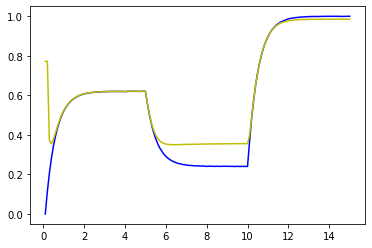

In [47]:
y_axis = values1 #network output
y = x_scaled # x noise
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

#### Error representation

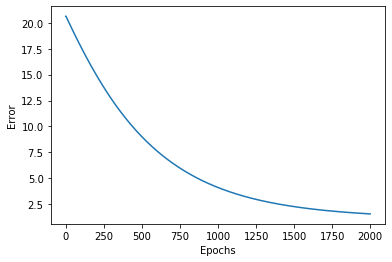

In [48]:
error_dataframe = {'Error':e1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

### Example 3(Learning rate = 0.0001)

In [49]:
values1,e1,w1,itrArray1 = train_weights3(random_vals_t1, 0.001,2000)

>epoch=0, lrate=0.001, error=0.146, , sum_error=17.814
>epoch=1, lrate=0.001, error=-0.146, , sum_error=17.814
>epoch=2, lrate=0.001, error=-0.146, , sum_error=17.811
>epoch=3, lrate=0.001, error=-0.146, , sum_error=17.808
>epoch=4, lrate=0.001, error=-0.146, , sum_error=17.804
>epoch=5, lrate=0.001, error=-0.146, , sum_error=17.801
>epoch=6, lrate=0.001, error=-0.145, , sum_error=17.798
>epoch=7, lrate=0.001, error=-0.145, , sum_error=17.794
>epoch=8, lrate=0.001, error=-0.145, , sum_error=17.791
>epoch=9, lrate=0.001, error=-0.145, , sum_error=17.787
>epoch=10, lrate=0.001, error=-0.145, , sum_error=17.784
>epoch=11, lrate=0.001, error=-0.145, , sum_error=17.781
>epoch=12, lrate=0.001, error=-0.145, , sum_error=17.777
>epoch=13, lrate=0.001, error=-0.145, , sum_error=17.774
>epoch=14, lrate=0.001, error=-0.145, , sum_error=17.771
>epoch=15, lrate=0.001, error=-0.145, , sum_error=17.767
>epoch=16, lrate=0.001, error=-0.145, , sum_error=17.764
>epoch=17, lrate=0.001, error=-0.145, , su

>epoch=151, lrate=0.001, error=-0.138, , sum_error=17.317
>epoch=152, lrate=0.001, error=-0.138, , sum_error=17.313
>epoch=153, lrate=0.001, error=-0.138, , sum_error=17.310
>epoch=154, lrate=0.001, error=-0.138, , sum_error=17.307
>epoch=155, lrate=0.001, error=-0.138, , sum_error=17.304
>epoch=156, lrate=0.001, error=-0.138, , sum_error=17.300
>epoch=157, lrate=0.001, error=-0.138, , sum_error=17.297
>epoch=158, lrate=0.001, error=-0.138, , sum_error=17.294
>epoch=159, lrate=0.001, error=-0.138, , sum_error=17.291
>epoch=160, lrate=0.001, error=-0.138, , sum_error=17.287
>epoch=161, lrate=0.001, error=-0.137, , sum_error=17.284
>epoch=162, lrate=0.001, error=-0.137, , sum_error=17.281
>epoch=163, lrate=0.001, error=-0.137, , sum_error=17.278
>epoch=164, lrate=0.001, error=-0.137, , sum_error=17.274
>epoch=165, lrate=0.001, error=-0.137, , sum_error=17.271
>epoch=166, lrate=0.001, error=-0.137, , sum_error=17.268
>epoch=167, lrate=0.001, error=-0.137, , sum_error=17.265
>epoch=168, lr

>epoch=384, lrate=0.001, error=-0.127, , sum_error=16.576
>epoch=385, lrate=0.001, error=-0.127, , sum_error=16.573
>epoch=386, lrate=0.001, error=-0.127, , sum_error=16.570
>epoch=387, lrate=0.001, error=-0.127, , sum_error=16.567
>epoch=388, lrate=0.001, error=-0.127, , sum_error=16.564
>epoch=389, lrate=0.001, error=-0.127, , sum_error=16.561
>epoch=390, lrate=0.001, error=-0.127, , sum_error=16.558
>epoch=391, lrate=0.001, error=-0.127, , sum_error=16.554
>epoch=392, lrate=0.001, error=-0.127, , sum_error=16.551
>epoch=393, lrate=0.001, error=-0.127, , sum_error=16.548
>epoch=394, lrate=0.001, error=-0.127, , sum_error=16.545
>epoch=395, lrate=0.001, error=-0.127, , sum_error=16.542
>epoch=396, lrate=0.001, error=-0.127, , sum_error=16.539
>epoch=397, lrate=0.001, error=-0.127, , sum_error=16.536
>epoch=398, lrate=0.001, error=-0.127, , sum_error=16.533
>epoch=399, lrate=0.001, error=-0.127, , sum_error=16.530
>epoch=400, lrate=0.001, error=-0.127, , sum_error=16.527
>epoch=401, lr

>epoch=593, lrate=0.001, error=-0.119, , sum_error=15.942
>epoch=594, lrate=0.001, error=-0.119, , sum_error=15.939
>epoch=595, lrate=0.001, error=-0.119, , sum_error=15.936
>epoch=596, lrate=0.001, error=-0.119, , sum_error=15.933
>epoch=597, lrate=0.001, error=-0.119, , sum_error=15.930
>epoch=598, lrate=0.001, error=-0.119, , sum_error=15.927
>epoch=599, lrate=0.001, error=-0.119, , sum_error=15.924
>epoch=600, lrate=0.001, error=-0.119, , sum_error=15.921
>epoch=601, lrate=0.001, error=-0.119, , sum_error=15.918
>epoch=602, lrate=0.001, error=-0.119, , sum_error=15.915
>epoch=603, lrate=0.001, error=-0.119, , sum_error=15.913
>epoch=604, lrate=0.001, error=-0.119, , sum_error=15.910
>epoch=605, lrate=0.001, error=-0.119, , sum_error=15.907
>epoch=606, lrate=0.001, error=-0.118, , sum_error=15.904
>epoch=607, lrate=0.001, error=-0.118, , sum_error=15.901
>epoch=608, lrate=0.001, error=-0.118, , sum_error=15.898
>epoch=609, lrate=0.001, error=-0.118, , sum_error=15.895
>epoch=610, lr

>epoch=834, lrate=0.001, error=-0.111, , sum_error=15.244
>epoch=835, lrate=0.001, error=-0.111, , sum_error=15.241
>epoch=836, lrate=0.001, error=-0.110, , sum_error=15.238
>epoch=837, lrate=0.001, error=-0.110, , sum_error=15.235
>epoch=838, lrate=0.001, error=-0.110, , sum_error=15.232
>epoch=839, lrate=0.001, error=-0.110, , sum_error=15.230
>epoch=840, lrate=0.001, error=-0.110, , sum_error=15.227
>epoch=841, lrate=0.001, error=-0.110, , sum_error=15.224
>epoch=842, lrate=0.001, error=-0.110, , sum_error=15.221
>epoch=843, lrate=0.001, error=-0.110, , sum_error=15.218
>epoch=844, lrate=0.001, error=-0.110, , sum_error=15.215
>epoch=845, lrate=0.001, error=-0.110, , sum_error=15.213
>epoch=846, lrate=0.001, error=-0.110, , sum_error=15.210
>epoch=847, lrate=0.001, error=-0.110, , sum_error=15.207
>epoch=848, lrate=0.001, error=-0.110, , sum_error=15.204
>epoch=849, lrate=0.001, error=-0.110, , sum_error=15.201
>epoch=850, lrate=0.001, error=-0.110, , sum_error=15.198
>epoch=851, lr

>epoch=1058, lrate=0.001, error=-0.104, , sum_error=14.623
>epoch=1059, lrate=0.001, error=-0.104, , sum_error=14.621
>epoch=1060, lrate=0.001, error=-0.104, , sum_error=14.618
>epoch=1061, lrate=0.001, error=-0.104, , sum_error=14.615
>epoch=1062, lrate=0.001, error=-0.104, , sum_error=14.613
>epoch=1063, lrate=0.001, error=-0.104, , sum_error=14.610
>epoch=1064, lrate=0.001, error=-0.103, , sum_error=14.607
>epoch=1065, lrate=0.001, error=-0.103, , sum_error=14.604
>epoch=1066, lrate=0.001, error=-0.103, , sum_error=14.602
>epoch=1067, lrate=0.001, error=-0.103, , sum_error=14.599
>epoch=1068, lrate=0.001, error=-0.103, , sum_error=14.596
>epoch=1069, lrate=0.001, error=-0.103, , sum_error=14.594
>epoch=1070, lrate=0.001, error=-0.103, , sum_error=14.591
>epoch=1071, lrate=0.001, error=-0.103, , sum_error=14.588
>epoch=1072, lrate=0.001, error=-0.103, , sum_error=14.585
>epoch=1073, lrate=0.001, error=-0.103, , sum_error=14.583
>epoch=1074, lrate=0.001, error=-0.103, , sum_error=14.5

>epoch=1273, lrate=0.001, error=-0.098, , sum_error=14.053
>epoch=1274, lrate=0.001, error=-0.098, , sum_error=14.050
>epoch=1275, lrate=0.001, error=-0.098, , sum_error=14.048
>epoch=1276, lrate=0.001, error=-0.098, , sum_error=14.045
>epoch=1277, lrate=0.001, error=-0.098, , sum_error=14.042
>epoch=1278, lrate=0.001, error=-0.098, , sum_error=14.040
>epoch=1279, lrate=0.001, error=-0.098, , sum_error=14.037
>epoch=1280, lrate=0.001, error=-0.098, , sum_error=14.035
>epoch=1281, lrate=0.001, error=-0.098, , sum_error=14.032
>epoch=1282, lrate=0.001, error=-0.098, , sum_error=14.029
>epoch=1283, lrate=0.001, error=-0.098, , sum_error=14.027
>epoch=1284, lrate=0.001, error=-0.097, , sum_error=14.024
>epoch=1285, lrate=0.001, error=-0.097, , sum_error=14.022
>epoch=1286, lrate=0.001, error=-0.097, , sum_error=14.019
>epoch=1287, lrate=0.001, error=-0.097, , sum_error=14.016
>epoch=1288, lrate=0.001, error=-0.097, , sum_error=14.014
>epoch=1289, lrate=0.001, error=-0.097, , sum_error=14.0

>epoch=1478, lrate=0.001, error=-0.093, , sum_error=13.530
>epoch=1479, lrate=0.001, error=-0.093, , sum_error=13.528
>epoch=1480, lrate=0.001, error=-0.093, , sum_error=13.525
>epoch=1481, lrate=0.001, error=-0.093, , sum_error=13.523
>epoch=1482, lrate=0.001, error=-0.093, , sum_error=13.520
>epoch=1483, lrate=0.001, error=-0.093, , sum_error=13.518
>epoch=1484, lrate=0.001, error=-0.093, , sum_error=13.515
>epoch=1485, lrate=0.001, error=-0.093, , sum_error=13.513
>epoch=1486, lrate=0.001, error=-0.093, , sum_error=13.510
>epoch=1487, lrate=0.001, error=-0.092, , sum_error=13.508
>epoch=1488, lrate=0.001, error=-0.092, , sum_error=13.505
>epoch=1489, lrate=0.001, error=-0.092, , sum_error=13.503
>epoch=1490, lrate=0.001, error=-0.092, , sum_error=13.500
>epoch=1491, lrate=0.001, error=-0.092, , sum_error=13.498
>epoch=1492, lrate=0.001, error=-0.092, , sum_error=13.495
>epoch=1493, lrate=0.001, error=-0.092, , sum_error=13.493
>epoch=1494, lrate=0.001, error=-0.092, , sum_error=13.4

>epoch=1697, lrate=0.001, error=-0.088, , sum_error=12.994
>epoch=1698, lrate=0.001, error=-0.088, , sum_error=12.992
>epoch=1699, lrate=0.001, error=-0.088, , sum_error=12.989
>epoch=1700, lrate=0.001, error=-0.088, , sum_error=12.987
>epoch=1701, lrate=0.001, error=-0.088, , sum_error=12.985
>epoch=1702, lrate=0.001, error=-0.088, , sum_error=12.982
>epoch=1703, lrate=0.001, error=-0.088, , sum_error=12.980
>epoch=1704, lrate=0.001, error=-0.088, , sum_error=12.977
>epoch=1705, lrate=0.001, error=-0.088, , sum_error=12.975
>epoch=1706, lrate=0.001, error=-0.088, , sum_error=12.973
>epoch=1707, lrate=0.001, error=-0.088, , sum_error=12.970
>epoch=1708, lrate=0.001, error=-0.088, , sum_error=12.968
>epoch=1709, lrate=0.001, error=-0.088, , sum_error=12.965
>epoch=1710, lrate=0.001, error=-0.088, , sum_error=12.963
>epoch=1711, lrate=0.001, error=-0.088, , sum_error=12.961
>epoch=1712, lrate=0.001, error=-0.088, , sum_error=12.958
>epoch=1713, lrate=0.001, error=-0.087, , sum_error=12.9

>epoch=1898, lrate=0.001, error=-0.084, , sum_error=12.522
>epoch=1899, lrate=0.001, error=-0.084, , sum_error=12.519
>epoch=1900, lrate=0.001, error=-0.084, , sum_error=12.517
>epoch=1901, lrate=0.001, error=-0.084, , sum_error=12.515
>epoch=1902, lrate=0.001, error=-0.084, , sum_error=12.513
>epoch=1903, lrate=0.001, error=-0.084, , sum_error=12.510
>epoch=1904, lrate=0.001, error=-0.084, , sum_error=12.508
>epoch=1905, lrate=0.001, error=-0.084, , sum_error=12.506
>epoch=1906, lrate=0.001, error=-0.084, , sum_error=12.503
>epoch=1907, lrate=0.001, error=-0.084, , sum_error=12.501
>epoch=1908, lrate=0.001, error=-0.084, , sum_error=12.499
>epoch=1909, lrate=0.001, error=-0.084, , sum_error=12.496
>epoch=1910, lrate=0.001, error=-0.084, , sum_error=12.494
>epoch=1911, lrate=0.001, error=-0.084, , sum_error=12.492
>epoch=1912, lrate=0.001, error=-0.083, , sum_error=12.490
>epoch=1913, lrate=0.001, error=-0.083, , sum_error=12.487
>epoch=1914, lrate=0.001, error=-0.083, , sum_error=12.4

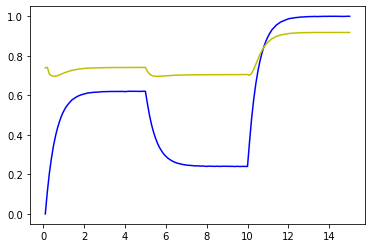

In [50]:
y_axis = values1 #network output
y = x_scaled # x noise
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

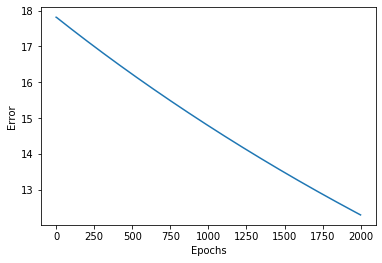

In [51]:
error_dataframe = {'Error':e1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

# Testing perceptron with different number of inputs

## One input

In [274]:
def sigmoid_activation(val):
    sigmoid = 1/(1+np.exp(-val))#sigmoid activation function
    return sigmoid

def train_weights1(array, lr, loops):
    weights3 = [rand.uniform(0,1),rand.uniform(0,1)] #initialise weights
    weights3_1 = []             #append/save created weights
    itr_array = []
    sum_error_array = []
    for loop in range(loops):   #for each epoch in epochs
        net_array = []          #append network values
        error_array = []        #append error array
        sum_error = 0.0         #keep track of sum_error
        c = 0                   #counter variable
        w_adaptor = 0           #weight counter(used to iterate through each value in weights array)
        future = 0
        if loop < 1:            #if its less than one epoch, create new weights and append them to an array
            for a in array:     #for each input in array input
                weights3_1.append([weights3[0],weights3[1]]) #append weights created
                if(c < (len(array)-1)):
                    future = array[c+1]
                    #print("first",a,"second",future)
                prediction = predict1(a,weights3)                                #grab weights created and predict
                Target = future
                delta = Target - prediction      #calculate error
                error = delta
                error_array.append(error)        #append error
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change = lr*error*Target
                weights3[0] = weights3[0] + weights3_change #obtain respective weight and add it with the weight change
                weights3[1] = weights3[1] + weights3_change #obtain respective weight and add it with the weight change
                sum_error += error**2            #calculate sum_error
                c = c + 1                        #increment counter
            sum_error_array.append(sum_error)
            itr_array.append(loop)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
        else:                               #if epoch is > 1
            for a in array:                 #for each input in input array
                prediction = predict1(a,weights3_1[w_adaptor]) #calculate predictions using weights from previous epoch
                if(c < (len(array)-1)):
                    future = array[c+1]
                Target = future
                delta = Target - prediction #calculate error
                #print("error",error)
                error = delta
                error_array.append(error)   #append error
                net_array.append(prediction)#append predictions
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change = lr*error*Target
                weights3_1[w_adaptor][0] =  weights3_1[w_adaptor][0] + weights3_change #update respective weights in weights array
                weights3_1[w_adaptor][1] =  weights3_1[w_adaptor][1] + weights3_change #update respective weights in weights array
                sum_error += error**2                   #calculate sum_error
                c = c + 1                               #increment counter
                w_adaptor = w_adaptor + 1               #increment weight counter
            itr_array.append(loop)
            sum_error_array.append(sum_error)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
    return net_array,sum_error_array,weights3_1,itr_array
            
def predict1(noise2,weights2):
    net_sum = 1
    net_sum +=net_sum*weights2[0] #obtain bias from weight array
    net_sum += weights2[1] * noise2 #multiply input by respective weight to obtain a summation
    activation2 = sigmoid_activation(net_sum)  #implement sigmoid function to summation obtained
    return activation2               #return activation and network sum

#normalize data and feed into tuple
def triple_converter(array):                   #converts input into a tuple so that we can pass 3 input weights per prediction
    triple_array = []
    c = 0 #counter
    while c < len(array):
        if c == 0:
            triple_array.append([0,0,array[c]])
        elif c == 1:
            triple_array.append([0,array[c],array[c-1]])
        else:
            triple_array.append([array[c],array[c-1],array[c-2]])
        c = c + 1                              #increment counter
    return triple_array


##----------------------------------------ACCURACY CALCULATOR--------------------------------------##
def accuracy(Target, Predicted):
    Expected = abs(Target - Predicted)
    result = Expected/Target * 100
    return result

In [283]:
random_vals1 = []
#data,std_dev.mean
random_vals1,_,_ = box_muller(x_save2,0.001,_mean) #call box muller
x_scaled = preprocessing.minmax_scale(random_vals1)
#random_vals_t1 = triple_converter(x_scaled)
values1,e1,w1,itrArray1 = train_weights1(x_scaled, 0.01,10000)

>epoch=0, lrate=0.010, error=0.162, , sum_error=17.643
>epoch=1, lrate=0.010, error=0.162, , sum_error=17.643
>epoch=2, lrate=0.010, error=0.161, , sum_error=17.614
>epoch=3, lrate=0.010, error=0.161, , sum_error=17.586
>epoch=4, lrate=0.010, error=0.160, , sum_error=17.557
>epoch=5, lrate=0.010, error=0.160, , sum_error=17.528
>epoch=6, lrate=0.010, error=0.159, , sum_error=17.500
>epoch=7, lrate=0.010, error=0.159, , sum_error=17.471
>epoch=8, lrate=0.010, error=0.159, , sum_error=17.443
>epoch=9, lrate=0.010, error=0.158, , sum_error=17.415
>epoch=10, lrate=0.010, error=0.158, , sum_error=17.386
>epoch=11, lrate=0.010, error=0.157, , sum_error=17.358
>epoch=12, lrate=0.010, error=0.157, , sum_error=17.330
>epoch=13, lrate=0.010, error=0.157, , sum_error=17.302
>epoch=14, lrate=0.010, error=0.156, , sum_error=17.274
>epoch=15, lrate=0.010, error=0.156, , sum_error=17.246
>epoch=16, lrate=0.010, error=0.155, , sum_error=17.218
>epoch=17, lrate=0.010, error=0.155, , sum_error=17.190
>e

>epoch=201, lrate=0.010, error=0.103, , sum_error=12.803
>epoch=202, lrate=0.010, error=0.103, , sum_error=12.782
>epoch=203, lrate=0.010, error=0.103, , sum_error=12.762
>epoch=204, lrate=0.010, error=0.103, , sum_error=12.741
>epoch=205, lrate=0.010, error=0.102, , sum_error=12.721
>epoch=206, lrate=0.010, error=0.102, , sum_error=12.701
>epoch=207, lrate=0.010, error=0.102, , sum_error=12.680
>epoch=208, lrate=0.010, error=0.102, , sum_error=12.660
>epoch=209, lrate=0.010, error=0.102, , sum_error=12.640
>epoch=210, lrate=0.010, error=0.101, , sum_error=12.619
>epoch=211, lrate=0.010, error=0.101, , sum_error=12.599
>epoch=212, lrate=0.010, error=0.101, , sum_error=12.579
>epoch=213, lrate=0.010, error=0.101, , sum_error=12.559
>epoch=214, lrate=0.010, error=0.101, , sum_error=12.539
>epoch=215, lrate=0.010, error=0.100, , sum_error=12.519
>epoch=216, lrate=0.010, error=0.100, , sum_error=12.498
>epoch=217, lrate=0.010, error=0.100, , sum_error=12.478
>epoch=218, lrate=0.010, error=

>epoch=389, lrate=0.010, error=0.076, , sum_error=9.455
>epoch=390, lrate=0.010, error=0.076, , sum_error=9.440
>epoch=391, lrate=0.010, error=0.076, , sum_error=9.424
>epoch=392, lrate=0.010, error=0.076, , sum_error=9.409
>epoch=393, lrate=0.010, error=0.076, , sum_error=9.394
>epoch=394, lrate=0.010, error=0.075, , sum_error=9.379
>epoch=395, lrate=0.010, error=0.075, , sum_error=9.363
>epoch=396, lrate=0.010, error=0.075, , sum_error=9.348
>epoch=397, lrate=0.010, error=0.075, , sum_error=9.333
>epoch=398, lrate=0.010, error=0.075, , sum_error=9.318
>epoch=399, lrate=0.010, error=0.075, , sum_error=9.303
>epoch=400, lrate=0.010, error=0.075, , sum_error=9.288
>epoch=401, lrate=0.010, error=0.075, , sum_error=9.273
>epoch=402, lrate=0.010, error=0.075, , sum_error=9.258
>epoch=403, lrate=0.010, error=0.074, , sum_error=9.243
>epoch=404, lrate=0.010, error=0.074, , sum_error=9.228
>epoch=405, lrate=0.010, error=0.074, , sum_error=9.213
>epoch=406, lrate=0.010, error=0.074, , sum_erro

>epoch=593, lrate=0.010, error=0.059, , sum_error=6.796
>epoch=594, lrate=0.010, error=0.059, , sum_error=6.785
>epoch=595, lrate=0.010, error=0.059, , sum_error=6.774
>epoch=596, lrate=0.010, error=0.059, , sum_error=6.763
>epoch=597, lrate=0.010, error=0.058, , sum_error=6.752
>epoch=598, lrate=0.010, error=0.058, , sum_error=6.741
>epoch=599, lrate=0.010, error=0.058, , sum_error=6.731
>epoch=600, lrate=0.010, error=0.058, , sum_error=6.720
>epoch=601, lrate=0.010, error=0.058, , sum_error=6.709
>epoch=602, lrate=0.010, error=0.058, , sum_error=6.698
>epoch=603, lrate=0.010, error=0.058, , sum_error=6.687
>epoch=604, lrate=0.010, error=0.058, , sum_error=6.677
>epoch=605, lrate=0.010, error=0.058, , sum_error=6.666
>epoch=606, lrate=0.010, error=0.058, , sum_error=6.655
>epoch=607, lrate=0.010, error=0.058, , sum_error=6.644
>epoch=608, lrate=0.010, error=0.058, , sum_error=6.634
>epoch=609, lrate=0.010, error=0.058, , sum_error=6.623
>epoch=610, lrate=0.010, error=0.058, , sum_erro

>epoch=769, lrate=0.010, error=0.049, , sum_error=5.126
>epoch=770, lrate=0.010, error=0.049, , sum_error=5.118
>epoch=771, lrate=0.010, error=0.049, , sum_error=5.110
>epoch=772, lrate=0.010, error=0.049, , sum_error=5.102
>epoch=773, lrate=0.010, error=0.049, , sum_error=5.093
>epoch=774, lrate=0.010, error=0.049, , sum_error=5.085
>epoch=775, lrate=0.010, error=0.049, , sum_error=5.077
>epoch=776, lrate=0.010, error=0.049, , sum_error=5.069
>epoch=777, lrate=0.010, error=0.049, , sum_error=5.061
>epoch=778, lrate=0.010, error=0.049, , sum_error=5.053
>epoch=779, lrate=0.010, error=0.049, , sum_error=5.045
>epoch=780, lrate=0.010, error=0.048, , sum_error=5.037
>epoch=781, lrate=0.010, error=0.048, , sum_error=5.029
>epoch=782, lrate=0.010, error=0.048, , sum_error=5.021
>epoch=783, lrate=0.010, error=0.048, , sum_error=5.013
>epoch=784, lrate=0.010, error=0.048, , sum_error=5.005
>epoch=785, lrate=0.010, error=0.048, , sum_error=4.997
>epoch=786, lrate=0.010, error=0.048, , sum_erro

>epoch=969, lrate=0.010, error=0.041, , sum_error=3.744
>epoch=970, lrate=0.010, error=0.041, , sum_error=3.739
>epoch=971, lrate=0.010, error=0.041, , sum_error=3.733
>epoch=972, lrate=0.010, error=0.041, , sum_error=3.727
>epoch=973, lrate=0.010, error=0.041, , sum_error=3.721
>epoch=974, lrate=0.010, error=0.041, , sum_error=3.716
>epoch=975, lrate=0.010, error=0.041, , sum_error=3.710
>epoch=976, lrate=0.010, error=0.041, , sum_error=3.704
>epoch=977, lrate=0.010, error=0.041, , sum_error=3.698
>epoch=978, lrate=0.010, error=0.041, , sum_error=3.693
>epoch=979, lrate=0.010, error=0.041, , sum_error=3.687
>epoch=980, lrate=0.010, error=0.041, , sum_error=3.681
>epoch=981, lrate=0.010, error=0.041, , sum_error=3.676
>epoch=982, lrate=0.010, error=0.041, , sum_error=3.670
>epoch=983, lrate=0.010, error=0.041, , sum_error=3.664
>epoch=984, lrate=0.010, error=0.041, , sum_error=3.659
>epoch=985, lrate=0.010, error=0.041, , sum_error=3.653
>epoch=986, lrate=0.010, error=0.041, , sum_erro

>epoch=1176, lrate=0.010, error=0.035, , sum_error=2.731
>epoch=1177, lrate=0.010, error=0.035, , sum_error=2.727
>epoch=1178, lrate=0.010, error=0.035, , sum_error=2.723
>epoch=1179, lrate=0.010, error=0.035, , sum_error=2.719
>epoch=1180, lrate=0.010, error=0.035, , sum_error=2.715
>epoch=1181, lrate=0.010, error=0.035, , sum_error=2.711
>epoch=1182, lrate=0.010, error=0.035, , sum_error=2.707
>epoch=1183, lrate=0.010, error=0.035, , sum_error=2.703
>epoch=1184, lrate=0.010, error=0.035, , sum_error=2.699
>epoch=1185, lrate=0.010, error=0.035, , sum_error=2.695
>epoch=1186, lrate=0.010, error=0.035, , sum_error=2.690
>epoch=1187, lrate=0.010, error=0.035, , sum_error=2.686
>epoch=1188, lrate=0.010, error=0.035, , sum_error=2.682
>epoch=1189, lrate=0.010, error=0.035, , sum_error=2.678
>epoch=1190, lrate=0.010, error=0.035, , sum_error=2.674
>epoch=1191, lrate=0.010, error=0.035, , sum_error=2.670
>epoch=1192, lrate=0.010, error=0.035, , sum_error=2.666
>epoch=1193, lrate=0.010, error

>epoch=1377, lrate=0.010, error=0.031, , sum_error=2.031
>epoch=1378, lrate=0.010, error=0.031, , sum_error=2.029
>epoch=1379, lrate=0.010, error=0.031, , sum_error=2.026
>epoch=1380, lrate=0.010, error=0.031, , sum_error=2.023
>epoch=1381, lrate=0.010, error=0.031, , sum_error=2.020
>epoch=1382, lrate=0.010, error=0.031, , sum_error=2.017
>epoch=1383, lrate=0.010, error=0.031, , sum_error=2.014
>epoch=1384, lrate=0.010, error=0.031, , sum_error=2.011
>epoch=1385, lrate=0.010, error=0.031, , sum_error=2.008
>epoch=1386, lrate=0.010, error=0.031, , sum_error=2.005
>epoch=1387, lrate=0.010, error=0.031, , sum_error=2.002
>epoch=1388, lrate=0.010, error=0.031, , sum_error=1.999
>epoch=1389, lrate=0.010, error=0.031, , sum_error=1.997
>epoch=1390, lrate=0.010, error=0.031, , sum_error=1.994
>epoch=1391, lrate=0.010, error=0.031, , sum_error=1.991
>epoch=1392, lrate=0.010, error=0.031, , sum_error=1.988
>epoch=1393, lrate=0.010, error=0.031, , sum_error=1.985
>epoch=1394, lrate=0.010, error

>epoch=1576, lrate=0.010, error=0.027, , sum_error=1.532
>epoch=1577, lrate=0.010, error=0.027, , sum_error=1.530
>epoch=1578, lrate=0.010, error=0.027, , sum_error=1.528
>epoch=1579, lrate=0.010, error=0.027, , sum_error=1.526
>epoch=1580, lrate=0.010, error=0.027, , sum_error=1.523
>epoch=1581, lrate=0.010, error=0.027, , sum_error=1.521
>epoch=1582, lrate=0.010, error=0.027, , sum_error=1.519
>epoch=1583, lrate=0.010, error=0.027, , sum_error=1.517
>epoch=1584, lrate=0.010, error=0.027, , sum_error=1.515
>epoch=1585, lrate=0.010, error=0.027, , sum_error=1.513
>epoch=1586, lrate=0.010, error=0.027, , sum_error=1.511
>epoch=1587, lrate=0.010, error=0.027, , sum_error=1.509
>epoch=1588, lrate=0.010, error=0.027, , sum_error=1.507
>epoch=1589, lrate=0.010, error=0.027, , sum_error=1.504
>epoch=1590, lrate=0.010, error=0.027, , sum_error=1.502
>epoch=1591, lrate=0.010, error=0.027, , sum_error=1.500
>epoch=1592, lrate=0.010, error=0.027, , sum_error=1.498
>epoch=1593, lrate=0.010, error

>epoch=1779, lrate=0.010, error=0.025, , sum_error=1.162
>epoch=1780, lrate=0.010, error=0.025, , sum_error=1.160
>epoch=1781, lrate=0.010, error=0.025, , sum_error=1.158
>epoch=1782, lrate=0.010, error=0.025, , sum_error=1.157
>epoch=1783, lrate=0.010, error=0.025, , sum_error=1.155
>epoch=1784, lrate=0.010, error=0.025, , sum_error=1.154
>epoch=1785, lrate=0.010, error=0.025, , sum_error=1.152
>epoch=1786, lrate=0.010, error=0.025, , sum_error=1.151
>epoch=1787, lrate=0.010, error=0.025, , sum_error=1.149
>epoch=1788, lrate=0.010, error=0.025, , sum_error=1.148
>epoch=1789, lrate=0.010, error=0.025, , sum_error=1.146
>epoch=1790, lrate=0.010, error=0.025, , sum_error=1.145
>epoch=1791, lrate=0.010, error=0.025, , sum_error=1.143
>epoch=1792, lrate=0.010, error=0.025, , sum_error=1.142
>epoch=1793, lrate=0.010, error=0.024, , sum_error=1.140
>epoch=1794, lrate=0.010, error=0.024, , sum_error=1.138
>epoch=1795, lrate=0.010, error=0.024, , sum_error=1.137
>epoch=1796, lrate=0.010, error

>epoch=1994, lrate=0.010, error=0.022, , sum_error=0.877
>epoch=1995, lrate=0.010, error=0.022, , sum_error=0.876
>epoch=1996, lrate=0.010, error=0.022, , sum_error=0.875
>epoch=1997, lrate=0.010, error=0.022, , sum_error=0.874
>epoch=1998, lrate=0.010, error=0.022, , sum_error=0.872
>epoch=1999, lrate=0.010, error=0.022, , sum_error=0.871
>epoch=2000, lrate=0.010, error=0.022, , sum_error=0.870
>epoch=2001, lrate=0.010, error=0.022, , sum_error=0.869
>epoch=2002, lrate=0.010, error=0.022, , sum_error=0.868
>epoch=2003, lrate=0.010, error=0.022, , sum_error=0.867
>epoch=2004, lrate=0.010, error=0.022, , sum_error=0.866
>epoch=2005, lrate=0.010, error=0.022, , sum_error=0.865
>epoch=2006, lrate=0.010, error=0.022, , sum_error=0.864
>epoch=2007, lrate=0.010, error=0.022, , sum_error=0.862
>epoch=2008, lrate=0.010, error=0.022, , sum_error=0.861
>epoch=2009, lrate=0.010, error=0.022, , sum_error=0.860
>epoch=2010, lrate=0.010, error=0.022, , sum_error=0.859
>epoch=2011, lrate=0.010, error

>epoch=2207, lrate=0.010, error=0.020, , sum_error=0.672
>epoch=2208, lrate=0.010, error=0.020, , sum_error=0.671
>epoch=2209, lrate=0.010, error=0.020, , sum_error=0.670
>epoch=2210, lrate=0.010, error=0.020, , sum_error=0.669
>epoch=2211, lrate=0.010, error=0.020, , sum_error=0.668
>epoch=2212, lrate=0.010, error=0.020, , sum_error=0.668
>epoch=2213, lrate=0.010, error=0.020, , sum_error=0.667
>epoch=2214, lrate=0.010, error=0.020, , sum_error=0.666
>epoch=2215, lrate=0.010, error=0.020, , sum_error=0.665
>epoch=2216, lrate=0.010, error=0.020, , sum_error=0.664
>epoch=2217, lrate=0.010, error=0.020, , sum_error=0.664
>epoch=2218, lrate=0.010, error=0.020, , sum_error=0.663
>epoch=2219, lrate=0.010, error=0.020, , sum_error=0.662
>epoch=2220, lrate=0.010, error=0.020, , sum_error=0.661
>epoch=2221, lrate=0.010, error=0.020, , sum_error=0.660
>epoch=2222, lrate=0.010, error=0.020, , sum_error=0.659
>epoch=2223, lrate=0.010, error=0.020, , sum_error=0.659
>epoch=2224, lrate=0.010, error

>epoch=2394, lrate=0.010, error=0.019, , sum_error=0.537
>epoch=2395, lrate=0.010, error=0.019, , sum_error=0.536
>epoch=2396, lrate=0.010, error=0.019, , sum_error=0.535
>epoch=2397, lrate=0.010, error=0.019, , sum_error=0.535
>epoch=2398, lrate=0.010, error=0.019, , sum_error=0.534
>epoch=2399, lrate=0.010, error=0.019, , sum_error=0.533
>epoch=2400, lrate=0.010, error=0.019, , sum_error=0.533
>epoch=2401, lrate=0.010, error=0.019, , sum_error=0.532
>epoch=2402, lrate=0.010, error=0.019, , sum_error=0.532
>epoch=2403, lrate=0.010, error=0.019, , sum_error=0.531
>epoch=2404, lrate=0.010, error=0.019, , sum_error=0.530
>epoch=2405, lrate=0.010, error=0.019, , sum_error=0.530
>epoch=2406, lrate=0.010, error=0.019, , sum_error=0.529
>epoch=2407, lrate=0.010, error=0.019, , sum_error=0.528
>epoch=2408, lrate=0.010, error=0.019, , sum_error=0.528
>epoch=2409, lrate=0.010, error=0.019, , sum_error=0.527
>epoch=2410, lrate=0.010, error=0.019, , sum_error=0.527
>epoch=2411, lrate=0.010, error

>epoch=2602, lrate=0.010, error=0.017, , sum_error=0.422
>epoch=2603, lrate=0.010, error=0.017, , sum_error=0.422
>epoch=2604, lrate=0.010, error=0.017, , sum_error=0.421
>epoch=2605, lrate=0.010, error=0.017, , sum_error=0.421
>epoch=2606, lrate=0.010, error=0.017, , sum_error=0.420
>epoch=2607, lrate=0.010, error=0.017, , sum_error=0.420
>epoch=2608, lrate=0.010, error=0.017, , sum_error=0.419
>epoch=2609, lrate=0.010, error=0.017, , sum_error=0.419
>epoch=2610, lrate=0.010, error=0.017, , sum_error=0.418
>epoch=2611, lrate=0.010, error=0.017, , sum_error=0.418
>epoch=2612, lrate=0.010, error=0.017, , sum_error=0.417
>epoch=2613, lrate=0.010, error=0.017, , sum_error=0.417
>epoch=2614, lrate=0.010, error=0.017, , sum_error=0.416
>epoch=2615, lrate=0.010, error=0.017, , sum_error=0.416
>epoch=2616, lrate=0.010, error=0.017, , sum_error=0.415
>epoch=2617, lrate=0.010, error=0.017, , sum_error=0.415
>epoch=2618, lrate=0.010, error=0.017, , sum_error=0.415
>epoch=2619, lrate=0.010, error

>epoch=2805, lrate=0.010, error=0.016, , sum_error=0.337
>epoch=2806, lrate=0.010, error=0.016, , sum_error=0.337
>epoch=2807, lrate=0.010, error=0.016, , sum_error=0.336
>epoch=2808, lrate=0.010, error=0.016, , sum_error=0.336
>epoch=2809, lrate=0.010, error=0.016, , sum_error=0.336
>epoch=2810, lrate=0.010, error=0.016, , sum_error=0.335
>epoch=2811, lrate=0.010, error=0.016, , sum_error=0.335
>epoch=2812, lrate=0.010, error=0.016, , sum_error=0.335
>epoch=2813, lrate=0.010, error=0.016, , sum_error=0.334
>epoch=2814, lrate=0.010, error=0.016, , sum_error=0.334
>epoch=2815, lrate=0.010, error=0.016, , sum_error=0.334
>epoch=2816, lrate=0.010, error=0.016, , sum_error=0.333
>epoch=2817, lrate=0.010, error=0.016, , sum_error=0.333
>epoch=2818, lrate=0.010, error=0.016, , sum_error=0.332
>epoch=2819, lrate=0.010, error=0.016, , sum_error=0.332
>epoch=2820, lrate=0.010, error=0.016, , sum_error=0.332
>epoch=2821, lrate=0.010, error=0.016, , sum_error=0.331
>epoch=2822, lrate=0.010, error

>epoch=3015, lrate=0.010, error=0.015, , sum_error=0.270
>epoch=3016, lrate=0.010, error=0.015, , sum_error=0.270
>epoch=3017, lrate=0.010, error=0.015, , sum_error=0.269
>epoch=3018, lrate=0.010, error=0.015, , sum_error=0.269
>epoch=3019, lrate=0.010, error=0.015, , sum_error=0.269
>epoch=3020, lrate=0.010, error=0.015, , sum_error=0.268
>epoch=3021, lrate=0.010, error=0.015, , sum_error=0.268
>epoch=3022, lrate=0.010, error=0.015, , sum_error=0.268
>epoch=3023, lrate=0.010, error=0.015, , sum_error=0.268
>epoch=3024, lrate=0.010, error=0.015, , sum_error=0.267
>epoch=3025, lrate=0.010, error=0.015, , sum_error=0.267
>epoch=3026, lrate=0.010, error=0.015, , sum_error=0.267
>epoch=3027, lrate=0.010, error=0.015, , sum_error=0.267
>epoch=3028, lrate=0.010, error=0.015, , sum_error=0.266
>epoch=3029, lrate=0.010, error=0.015, , sum_error=0.266
>epoch=3030, lrate=0.010, error=0.015, , sum_error=0.266
>epoch=3031, lrate=0.010, error=0.015, , sum_error=0.265
>epoch=3032, lrate=0.010, error

>epoch=3210, lrate=0.010, error=0.014, , sum_error=0.221
>epoch=3211, lrate=0.010, error=0.014, , sum_error=0.221
>epoch=3212, lrate=0.010, error=0.014, , sum_error=0.221
>epoch=3213, lrate=0.010, error=0.014, , sum_error=0.221
>epoch=3214, lrate=0.010, error=0.014, , sum_error=0.220
>epoch=3215, lrate=0.010, error=0.014, , sum_error=0.220
>epoch=3216, lrate=0.010, error=0.014, , sum_error=0.220
>epoch=3217, lrate=0.010, error=0.014, , sum_error=0.220
>epoch=3218, lrate=0.010, error=0.014, , sum_error=0.220
>epoch=3219, lrate=0.010, error=0.014, , sum_error=0.219
>epoch=3220, lrate=0.010, error=0.014, , sum_error=0.219
>epoch=3221, lrate=0.010, error=0.014, , sum_error=0.219
>epoch=3222, lrate=0.010, error=0.014, , sum_error=0.219
>epoch=3223, lrate=0.010, error=0.014, , sum_error=0.218
>epoch=3224, lrate=0.010, error=0.014, , sum_error=0.218
>epoch=3225, lrate=0.010, error=0.014, , sum_error=0.218
>epoch=3226, lrate=0.010, error=0.014, , sum_error=0.218
>epoch=3227, lrate=0.010, error

>epoch=3422, lrate=0.010, error=0.013, , sum_error=0.180
>epoch=3423, lrate=0.010, error=0.013, , sum_error=0.180
>epoch=3424, lrate=0.010, error=0.013, , sum_error=0.180
>epoch=3425, lrate=0.010, error=0.013, , sum_error=0.179
>epoch=3426, lrate=0.010, error=0.013, , sum_error=0.179
>epoch=3427, lrate=0.010, error=0.013, , sum_error=0.179
>epoch=3428, lrate=0.010, error=0.013, , sum_error=0.179
>epoch=3429, lrate=0.010, error=0.013, , sum_error=0.179
>epoch=3430, lrate=0.010, error=0.013, , sum_error=0.179
>epoch=3431, lrate=0.010, error=0.013, , sum_error=0.178
>epoch=3432, lrate=0.010, error=0.013, , sum_error=0.178
>epoch=3433, lrate=0.010, error=0.013, , sum_error=0.178
>epoch=3434, lrate=0.010, error=0.013, , sum_error=0.178
>epoch=3435, lrate=0.010, error=0.013, , sum_error=0.178
>epoch=3436, lrate=0.010, error=0.013, , sum_error=0.178
>epoch=3437, lrate=0.010, error=0.013, , sum_error=0.177
>epoch=3438, lrate=0.010, error=0.013, , sum_error=0.177
>epoch=3439, lrate=0.010, error

>epoch=3618, lrate=0.010, error=0.013, , sum_error=0.150
>epoch=3619, lrate=0.010, error=0.013, , sum_error=0.150
>epoch=3620, lrate=0.010, error=0.013, , sum_error=0.150
>epoch=3621, lrate=0.010, error=0.013, , sum_error=0.149
>epoch=3622, lrate=0.010, error=0.013, , sum_error=0.149
>epoch=3623, lrate=0.010, error=0.013, , sum_error=0.149
>epoch=3624, lrate=0.010, error=0.013, , sum_error=0.149
>epoch=3625, lrate=0.010, error=0.013, , sum_error=0.149
>epoch=3626, lrate=0.010, error=0.013, , sum_error=0.149
>epoch=3627, lrate=0.010, error=0.013, , sum_error=0.149
>epoch=3628, lrate=0.010, error=0.013, , sum_error=0.148
>epoch=3629, lrate=0.010, error=0.013, , sum_error=0.148
>epoch=3630, lrate=0.010, error=0.013, , sum_error=0.148
>epoch=3631, lrate=0.010, error=0.013, , sum_error=0.148
>epoch=3632, lrate=0.010, error=0.013, , sum_error=0.148
>epoch=3633, lrate=0.010, error=0.013, , sum_error=0.148
>epoch=3634, lrate=0.010, error=0.013, , sum_error=0.148
>epoch=3635, lrate=0.010, error

>epoch=3819, lrate=0.010, error=0.012, , sum_error=0.125
>epoch=3820, lrate=0.010, error=0.012, , sum_error=0.125
>epoch=3821, lrate=0.010, error=0.012, , sum_error=0.125
>epoch=3822, lrate=0.010, error=0.012, , sum_error=0.125
>epoch=3823, lrate=0.010, error=0.012, , sum_error=0.125
>epoch=3824, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3825, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3826, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3827, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3828, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3829, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3830, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3831, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3832, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3833, lrate=0.010, error=0.012, , sum_error=0.124
>epoch=3834, lrate=0.010, error=0.012, , sum_error=0.123
>epoch=3835, lrate=0.010, error=0.012, , sum_error=0.123
>epoch=3836, lrate=0.010, error

>epoch=3999, lrate=0.010, error=0.011, , sum_error=0.107
>epoch=4000, lrate=0.010, error=0.011, , sum_error=0.107
>epoch=4001, lrate=0.010, error=0.011, , sum_error=0.107
>epoch=4002, lrate=0.010, error=0.011, , sum_error=0.107
>epoch=4003, lrate=0.010, error=0.011, , sum_error=0.107
>epoch=4004, lrate=0.010, error=0.011, , sum_error=0.107
>epoch=4005, lrate=0.010, error=0.011, , sum_error=0.107
>epoch=4006, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4007, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4008, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4009, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4010, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4011, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4012, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4013, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4014, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4015, lrate=0.010, error=0.011, , sum_error=0.106
>epoch=4016, lrate=0.010, error

>epoch=4209, lrate=0.010, error=0.011, , sum_error=0.090
>epoch=4210, lrate=0.010, error=0.011, , sum_error=0.090
>epoch=4211, lrate=0.010, error=0.011, , sum_error=0.090
>epoch=4212, lrate=0.010, error=0.011, , sum_error=0.090
>epoch=4213, lrate=0.010, error=0.011, , sum_error=0.090
>epoch=4214, lrate=0.010, error=0.011, , sum_error=0.090
>epoch=4215, lrate=0.010, error=0.011, , sum_error=0.090
>epoch=4216, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4217, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4218, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4219, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4220, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4221, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4222, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4223, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4224, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4225, lrate=0.010, error=0.011, , sum_error=0.089
>epoch=4226, lrate=0.010, error

>epoch=4417, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4418, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4419, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4420, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4421, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4422, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4423, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4424, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4425, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4426, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4427, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4428, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4429, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4430, lrate=0.010, error=0.010, , sum_error=0.076
>epoch=4431, lrate=0.010, error=0.010, , sum_error=0.075
>epoch=4432, lrate=0.010, error=0.010, , sum_error=0.075
>epoch=4433, lrate=0.010, error=0.010, , sum_error=0.075
>epoch=4434, lrate=0.010, error

>epoch=4615, lrate=0.010, error=0.010, , sum_error=0.066
>epoch=4616, lrate=0.010, error=0.010, , sum_error=0.066
>epoch=4617, lrate=0.010, error=0.010, , sum_error=0.066
>epoch=4618, lrate=0.010, error=0.010, , sum_error=0.066
>epoch=4619, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4620, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4621, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4622, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4623, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4624, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4625, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4626, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4627, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4628, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4629, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4630, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4631, lrate=0.010, error=0.010, , sum_error=0.065
>epoch=4632, lrate=0.010, error

>epoch=4820, lrate=0.010, error=0.010, , sum_error=0.057
>epoch=4821, lrate=0.010, error=0.010, , sum_error=0.057
>epoch=4822, lrate=0.010, error=0.010, , sum_error=0.056
>epoch=4823, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4824, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4825, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4826, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4827, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4828, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4829, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4830, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4831, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4832, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4833, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4834, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4835, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4836, lrate=0.010, error=0.009, , sum_error=0.056
>epoch=4837, lrate=0.010, error

>epoch=5019, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5020, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5021, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5022, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5023, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5024, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5025, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5026, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5027, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5028, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5029, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5030, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5031, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5032, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5033, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5034, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5035, lrate=0.010, error=0.009, , sum_error=0.049
>epoch=5036, lrate=0.010, error

>epoch=5215, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5216, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5217, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5218, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5219, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5220, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5221, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5222, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5223, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5224, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5225, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5226, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5227, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5228, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5229, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5230, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5231, lrate=0.010, error=0.009, , sum_error=0.043
>epoch=5232, lrate=0.010, error

>epoch=5410, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5411, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5412, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5413, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5414, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5415, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5416, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5417, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5418, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5419, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5420, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5421, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5422, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5423, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5424, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5425, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5426, lrate=0.010, error=0.008, , sum_error=0.038
>epoch=5427, lrate=0.010, error

>epoch=5609, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5610, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5611, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5612, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5613, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5614, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5615, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5616, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5617, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5618, lrate=0.010, error=0.008, , sum_error=0.034
>epoch=5619, lrate=0.010, error=0.008, , sum_error=0.033
>epoch=5620, lrate=0.010, error=0.008, , sum_error=0.033
>epoch=5621, lrate=0.010, error=0.008, , sum_error=0.033
>epoch=5622, lrate=0.010, error=0.008, , sum_error=0.033
>epoch=5623, lrate=0.010, error=0.008, , sum_error=0.033
>epoch=5624, lrate=0.010, error=0.008, , sum_error=0.033
>epoch=5625, lrate=0.010, error=0.008, , sum_error=0.033
>epoch=5626, lrate=0.010, error

>epoch=5817, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5818, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5819, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5820, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5821, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5822, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5823, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5824, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5825, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5826, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5827, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5828, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5829, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5830, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5831, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5832, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5833, lrate=0.010, error=0.008, , sum_error=0.030
>epoch=5834, lrate=0.010, error

>epoch=6002, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6003, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6004, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6005, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6006, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6007, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6008, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6009, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6010, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6011, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6012, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6013, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6014, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6015, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6016, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6017, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6018, lrate=0.010, error=0.008, , sum_error=0.027
>epoch=6019, lrate=0.010, error

>epoch=6212, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6213, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6214, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6215, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6216, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6217, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6218, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6219, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6220, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6221, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6222, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6223, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6224, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6225, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6226, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6227, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6228, lrate=0.010, error=0.007, , sum_error=0.024
>epoch=6229, lrate=0.010, error

>epoch=6403, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6404, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6405, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6406, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6407, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6408, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6409, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6410, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6411, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6412, lrate=0.010, error=0.007, , sum_error=0.022
>epoch=6413, lrate=0.010, error=0.007, , sum_error=0.021
>epoch=6414, lrate=0.010, error=0.007, , sum_error=0.021
>epoch=6415, lrate=0.010, error=0.007, , sum_error=0.021
>epoch=6416, lrate=0.010, error=0.007, , sum_error=0.021
>epoch=6417, lrate=0.010, error=0.007, , sum_error=0.021
>epoch=6418, lrate=0.010, error=0.007, , sum_error=0.021
>epoch=6419, lrate=0.010, error=0.007, , sum_error=0.021
>epoch=6420, lrate=0.010, error

>epoch=6601, lrate=0.010, error=0.007, , sum_error=0.020
>epoch=6602, lrate=0.010, error=0.007, , sum_error=0.020
>epoch=6603, lrate=0.010, error=0.007, , sum_error=0.020
>epoch=6604, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6605, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6606, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6607, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6608, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6609, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6610, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6611, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6612, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6613, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6614, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6615, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6616, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6617, lrate=0.010, error=0.007, , sum_error=0.019
>epoch=6618, lrate=0.010, error

>epoch=6810, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6811, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6812, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6813, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6814, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6815, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6816, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6817, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6818, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6819, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6820, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6821, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6822, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6823, lrate=0.010, error=0.007, , sum_error=0.018
>epoch=6824, lrate=0.010, error=0.007, , sum_error=0.017
>epoch=6825, lrate=0.010, error=0.007, , sum_error=0.017
>epoch=6826, lrate=0.010, error=0.007, , sum_error=0.017
>epoch=6827, lrate=0.010, error

>epoch=7010, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7011, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7012, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7013, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7014, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7015, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7016, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7017, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7018, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7019, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7020, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7021, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7022, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7023, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7024, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7025, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7026, lrate=0.010, error=0.006, , sum_error=0.016
>epoch=7027, lrate=0.010, error

>epoch=7193, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7194, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7195, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7196, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7197, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7198, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7199, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7200, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7201, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7202, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7203, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7204, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7205, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7206, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7207, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7208, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7209, lrate=0.010, error=0.006, , sum_error=0.015
>epoch=7210, lrate=0.010, error

>epoch=7386, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7387, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7388, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7389, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7390, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7391, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7392, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7393, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7394, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7395, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7396, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7397, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7398, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7399, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7400, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7401, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7402, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7403, lrate=0.010, error

>epoch=7554, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7555, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7556, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7557, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7558, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7559, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7560, lrate=0.010, error=0.006, , sum_error=0.013
>epoch=7561, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7562, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7563, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7564, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7565, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7566, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7567, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7568, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7569, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7570, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7571, lrate=0.010, error

>epoch=7740, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7741, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7742, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7743, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7744, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7745, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7746, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7747, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7748, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7749, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7750, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7751, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7752, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7753, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7754, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7755, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7756, lrate=0.010, error=0.006, , sum_error=0.012
>epoch=7757, lrate=0.010, error

>epoch=7906, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7907, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7908, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7909, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7910, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7911, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7912, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7913, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7914, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7915, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7916, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7917, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7918, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7919, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7920, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7921, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7922, lrate=0.010, error=0.006, , sum_error=0.011
>epoch=7923, lrate=0.010, error

>epoch=8085, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8086, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8087, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8088, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8089, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8090, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8091, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8092, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8093, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8094, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8095, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8096, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8097, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8098, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8099, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8100, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8101, lrate=0.010, error=0.006, , sum_error=0.010
>epoch=8102, lrate=0.010, error

>epoch=8292, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8293, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8294, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8295, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8296, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8297, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8298, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8299, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8300, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8301, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8302, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8303, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8304, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8305, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8306, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8307, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8308, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8309, lrate=0.010, error

>epoch=8492, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8493, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8494, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8495, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8496, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8497, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8498, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8499, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8500, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8501, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8502, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8503, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8504, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8505, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8506, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8507, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8508, lrate=0.010, error=0.005, , sum_error=0.009
>epoch=8509, lrate=0.010, error

>epoch=8694, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8695, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8696, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8697, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8698, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8699, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8700, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8701, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8702, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8703, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8704, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8705, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8706, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8707, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8708, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8709, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8710, lrate=0.010, error=0.005, , sum_error=0.008
>epoch=8711, lrate=0.010, error

>epoch=8893, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8894, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8895, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8896, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8897, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8898, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8899, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8900, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8901, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8902, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8903, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8904, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8905, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8906, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8907, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8908, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8909, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=8910, lrate=0.010, error

>epoch=9072, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9073, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9074, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9075, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9076, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9077, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9078, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9079, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9080, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9081, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9082, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9083, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9084, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9085, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9086, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9087, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9088, lrate=0.010, error=0.005, , sum_error=0.007
>epoch=9089, lrate=0.010, error

>epoch=9267, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9268, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9269, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9270, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9271, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9272, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9273, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9274, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9275, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9276, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9277, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9278, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9279, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9280, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9281, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9282, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9283, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9284, lrate=0.010, error

>epoch=9464, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9465, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9466, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9467, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9468, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9469, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9470, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9471, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9472, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9473, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9474, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9475, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9476, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9477, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9478, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9479, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9480, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9481, lrate=0.010, error

>epoch=9653, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9654, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9655, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9656, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9657, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9658, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9659, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9660, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9661, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9662, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9663, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9664, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9665, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9666, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9667, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9668, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9669, lrate=0.010, error=0.005, , sum_error=0.006
>epoch=9670, lrate=0.010, error

>epoch=9832, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9833, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9834, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9835, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9836, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9837, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9838, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9839, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9840, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9841, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9842, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9843, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9844, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9845, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9846, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9847, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9848, lrate=0.010, error=0.004, , sum_error=0.005
>epoch=9849, lrate=0.010, error

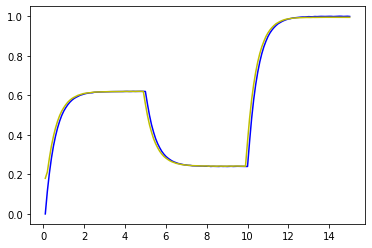

In [287]:
y_axis = values1 #network output
y = x_scaled # x noise
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

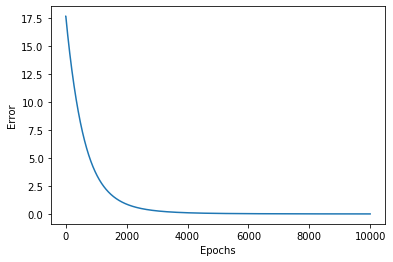

In [285]:
error_dataframe = {'Error':e1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

## 5 inputs

In [301]:
def train_weights5(array, lr, loops):
    weights3 = [rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)] #initialise weights
    weights3_1 = []             #append/save created weights
    itr_array = []
    sum_error_array = []
    for loop in range(loops):   #for each epoch in epochs
        net_array = []          #append network values
        error_array = []        #append error array
        sum_error = 0.0         #keep track of sum_error
        c = 0                   #counter variable
        future = 0
        w_adaptor = 0           #weight counter(used to iterate through each value in weights array)
        if loop < 1:            #if its less than one epoch, create new weights and append them to an array
            for a in array:     #for each input in array input
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3],weights3[4],weights3[5]]) #append weights created
                prediction = predict3(a,weights3)                                #grab weights created and predict
                if c == 0:
                    if(c < (len(array)-1)):
                        future = array[c+1][3]
                        Target = future
                elif c==1:
                    if(c < (len(array)-1)):
                        future = array[c+1][2]
                        Target = future
                elif c==2:
                    if(c < (len(array)-1)):
                        future = array[c+1][1]
                        Target = future
                elif c==3:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                else:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                delta = Target - prediction      #calculate error
                error = delta
                error_array.append(error)        #append error
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change = lr*error*Target           #calculate weight change for bias
                weights3[0] = weights3[0] + weights3_change#add calculated weight change to bias
                for i in range(len(a)):                         #for each input in input array
                    weights3[i + 1] = weights3[i +1] + weights3_change #obtain respective weight and add it with the weight change
                sum_error += error**2            #calculate sum_error
                c = c + 1                        #increment counter
            sum_error_array.append(sum_error)
            itr_array.append(loop)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
        else:                               #if epoch is > 1
            for a in array:                 #for each input in input array
                prediction = predict3(a,weights3_1[w_adaptor]) #calculate predictions using weights from previous epoch
                if c == 0:
                    if(c < (len(array)-1)):
                        future = array[c+1][3]
                        Target = future
                elif c==1:
                    if(c < (len(array)-1)):
                        future = array[c+1][2]
                        Target = future
                elif c==2:
                    if(c < (len(array)-1)):
                        future = array[c+1][1]
                        Target = future
                elif c==3:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                else:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                delta = Target - prediction #calculate error
                error = delta
                error_array.append(error)   #append error
                net_array.append(prediction)#append predictions
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change = lr*error*Target #calulate weight change for bias
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change #update bias weight in the saved weights array
                for i in range(len(a)):                 #for each input in input array
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change #update respective weights in weights array
                sum_error += error**2                   #calculate sum_error
                c = c + 1                               #increment counter
                w_adaptor = w_adaptor + 1               #increment weight counter
            itr_array.append(loop)
            sum_error_array.append(sum_error)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
    return net_array,sum_error_array,weights3_1,itr_array
            
def predict3(noise2,weights2):
    net_sum = 1
    net_sum +=net_sum*weights2[0] #obtain bias from weight array
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i] #multiply input by respective weight to obtain a summation
    activation2 = sigmoid_activation(net_sum)  #implement sigmoid function to summation obtained
    return activation2               #return activation and network sum

#normalize data and feed into tuple
def penta_converter(array):                   #converts input into a tuple so that we can pass 3 input weights per prediction
    penta_array = []
    c = 0 #counter
    while c < len(array):
        if c == 0:
            penta_array.append([0,0,0,0,array[c]])
        elif c == 1:
            penta_array.append([0,0,0,array[c],array[c-1]])
        elif c ==2:
            penta_array.append([0,0,array[c],array[c-1],array[c-2]])
        elif c ==3:
            penta_array.append([0,array[c],array[c-1],array[c-2],array[c-3]])
        else:
            penta_array.append([array[c],array[c-1],array[c-2],array[c-3],array[c-4]])
        c = c + 1                              #increment counter
    return penta_array



In [302]:
five_inputs = penta_converter(x_scaled)

In [307]:
values1,e1,w1,itrArray1 = train_weights5(five_inputs, 0.01,10000)

>epoch=0, lrate=0.010, error=0.078, , sum_error=20.276
>epoch=1, lrate=0.010, error=0.078, , sum_error=20.276
>epoch=2, lrate=0.010, error=0.078, , sum_error=20.232
>epoch=3, lrate=0.010, error=0.077, , sum_error=20.188
>epoch=4, lrate=0.010, error=0.077, , sum_error=20.144
>epoch=5, lrate=0.010, error=0.077, , sum_error=20.100
>epoch=6, lrate=0.010, error=0.077, , sum_error=20.056
>epoch=7, lrate=0.010, error=0.076, , sum_error=20.012
>epoch=8, lrate=0.010, error=0.076, , sum_error=19.968
>epoch=9, lrate=0.010, error=0.076, , sum_error=19.924
>epoch=10, lrate=0.010, error=0.076, , sum_error=19.880
>epoch=11, lrate=0.010, error=0.075, , sum_error=19.836
>epoch=12, lrate=0.010, error=0.075, , sum_error=19.792
>epoch=13, lrate=0.010, error=0.075, , sum_error=19.748
>epoch=14, lrate=0.010, error=0.074, , sum_error=19.704
>epoch=15, lrate=0.010, error=0.074, , sum_error=19.660
>epoch=16, lrate=0.010, error=0.074, , sum_error=19.616
>epoch=17, lrate=0.010, error=0.074, , sum_error=19.572
>e

>epoch=192, lrate=0.010, error=0.046, , sum_error=12.557
>epoch=193, lrate=0.010, error=0.045, , sum_error=12.523
>epoch=194, lrate=0.010, error=0.045, , sum_error=12.489
>epoch=195, lrate=0.010, error=0.045, , sum_error=12.455
>epoch=196, lrate=0.010, error=0.045, , sum_error=12.421
>epoch=197, lrate=0.010, error=0.045, , sum_error=12.388
>epoch=198, lrate=0.010, error=0.045, , sum_error=12.354
>epoch=199, lrate=0.010, error=0.045, , sum_error=12.321
>epoch=200, lrate=0.010, error=0.045, , sum_error=12.287
>epoch=201, lrate=0.010, error=0.045, , sum_error=12.254
>epoch=202, lrate=0.010, error=0.045, , sum_error=12.221
>epoch=203, lrate=0.010, error=0.044, , sum_error=12.187
>epoch=204, lrate=0.010, error=0.044, , sum_error=12.154
>epoch=205, lrate=0.010, error=0.044, , sum_error=12.121
>epoch=206, lrate=0.010, error=0.044, , sum_error=12.088
>epoch=207, lrate=0.010, error=0.044, , sum_error=12.056
>epoch=208, lrate=0.010, error=0.044, , sum_error=12.023
>epoch=209, lrate=0.010, error=

>epoch=374, lrate=0.010, error=0.032, , sum_error=7.693
>epoch=375, lrate=0.010, error=0.032, , sum_error=7.672
>epoch=376, lrate=0.010, error=0.032, , sum_error=7.652
>epoch=377, lrate=0.010, error=0.032, , sum_error=7.632
>epoch=378, lrate=0.010, error=0.032, , sum_error=7.612
>epoch=379, lrate=0.010, error=0.032, , sum_error=7.592
>epoch=380, lrate=0.010, error=0.032, , sum_error=7.572
>epoch=381, lrate=0.010, error=0.032, , sum_error=7.553
>epoch=382, lrate=0.010, error=0.032, , sum_error=7.533
>epoch=383, lrate=0.010, error=0.032, , sum_error=7.513
>epoch=384, lrate=0.010, error=0.032, , sum_error=7.493
>epoch=385, lrate=0.010, error=0.032, , sum_error=7.474
>epoch=386, lrate=0.010, error=0.032, , sum_error=7.454
>epoch=387, lrate=0.010, error=0.032, , sum_error=7.435
>epoch=388, lrate=0.010, error=0.032, , sum_error=7.416
>epoch=389, lrate=0.010, error=0.032, , sum_error=7.396
>epoch=390, lrate=0.010, error=0.031, , sum_error=7.377
>epoch=391, lrate=0.010, error=0.031, , sum_erro

>epoch=570, lrate=0.010, error=0.024, , sum_error=4.682
>epoch=571, lrate=0.010, error=0.024, , sum_error=4.670
>epoch=572, lrate=0.010, error=0.024, , sum_error=4.659
>epoch=573, lrate=0.010, error=0.024, , sum_error=4.647
>epoch=574, lrate=0.010, error=0.024, , sum_error=4.636
>epoch=575, lrate=0.010, error=0.024, , sum_error=4.625
>epoch=576, lrate=0.010, error=0.024, , sum_error=4.614
>epoch=577, lrate=0.010, error=0.024, , sum_error=4.602
>epoch=578, lrate=0.010, error=0.024, , sum_error=4.591
>epoch=579, lrate=0.010, error=0.024, , sum_error=4.580
>epoch=580, lrate=0.010, error=0.024, , sum_error=4.569
>epoch=581, lrate=0.010, error=0.024, , sum_error=4.558
>epoch=582, lrate=0.010, error=0.024, , sum_error=4.547
>epoch=583, lrate=0.010, error=0.024, , sum_error=4.536
>epoch=584, lrate=0.010, error=0.024, , sum_error=4.525
>epoch=585, lrate=0.010, error=0.024, , sum_error=4.514
>epoch=586, lrate=0.010, error=0.024, , sum_error=4.503
>epoch=587, lrate=0.010, error=0.024, , sum_erro

>epoch=750, lrate=0.010, error=0.020, , sum_error=3.056
>epoch=751, lrate=0.010, error=0.020, , sum_error=3.049
>epoch=752, lrate=0.010, error=0.020, , sum_error=3.042
>epoch=753, lrate=0.010, error=0.020, , sum_error=3.035
>epoch=754, lrate=0.010, error=0.020, , sum_error=3.028
>epoch=755, lrate=0.010, error=0.020, , sum_error=3.021
>epoch=756, lrate=0.010, error=0.020, , sum_error=3.014
>epoch=757, lrate=0.010, error=0.020, , sum_error=3.007
>epoch=758, lrate=0.010, error=0.020, , sum_error=3.000
>epoch=759, lrate=0.010, error=0.020, , sum_error=2.994
>epoch=760, lrate=0.010, error=0.020, , sum_error=2.987
>epoch=761, lrate=0.010, error=0.020, , sum_error=2.980
>epoch=762, lrate=0.010, error=0.020, , sum_error=2.973
>epoch=763, lrate=0.010, error=0.020, , sum_error=2.966
>epoch=764, lrate=0.010, error=0.020, , sum_error=2.960
>epoch=765, lrate=0.010, error=0.020, , sum_error=2.953
>epoch=766, lrate=0.010, error=0.020, , sum_error=2.946
>epoch=767, lrate=0.010, error=0.020, , sum_erro

>epoch=939, lrate=0.010, error=0.017, , sum_error=2.011
>epoch=940, lrate=0.010, error=0.017, , sum_error=2.006
>epoch=941, lrate=0.010, error=0.017, , sum_error=2.002
>epoch=942, lrate=0.010, error=0.017, , sum_error=1.998
>epoch=943, lrate=0.010, error=0.017, , sum_error=1.993
>epoch=944, lrate=0.010, error=0.017, , sum_error=1.989
>epoch=945, lrate=0.010, error=0.017, , sum_error=1.985
>epoch=946, lrate=0.010, error=0.017, , sum_error=1.981
>epoch=947, lrate=0.010, error=0.017, , sum_error=1.977
>epoch=948, lrate=0.010, error=0.017, , sum_error=1.972
>epoch=949, lrate=0.010, error=0.017, , sum_error=1.968
>epoch=950, lrate=0.010, error=0.017, , sum_error=1.964
>epoch=951, lrate=0.010, error=0.017, , sum_error=1.960
>epoch=952, lrate=0.010, error=0.017, , sum_error=1.956
>epoch=953, lrate=0.010, error=0.016, , sum_error=1.951
>epoch=954, lrate=0.010, error=0.016, , sum_error=1.947
>epoch=955, lrate=0.010, error=0.016, , sum_error=1.943
>epoch=956, lrate=0.010, error=0.016, , sum_erro

>epoch=1121, lrate=0.010, error=0.014, , sum_error=1.383
>epoch=1122, lrate=0.010, error=0.014, , sum_error=1.380
>epoch=1123, lrate=0.010, error=0.014, , sum_error=1.378
>epoch=1124, lrate=0.010, error=0.014, , sum_error=1.375
>epoch=1125, lrate=0.010, error=0.014, , sum_error=1.372
>epoch=1126, lrate=0.010, error=0.014, , sum_error=1.369
>epoch=1127, lrate=0.010, error=0.014, , sum_error=1.367
>epoch=1128, lrate=0.010, error=0.014, , sum_error=1.364
>epoch=1129, lrate=0.010, error=0.014, , sum_error=1.361
>epoch=1130, lrate=0.010, error=0.014, , sum_error=1.359
>epoch=1131, lrate=0.010, error=0.014, , sum_error=1.356
>epoch=1132, lrate=0.010, error=0.014, , sum_error=1.353
>epoch=1133, lrate=0.010, error=0.014, , sum_error=1.351
>epoch=1134, lrate=0.010, error=0.014, , sum_error=1.348
>epoch=1135, lrate=0.010, error=0.014, , sum_error=1.345
>epoch=1136, lrate=0.010, error=0.014, , sum_error=1.343
>epoch=1137, lrate=0.010, error=0.014, , sum_error=1.340
>epoch=1138, lrate=0.010, error

>epoch=1299, lrate=0.010, error=0.013, , sum_error=0.986
>epoch=1300, lrate=0.010, error=0.013, , sum_error=0.984
>epoch=1301, lrate=0.010, error=0.013, , sum_error=0.983
>epoch=1302, lrate=0.010, error=0.013, , sum_error=0.981
>epoch=1303, lrate=0.010, error=0.013, , sum_error=0.979
>epoch=1304, lrate=0.010, error=0.013, , sum_error=0.977
>epoch=1305, lrate=0.010, error=0.013, , sum_error=0.975
>epoch=1306, lrate=0.010, error=0.013, , sum_error=0.974
>epoch=1307, lrate=0.010, error=0.013, , sum_error=0.972
>epoch=1308, lrate=0.010, error=0.013, , sum_error=0.970
>epoch=1309, lrate=0.010, error=0.013, , sum_error=0.968
>epoch=1310, lrate=0.010, error=0.013, , sum_error=0.967
>epoch=1311, lrate=0.010, error=0.013, , sum_error=0.965
>epoch=1312, lrate=0.010, error=0.013, , sum_error=0.963
>epoch=1313, lrate=0.010, error=0.013, , sum_error=0.961
>epoch=1314, lrate=0.010, error=0.013, , sum_error=0.960
>epoch=1315, lrate=0.010, error=0.013, , sum_error=0.958
>epoch=1316, lrate=0.010, error

>epoch=1491, lrate=0.010, error=0.011, , sum_error=0.706
>epoch=1492, lrate=0.010, error=0.011, , sum_error=0.704
>epoch=1493, lrate=0.010, error=0.011, , sum_error=0.703
>epoch=1494, lrate=0.010, error=0.011, , sum_error=0.702
>epoch=1495, lrate=0.010, error=0.011, , sum_error=0.701
>epoch=1496, lrate=0.010, error=0.011, , sum_error=0.700
>epoch=1497, lrate=0.010, error=0.011, , sum_error=0.699
>epoch=1498, lrate=0.010, error=0.011, , sum_error=0.697
>epoch=1499, lrate=0.010, error=0.011, , sum_error=0.696
>epoch=1500, lrate=0.010, error=0.011, , sum_error=0.695
>epoch=1501, lrate=0.010, error=0.011, , sum_error=0.694
>epoch=1502, lrate=0.010, error=0.011, , sum_error=0.693
>epoch=1503, lrate=0.010, error=0.011, , sum_error=0.692
>epoch=1504, lrate=0.010, error=0.011, , sum_error=0.691
>epoch=1505, lrate=0.010, error=0.011, , sum_error=0.689
>epoch=1506, lrate=0.010, error=0.011, , sum_error=0.688
>epoch=1507, lrate=0.010, error=0.011, , sum_error=0.687
>epoch=1508, lrate=0.010, error

>epoch=1670, lrate=0.010, error=0.010, , sum_error=0.530
>epoch=1671, lrate=0.010, error=0.010, , sum_error=0.530
>epoch=1672, lrate=0.010, error=0.010, , sum_error=0.529
>epoch=1673, lrate=0.010, error=0.010, , sum_error=0.528
>epoch=1674, lrate=0.010, error=0.010, , sum_error=0.527
>epoch=1675, lrate=0.010, error=0.010, , sum_error=0.526
>epoch=1676, lrate=0.010, error=0.010, , sum_error=0.526
>epoch=1677, lrate=0.010, error=0.010, , sum_error=0.525
>epoch=1678, lrate=0.010, error=0.010, , sum_error=0.524
>epoch=1679, lrate=0.010, error=0.010, , sum_error=0.523
>epoch=1680, lrate=0.010, error=0.010, , sum_error=0.522
>epoch=1681, lrate=0.010, error=0.010, , sum_error=0.522
>epoch=1682, lrate=0.010, error=0.010, , sum_error=0.521
>epoch=1683, lrate=0.010, error=0.010, , sum_error=0.520
>epoch=1684, lrate=0.010, error=0.010, , sum_error=0.519
>epoch=1685, lrate=0.010, error=0.010, , sum_error=0.518
>epoch=1686, lrate=0.010, error=0.010, , sum_error=0.518
>epoch=1687, lrate=0.010, error

>epoch=1835, lrate=0.010, error=0.009, , sum_error=0.416
>epoch=1836, lrate=0.010, error=0.009, , sum_error=0.416
>epoch=1837, lrate=0.010, error=0.009, , sum_error=0.415
>epoch=1838, lrate=0.010, error=0.009, , sum_error=0.415
>epoch=1839, lrate=0.010, error=0.009, , sum_error=0.414
>epoch=1840, lrate=0.010, error=0.009, , sum_error=0.413
>epoch=1841, lrate=0.010, error=0.009, , sum_error=0.413
>epoch=1842, lrate=0.010, error=0.009, , sum_error=0.412
>epoch=1843, lrate=0.010, error=0.009, , sum_error=0.412
>epoch=1844, lrate=0.010, error=0.009, , sum_error=0.411
>epoch=1845, lrate=0.010, error=0.009, , sum_error=0.410
>epoch=1846, lrate=0.010, error=0.009, , sum_error=0.410
>epoch=1847, lrate=0.010, error=0.009, , sum_error=0.409
>epoch=1848, lrate=0.010, error=0.009, , sum_error=0.409
>epoch=1849, lrate=0.010, error=0.009, , sum_error=0.408
>epoch=1850, lrate=0.010, error=0.009, , sum_error=0.408
>epoch=1851, lrate=0.010, error=0.009, , sum_error=0.407
>epoch=1852, lrate=0.010, error

>epoch=1993, lrate=0.010, error=0.009, , sum_error=0.336
>epoch=1994, lrate=0.010, error=0.009, , sum_error=0.336
>epoch=1995, lrate=0.010, error=0.009, , sum_error=0.335
>epoch=1996, lrate=0.010, error=0.009, , sum_error=0.335
>epoch=1997, lrate=0.010, error=0.009, , sum_error=0.334
>epoch=1998, lrate=0.010, error=0.009, , sum_error=0.334
>epoch=1999, lrate=0.010, error=0.009, , sum_error=0.333
>epoch=2000, lrate=0.010, error=0.009, , sum_error=0.333
>epoch=2001, lrate=0.010, error=0.009, , sum_error=0.333
>epoch=2002, lrate=0.010, error=0.009, , sum_error=0.332
>epoch=2003, lrate=0.010, error=0.009, , sum_error=0.332
>epoch=2004, lrate=0.010, error=0.008, , sum_error=0.331
>epoch=2005, lrate=0.010, error=0.008, , sum_error=0.331
>epoch=2006, lrate=0.010, error=0.008, , sum_error=0.330
>epoch=2007, lrate=0.010, error=0.008, , sum_error=0.330
>epoch=2008, lrate=0.010, error=0.008, , sum_error=0.330
>epoch=2009, lrate=0.010, error=0.008, , sum_error=0.329
>epoch=2010, lrate=0.010, error

>epoch=2158, lrate=0.010, error=0.008, , sum_error=0.273
>epoch=2159, lrate=0.010, error=0.008, , sum_error=0.273
>epoch=2160, lrate=0.010, error=0.008, , sum_error=0.273
>epoch=2161, lrate=0.010, error=0.008, , sum_error=0.272
>epoch=2162, lrate=0.010, error=0.008, , sum_error=0.272
>epoch=2163, lrate=0.010, error=0.008, , sum_error=0.272
>epoch=2164, lrate=0.010, error=0.008, , sum_error=0.271
>epoch=2165, lrate=0.010, error=0.008, , sum_error=0.271
>epoch=2166, lrate=0.010, error=0.008, , sum_error=0.271
>epoch=2167, lrate=0.010, error=0.008, , sum_error=0.270
>epoch=2168, lrate=0.010, error=0.008, , sum_error=0.270
>epoch=2169, lrate=0.010, error=0.008, , sum_error=0.270
>epoch=2170, lrate=0.010, error=0.008, , sum_error=0.269
>epoch=2171, lrate=0.010, error=0.008, , sum_error=0.269
>epoch=2172, lrate=0.010, error=0.008, , sum_error=0.269
>epoch=2173, lrate=0.010, error=0.008, , sum_error=0.268
>epoch=2174, lrate=0.010, error=0.008, , sum_error=0.268
>epoch=2175, lrate=0.010, error

>epoch=2328, lrate=0.010, error=0.007, , sum_error=0.224
>epoch=2329, lrate=0.010, error=0.007, , sum_error=0.224
>epoch=2330, lrate=0.010, error=0.007, , sum_error=0.224
>epoch=2331, lrate=0.010, error=0.007, , sum_error=0.224
>epoch=2332, lrate=0.010, error=0.007, , sum_error=0.223
>epoch=2333, lrate=0.010, error=0.007, , sum_error=0.223
>epoch=2334, lrate=0.010, error=0.007, , sum_error=0.223
>epoch=2335, lrate=0.010, error=0.007, , sum_error=0.223
>epoch=2336, lrate=0.010, error=0.007, , sum_error=0.222
>epoch=2337, lrate=0.010, error=0.007, , sum_error=0.222
>epoch=2338, lrate=0.010, error=0.007, , sum_error=0.222
>epoch=2339, lrate=0.010, error=0.007, , sum_error=0.222
>epoch=2340, lrate=0.010, error=0.007, , sum_error=0.221
>epoch=2341, lrate=0.010, error=0.007, , sum_error=0.221
>epoch=2342, lrate=0.010, error=0.007, , sum_error=0.221
>epoch=2343, lrate=0.010, error=0.007, , sum_error=0.221
>epoch=2344, lrate=0.010, error=0.007, , sum_error=0.220
>epoch=2345, lrate=0.010, error

>epoch=2496, lrate=0.010, error=0.007, , sum_error=0.187
>epoch=2497, lrate=0.010, error=0.007, , sum_error=0.187
>epoch=2498, lrate=0.010, error=0.007, , sum_error=0.187
>epoch=2499, lrate=0.010, error=0.007, , sum_error=0.187
>epoch=2500, lrate=0.010, error=0.007, , sum_error=0.187
>epoch=2501, lrate=0.010, error=0.007, , sum_error=0.186
>epoch=2502, lrate=0.010, error=0.007, , sum_error=0.186
>epoch=2503, lrate=0.010, error=0.007, , sum_error=0.186
>epoch=2504, lrate=0.010, error=0.007, , sum_error=0.186
>epoch=2505, lrate=0.010, error=0.007, , sum_error=0.186
>epoch=2506, lrate=0.010, error=0.007, , sum_error=0.185
>epoch=2507, lrate=0.010, error=0.007, , sum_error=0.185
>epoch=2508, lrate=0.010, error=0.007, , sum_error=0.185
>epoch=2509, lrate=0.010, error=0.007, , sum_error=0.185
>epoch=2510, lrate=0.010, error=0.007, , sum_error=0.185
>epoch=2511, lrate=0.010, error=0.007, , sum_error=0.184
>epoch=2512, lrate=0.010, error=0.007, , sum_error=0.184
>epoch=2513, lrate=0.010, error

>epoch=2663, lrate=0.010, error=0.006, , sum_error=0.159
>epoch=2664, lrate=0.010, error=0.006, , sum_error=0.159
>epoch=2665, lrate=0.010, error=0.006, , sum_error=0.158
>epoch=2666, lrate=0.010, error=0.006, , sum_error=0.158
>epoch=2667, lrate=0.010, error=0.006, , sum_error=0.158
>epoch=2668, lrate=0.010, error=0.006, , sum_error=0.158
>epoch=2669, lrate=0.010, error=0.006, , sum_error=0.158
>epoch=2670, lrate=0.010, error=0.006, , sum_error=0.158
>epoch=2671, lrate=0.010, error=0.006, , sum_error=0.157
>epoch=2672, lrate=0.010, error=0.006, , sum_error=0.157
>epoch=2673, lrate=0.010, error=0.006, , sum_error=0.157
>epoch=2674, lrate=0.010, error=0.006, , sum_error=0.157
>epoch=2675, lrate=0.010, error=0.006, , sum_error=0.157
>epoch=2676, lrate=0.010, error=0.006, , sum_error=0.157
>epoch=2677, lrate=0.010, error=0.006, , sum_error=0.157
>epoch=2678, lrate=0.010, error=0.006, , sum_error=0.156
>epoch=2679, lrate=0.010, error=0.006, , sum_error=0.156
>epoch=2680, lrate=0.010, error

>epoch=2832, lrate=0.010, error=0.006, , sum_error=0.136
>epoch=2833, lrate=0.010, error=0.006, , sum_error=0.136
>epoch=2834, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2835, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2836, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2837, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2838, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2839, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2840, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2841, lrate=0.010, error=0.006, , sum_error=0.135
>epoch=2842, lrate=0.010, error=0.006, , sum_error=0.134
>epoch=2843, lrate=0.010, error=0.006, , sum_error=0.134
>epoch=2844, lrate=0.010, error=0.006, , sum_error=0.134
>epoch=2845, lrate=0.010, error=0.006, , sum_error=0.134
>epoch=2846, lrate=0.010, error=0.006, , sum_error=0.134
>epoch=2847, lrate=0.010, error=0.006, , sum_error=0.134
>epoch=2848, lrate=0.010, error=0.006, , sum_error=0.134
>epoch=2849, lrate=0.010, error

>epoch=2995, lrate=0.010, error=0.006, , sum_error=0.118
>epoch=2996, lrate=0.010, error=0.006, , sum_error=0.118
>epoch=2997, lrate=0.010, error=0.006, , sum_error=0.118
>epoch=2998, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=2999, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3000, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3001, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3002, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3003, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3004, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3005, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3006, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3007, lrate=0.010, error=0.006, , sum_error=0.117
>epoch=3008, lrate=0.010, error=0.006, , sum_error=0.116
>epoch=3009, lrate=0.010, error=0.006, , sum_error=0.116
>epoch=3010, lrate=0.010, error=0.006, , sum_error=0.116
>epoch=3011, lrate=0.010, error=0.006, , sum_error=0.116
>epoch=3012, lrate=0.010, error

>epoch=3158, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3159, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3160, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3161, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3162, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3163, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3164, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3165, lrate=0.010, error=0.005, , sum_error=0.103
>epoch=3166, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3167, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3168, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3169, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3170, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3171, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3172, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3173, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3174, lrate=0.010, error=0.005, , sum_error=0.102
>epoch=3175, lrate=0.010, error

>epoch=3326, lrate=0.010, error=0.005, , sum_error=0.091
>epoch=3327, lrate=0.010, error=0.005, , sum_error=0.091
>epoch=3328, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3329, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3330, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3331, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3332, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3333, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3334, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3335, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3336, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3337, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3338, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3339, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3340, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3341, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3342, lrate=0.010, error=0.005, , sum_error=0.090
>epoch=3343, lrate=0.010, error

>epoch=3491, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3492, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3493, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3494, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3495, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3496, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3497, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3498, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3499, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3500, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3501, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3502, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3503, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3504, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3505, lrate=0.010, error=0.005, , sum_error=0.080
>epoch=3506, lrate=0.010, error=0.005, , sum_error=0.079
>epoch=3507, lrate=0.010, error=0.005, , sum_error=0.079
>epoch=3508, lrate=0.010, error

>epoch=3654, lrate=0.010, error=0.005, , sum_error=0.072
>epoch=3655, lrate=0.010, error=0.005, , sum_error=0.072
>epoch=3656, lrate=0.010, error=0.005, , sum_error=0.072
>epoch=3657, lrate=0.010, error=0.005, , sum_error=0.072
>epoch=3658, lrate=0.010, error=0.005, , sum_error=0.072
>epoch=3659, lrate=0.010, error=0.005, , sum_error=0.072
>epoch=3660, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3661, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3662, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3663, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3664, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3665, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3666, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3667, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3668, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3669, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3670, lrate=0.010, error=0.005, , sum_error=0.071
>epoch=3671, lrate=0.010, error

>epoch=3814, lrate=0.010, error=0.004, , sum_error=0.065
>epoch=3815, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3816, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3817, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3818, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3819, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3820, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3821, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3822, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3823, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3824, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3825, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3826, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3827, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3828, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3829, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3830, lrate=0.010, error=0.004, , sum_error=0.064
>epoch=3831, lrate=0.010, error

>epoch=3979, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3980, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3981, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3982, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3983, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3984, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3985, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3986, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3987, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3988, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3989, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3990, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3991, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3992, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3993, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3994, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3995, lrate=0.010, error=0.004, , sum_error=0.058
>epoch=3996, lrate=0.010, error

>epoch=4149, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4150, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4151, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4152, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4153, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4154, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4155, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4156, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4157, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4158, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4159, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4160, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4161, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4162, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4163, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4164, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4165, lrate=0.010, error=0.004, , sum_error=0.052
>epoch=4166, lrate=0.010, error

>epoch=4319, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4320, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4321, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4322, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4323, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4324, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4325, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4326, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4327, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4328, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4329, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4330, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4331, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4332, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4333, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4334, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4335, lrate=0.010, error=0.004, , sum_error=0.047
>epoch=4336, lrate=0.010, error

>epoch=4482, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4483, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4484, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4485, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4486, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4487, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4488, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4489, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4490, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4491, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4492, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4493, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4494, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4495, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4496, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4497, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4498, lrate=0.010, error=0.004, , sum_error=0.043
>epoch=4499, lrate=0.010, error

>epoch=4642, lrate=0.010, error=0.004, , sum_error=0.040
>epoch=4643, lrate=0.010, error=0.004, , sum_error=0.040
>epoch=4644, lrate=0.010, error=0.004, , sum_error=0.040
>epoch=4645, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4646, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4647, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4648, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4649, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4650, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4651, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4652, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4653, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4654, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4655, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4656, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4657, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4658, lrate=0.010, error=0.004, , sum_error=0.039
>epoch=4659, lrate=0.010, error

>epoch=4805, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4806, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4807, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4808, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4809, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4810, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4811, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4812, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4813, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4814, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4815, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4816, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4817, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4818, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4819, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4820, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4821, lrate=0.010, error=0.003, , sum_error=0.036
>epoch=4822, lrate=0.010, error

>epoch=4991, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4992, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4993, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4994, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4995, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4996, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4997, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4998, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=4999, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5000, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5001, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5002, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5003, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5004, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5005, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5006, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5007, lrate=0.010, error=0.003, , sum_error=0.033
>epoch=5008, lrate=0.010, error

>epoch=5178, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5179, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5180, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5181, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5182, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5183, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5184, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5185, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5186, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5187, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5188, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5189, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5190, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5191, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5192, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5193, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5194, lrate=0.010, error=0.003, , sum_error=0.030
>epoch=5195, lrate=0.010, error

>epoch=5372, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5373, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5374, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5375, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5376, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5377, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5378, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5379, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5380, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5381, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5382, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5383, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5384, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5385, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5386, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5387, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5388, lrate=0.010, error=0.003, , sum_error=0.027
>epoch=5389, lrate=0.010, error

>epoch=5572, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5573, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5574, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5575, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5576, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5577, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5578, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5579, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5580, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5581, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5582, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5583, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5584, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5585, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5586, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5587, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5588, lrate=0.010, error=0.003, , sum_error=0.025
>epoch=5589, lrate=0.010, error

>epoch=5764, lrate=0.010, error=0.003, , sum_error=0.023
>epoch=5765, lrate=0.010, error=0.003, , sum_error=0.023
>epoch=5766, lrate=0.010, error=0.003, , sum_error=0.023
>epoch=5767, lrate=0.010, error=0.003, , sum_error=0.023
>epoch=5768, lrate=0.010, error=0.003, , sum_error=0.023
>epoch=5769, lrate=0.010, error=0.003, , sum_error=0.023
>epoch=5770, lrate=0.010, error=0.003, , sum_error=0.023
>epoch=5771, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5772, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5773, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5774, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5775, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5776, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5777, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5778, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5779, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5780, lrate=0.010, error=0.003, , sum_error=0.022
>epoch=5781, lrate=0.010, error

>epoch=5953, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5954, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5955, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5956, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5957, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5958, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5959, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5960, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5961, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5962, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5963, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5964, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5965, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5966, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5967, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5968, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5969, lrate=0.010, error=0.003, , sum_error=0.021
>epoch=5970, lrate=0.010, error

>epoch=6133, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6134, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6135, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6136, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6137, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6138, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6139, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6140, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6141, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6142, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6143, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6144, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6145, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6146, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6147, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6148, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6149, lrate=0.010, error=0.003, , sum_error=0.019
>epoch=6150, lrate=0.010, error

>epoch=6316, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6317, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6318, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6319, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6320, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6321, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6322, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6323, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6324, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6325, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6326, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6327, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6328, lrate=0.010, error=0.003, , sum_error=0.018
>epoch=6329, lrate=0.010, error=0.003, , sum_error=0.017
>epoch=6330, lrate=0.010, error=0.003, , sum_error=0.017
>epoch=6331, lrate=0.010, error=0.003, , sum_error=0.017
>epoch=6332, lrate=0.010, error=0.003, , sum_error=0.017
>epoch=6333, lrate=0.010, error

>epoch=6507, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6508, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6509, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6510, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6511, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6512, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6513, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6514, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6515, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6516, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6517, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6518, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6519, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6520, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6521, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6522, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6523, lrate=0.010, error=0.002, , sum_error=0.016
>epoch=6524, lrate=0.010, error

>epoch=6687, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6688, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6689, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6690, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6691, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6692, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6693, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6694, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6695, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6696, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6697, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6698, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6699, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6700, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6701, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6702, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6703, lrate=0.010, error=0.002, , sum_error=0.015
>epoch=6704, lrate=0.010, error

>epoch=6880, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6881, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6882, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6883, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6884, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6885, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6886, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6887, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6888, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6889, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6890, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6891, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6892, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6893, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6894, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6895, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6896, lrate=0.010, error=0.002, , sum_error=0.014
>epoch=6897, lrate=0.010, error

>epoch=7067, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7068, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7069, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7070, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7071, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7072, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7073, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7074, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7075, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7076, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7077, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7078, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7079, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7080, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7081, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7082, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7083, lrate=0.010, error=0.002, , sum_error=0.013
>epoch=7084, lrate=0.010, error

>epoch=7260, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7261, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7262, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7263, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7264, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7265, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7266, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7267, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7268, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7269, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7270, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7271, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7272, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7273, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7274, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7275, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7276, lrate=0.010, error=0.002, , sum_error=0.012
>epoch=7277, lrate=0.010, error

>epoch=7445, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7446, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7447, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7448, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7449, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7450, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7451, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7452, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7453, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7454, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7455, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7456, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7457, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7458, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7459, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7460, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7461, lrate=0.010, error=0.002, , sum_error=0.011
>epoch=7462, lrate=0.010, error

>epoch=7644, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7645, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7646, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7647, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7648, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7649, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7650, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7651, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7652, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7653, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7654, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7655, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7656, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7657, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7658, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7659, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7660, lrate=0.010, error=0.002, , sum_error=0.010
>epoch=7661, lrate=0.010, error

>epoch=7834, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7835, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7836, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7837, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7838, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7839, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7840, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7841, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7842, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7843, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7844, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7845, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7846, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7847, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7848, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7849, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7850, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=7851, lrate=0.010, error

>epoch=8020, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8021, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8022, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8023, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8024, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8025, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8026, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8027, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8028, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8029, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8030, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8031, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8032, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8033, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8034, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8035, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8036, lrate=0.010, error=0.002, , sum_error=0.009
>epoch=8037, lrate=0.010, error

>epoch=8215, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8216, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8217, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8218, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8219, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8220, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8221, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8222, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8223, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8224, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8225, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8226, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8227, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8228, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8229, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8230, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8231, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8232, lrate=0.010, error

>epoch=8409, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8410, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8411, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8412, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8413, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8414, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8415, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8416, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8417, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8418, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8419, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8420, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8421, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8422, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8423, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8424, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8425, lrate=0.010, error=0.002, , sum_error=0.008
>epoch=8426, lrate=0.010, error

>epoch=8594, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8595, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8596, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8597, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8598, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8599, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8600, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8601, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8602, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8603, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8604, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8605, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8606, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8607, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8608, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8609, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8610, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8611, lrate=0.010, error

>epoch=8789, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8790, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8791, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8792, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8793, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8794, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8795, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8796, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8797, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8798, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8799, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8800, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8801, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8802, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8803, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8804, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8805, lrate=0.010, error=0.002, , sum_error=0.007
>epoch=8806, lrate=0.010, error

>epoch=8971, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8972, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8973, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8974, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8975, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8976, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8977, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8978, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8979, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8980, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8981, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8982, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8983, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8984, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8985, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8986, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8987, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=8988, lrate=0.010, error

>epoch=9162, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9163, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9164, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9165, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9166, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9167, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9168, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9169, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9170, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9171, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9172, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9173, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9174, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9175, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9176, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9177, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9178, lrate=0.010, error=0.002, , sum_error=0.006
>epoch=9179, lrate=0.010, error

>epoch=9353, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9354, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9355, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9356, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9357, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9358, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9359, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9360, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9361, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9362, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9363, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9364, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9365, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9366, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9367, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9368, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9369, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9370, lrate=0.010, error

>epoch=9529, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9530, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9531, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9532, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9533, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9534, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9535, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9536, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9537, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9538, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9539, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9540, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9541, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9542, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9543, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9544, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9545, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9546, lrate=0.010, error

>epoch=9703, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9704, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9705, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9706, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9707, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9708, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9709, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9710, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9711, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9712, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9713, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9714, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9715, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9716, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9717, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9718, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9719, lrate=0.010, error=0.002, , sum_error=0.005
>epoch=9720, lrate=0.010, error

>epoch=9874, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9875, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9876, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9877, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9878, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9879, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9880, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9881, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9882, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9883, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9884, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9885, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9886, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9887, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9888, lrate=0.010, error=0.001, , sum_error=0.004
>epoch=9889, lrate=0.010, error=0.001, , sum_error=0.004
>epoch=9890, lrate=0.010, error=0.001, , sum_error=0.004
>epoch=9891, lrate=0.010, error

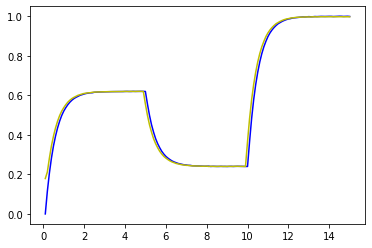

In [308]:
y_axis = values1 #network output
y = x_scaled # x noise
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

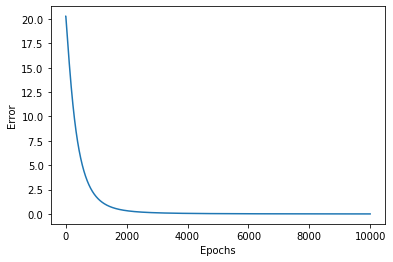

In [309]:
error_dataframe = {'Error':e1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

## 8 inputs

In [313]:
def train_weights8(array, lr, loops):
    weights3 = [rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)] #initialise weights
    weights3_1 = []             #append/save created weights
    itr_array = []
    sum_error_array = []
    for loop in range(loops):   #for each epoch in epochs
        net_array = []          #append network values
        error_array = []        #append error array
        sum_error = 0.0         #keep track of sum_error
        c = 0                   #counter variable
        w_adaptor = 0           #weight counter(used to iterate through each value in weights array)
        future = 0
        if loop < 1:            #if its less than one epoch, create new weights and append them to an array
            for a in array:     #for each input in array input
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3],weights3[4],weights3[5],weights3[6],weights3[7],weights3[8]]) #append weights created
                prediction = predict3(a,weights3)                                #grab weights created and predict
                if c == 0:
                    if(c < (len(array)-1)):
                        future = array[c+1][6]
                        Target = future
                elif c==1:
                    if(c < (len(array)-1)):
                        future = array[c+1][5]
                        Target = future
                elif c==2:
                    if(c < (len(array)-1)):
                        future = array[c+1][4]
                        Target = future
                elif c==3:
                    if(c < (len(array)-1)):
                        future = array[c+1][3]
                        Target = future
                elif c==4:
                    if(c < (len(array)-1)):
                        future = array[c+1][2]
                        Target = future
                elif c==5:
                    if(c < (len(array)-1)):
                        future = array[c+1][1]
                        Target = future
                elif c==6:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                else:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                #given a certain position a, predict a+1
                delta = Target - prediction      #calculate error
                #print("prediction: ",prediction," Target:", Target,"Delta: ", delta)
                error = delta
                error_array.append(error)        #append error
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change = lr*error*Target       #calculate weight change for bias(Target is input)
                #print("weight change",weights3_change_bias)
                weights3[0] = weights3[0] + weights3_change#add calculated weight change to bias
                for i in range(len(a)):                         #for each input in input array
                    weights3[i + 1] = weights3[i +1] + weights3_change #obtain respective weight and add it with the weight change
                sum_error += error**2            #calculate sum_error
                c = c + 1                        #increment counter
            sum_error_array.append(sum_error)
            itr_array.append(loop)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
        else:                               #if epoch is > 1
            for a in array:                 #for each input in input array
                prediction = predict3(a,weights3_1[w_adaptor]) #calculate predictions using weights from previous epoch
                if c == 0:
                    if(c < (len(array)-1)):
                        future = array[c+1][6]
                        Target = future
                elif c==1:
                    if(c < (len(array)-1)):
                        future = array[c+1][5]
                        Target = future
                elif c==2:
                    if(c < (len(array)-1)):
                        future = array[c+1][4]
                        Target = future
                elif c==3:
                    if(c < (len(array)-1)):
                        future = array[c+1][3]
                        Target = future
                elif c==4:
                    if(c < (len(array)-1)):
                        future = array[c+1][2]
                        Target = future
                elif c==5:
                    if(c < (len(array)-1)):
                        future = array[c+1][1]
                        Target = future
                elif c==6:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                else:
                    if(c < (len(array)-1)):
                        future = array[c+1][0]
                        Target = future
                delta = Target - prediction #calculate error
                error = delta
                #print("prediction: ",prediction," Target:", Target,"Delta: ", delta)
                error_array.append(error)   #append error
                net_array.append(prediction)#append predictions
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change = lr*error*Target #calulate weight change for bias
                #print("weight change",weights3_change_bias)
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change #update bias weight in the saved weights array
                for i in range(len(a)):                 #for each input in input array
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change #update respective weights in weights array
                sum_error += error**2                   #calculate sum_error
                c = c + 1                               #increment counter
                w_adaptor = w_adaptor + 1               #increment weight counter
            itr_array.append(loop)
            sum_error_array.append(sum_error)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
    return net_array,sum_error_array,weights3_1,itr_array
            
def predict3(noise2,weights2):
    net_sum = 1 #bias
    net_sum +=net_sum*weights2[0] #obtain bias from weight array
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i] #multiply input by respective weight to obtain a summation
    activation2 = sigmoid_activation(net_sum)  #implement sigmoid function to summation obtained
    return activation2               #return activation and network sum

#normalize data and feed into tuple
def octa_converter(array):                   #converts input into a tuple so that we can pass 3 input weights per prediction
    octa_array = []
    c = 0 #counter
    while c < len(array):
        if c == 0:
            octa_array.append([0,0,0,0,0,0,0,array[c]])
        elif c == 1:
            octa_array.append([0,0,0,0,0,0,array[c],array[c-1]])
        elif c ==2:
            octa_array.append([0,0,0,0,0,array[c],array[c-1],array[c-2]])
        elif c ==3:
            octa_array.append([0,0,0,0,array[c],array[c-1],array[c-2],array[c-3]])
        elif c ==4:
            octa_array.append([0,0,0,array[c],array[c-1],array[c-2],array[c-3],array[c-4]])
        elif c ==5:
            octa_array.append([0,0,array[c],array[c-1],array[c-2],array[c-3],array[c-4],array[c-5]])
        elif c ==6:
            octa_array.append([0,array[c],array[c-1],array[c-2],array[c-3],array[c-4],array[c-5],array[c-6]])
        else:
            octa_array.append([array[c],array[c-1],array[c-2],array[c-3],array[c-4],array[c-5],array[c-6],array[c-7]])
        c = c + 1                              #increment counter
    return octa_array


In [316]:
eight_inputs = octa_converter(x_scaled)
values1,e1,w1,itrArray1 = train_weights8(eight_inputs, 0.01,10000)

>epoch=0, lrate=0.010, error=0.028, , sum_error=26.913
>epoch=1, lrate=0.010, error=0.028, , sum_error=26.913
>epoch=2, lrate=0.010, error=0.028, , sum_error=26.867
>epoch=3, lrate=0.010, error=0.028, , sum_error=26.821
>epoch=4, lrate=0.010, error=0.028, , sum_error=26.775
>epoch=5, lrate=0.010, error=0.028, , sum_error=26.728
>epoch=6, lrate=0.010, error=0.027, , sum_error=26.682
>epoch=7, lrate=0.010, error=0.027, , sum_error=26.635
>epoch=8, lrate=0.010, error=0.027, , sum_error=26.588
>epoch=9, lrate=0.010, error=0.027, , sum_error=26.541
>epoch=10, lrate=0.010, error=0.027, , sum_error=26.493
>epoch=11, lrate=0.010, error=0.027, , sum_error=26.446
>epoch=12, lrate=0.010, error=0.027, , sum_error=26.398
>epoch=13, lrate=0.010, error=0.027, , sum_error=26.350
>epoch=14, lrate=0.010, error=0.027, , sum_error=26.302
>epoch=15, lrate=0.010, error=0.027, , sum_error=26.254
>epoch=16, lrate=0.010, error=0.027, , sum_error=26.206
>epoch=17, lrate=0.010, error=0.027, , sum_error=26.157
>e

>epoch=180, lrate=0.010, error=0.020, , sum_error=16.808
>epoch=181, lrate=0.010, error=0.020, , sum_error=16.751
>epoch=182, lrate=0.010, error=0.020, , sum_error=16.693
>epoch=183, lrate=0.010, error=0.020, , sum_error=16.636
>epoch=184, lrate=0.010, error=0.020, , sum_error=16.578
>epoch=185, lrate=0.010, error=0.020, , sum_error=16.521
>epoch=186, lrate=0.010, error=0.020, , sum_error=16.464
>epoch=187, lrate=0.010, error=0.020, , sum_error=16.407
>epoch=188, lrate=0.010, error=0.019, , sum_error=16.350
>epoch=189, lrate=0.010, error=0.019, , sum_error=16.294
>epoch=190, lrate=0.010, error=0.019, , sum_error=16.237
>epoch=191, lrate=0.010, error=0.019, , sum_error=16.181
>epoch=192, lrate=0.010, error=0.019, , sum_error=16.124
>epoch=193, lrate=0.010, error=0.019, , sum_error=16.068
>epoch=194, lrate=0.010, error=0.019, , sum_error=16.012
>epoch=195, lrate=0.010, error=0.019, , sum_error=15.956
>epoch=196, lrate=0.010, error=0.019, , sum_error=15.901
>epoch=197, lrate=0.010, error=

>epoch=346, lrate=0.010, error=0.015, , sum_error=9.341
>epoch=347, lrate=0.010, error=0.015, , sum_error=9.309
>epoch=348, lrate=0.010, error=0.015, , sum_error=9.277
>epoch=349, lrate=0.010, error=0.015, , sum_error=9.245
>epoch=350, lrate=0.010, error=0.015, , sum_error=9.213
>epoch=351, lrate=0.010, error=0.015, , sum_error=9.182
>epoch=352, lrate=0.010, error=0.015, , sum_error=9.150
>epoch=353, lrate=0.010, error=0.015, , sum_error=9.118
>epoch=354, lrate=0.010, error=0.015, , sum_error=9.087
>epoch=355, lrate=0.010, error=0.015, , sum_error=9.056
>epoch=356, lrate=0.010, error=0.015, , sum_error=9.025
>epoch=357, lrate=0.010, error=0.015, , sum_error=8.994
>epoch=358, lrate=0.010, error=0.015, , sum_error=8.963
>epoch=359, lrate=0.010, error=0.015, , sum_error=8.932
>epoch=360, lrate=0.010, error=0.015, , sum_error=8.902
>epoch=361, lrate=0.010, error=0.015, , sum_error=8.871
>epoch=362, lrate=0.010, error=0.015, , sum_error=8.841
>epoch=363, lrate=0.010, error=0.015, , sum_erro

>epoch=517, lrate=0.010, error=0.013, , sum_error=5.308
>epoch=518, lrate=0.010, error=0.013, , sum_error=5.291
>epoch=519, lrate=0.010, error=0.013, , sum_error=5.274
>epoch=520, lrate=0.010, error=0.013, , sum_error=5.257
>epoch=521, lrate=0.010, error=0.013, , sum_error=5.241
>epoch=522, lrate=0.010, error=0.013, , sum_error=5.224
>epoch=523, lrate=0.010, error=0.013, , sum_error=5.208
>epoch=524, lrate=0.010, error=0.013, , sum_error=5.191
>epoch=525, lrate=0.010, error=0.013, , sum_error=5.175
>epoch=526, lrate=0.010, error=0.013, , sum_error=5.159
>epoch=527, lrate=0.010, error=0.013, , sum_error=5.142
>epoch=528, lrate=0.010, error=0.012, , sum_error=5.126
>epoch=529, lrate=0.010, error=0.012, , sum_error=5.110
>epoch=530, lrate=0.010, error=0.012, , sum_error=5.094
>epoch=531, lrate=0.010, error=0.012, , sum_error=5.078
>epoch=532, lrate=0.010, error=0.012, , sum_error=5.062
>epoch=533, lrate=0.010, error=0.012, , sum_error=5.046
>epoch=534, lrate=0.010, error=0.012, , sum_erro

>epoch=692, lrate=0.010, error=0.011, , sum_error=3.118
>epoch=693, lrate=0.010, error=0.011, , sum_error=3.109
>epoch=694, lrate=0.010, error=0.011, , sum_error=3.100
>epoch=695, lrate=0.010, error=0.011, , sum_error=3.091
>epoch=696, lrate=0.010, error=0.011, , sum_error=3.082
>epoch=697, lrate=0.010, error=0.011, , sum_error=3.074
>epoch=698, lrate=0.010, error=0.011, , sum_error=3.065
>epoch=699, lrate=0.010, error=0.011, , sum_error=3.056
>epoch=700, lrate=0.010, error=0.011, , sum_error=3.047
>epoch=701, lrate=0.010, error=0.011, , sum_error=3.038
>epoch=702, lrate=0.010, error=0.011, , sum_error=3.030
>epoch=703, lrate=0.010, error=0.011, , sum_error=3.021
>epoch=704, lrate=0.010, error=0.010, , sum_error=3.012
>epoch=705, lrate=0.010, error=0.010, , sum_error=3.003
>epoch=706, lrate=0.010, error=0.010, , sum_error=2.995
>epoch=707, lrate=0.010, error=0.010, , sum_error=2.986
>epoch=708, lrate=0.010, error=0.010, , sum_error=2.978
>epoch=709, lrate=0.010, error=0.010, , sum_erro

>epoch=866, lrate=0.010, error=0.009, , sum_error=1.936
>epoch=867, lrate=0.010, error=0.009, , sum_error=1.931
>epoch=868, lrate=0.010, error=0.009, , sum_error=1.926
>epoch=869, lrate=0.010, error=0.009, , sum_error=1.921
>epoch=870, lrate=0.010, error=0.009, , sum_error=1.916
>epoch=871, lrate=0.010, error=0.009, , sum_error=1.911
>epoch=872, lrate=0.010, error=0.009, , sum_error=1.906
>epoch=873, lrate=0.010, error=0.009, , sum_error=1.901
>epoch=874, lrate=0.010, error=0.009, , sum_error=1.896
>epoch=875, lrate=0.010, error=0.009, , sum_error=1.891
>epoch=876, lrate=0.010, error=0.009, , sum_error=1.886
>epoch=877, lrate=0.010, error=0.009, , sum_error=1.882
>epoch=878, lrate=0.010, error=0.009, , sum_error=1.877
>epoch=879, lrate=0.010, error=0.009, , sum_error=1.872
>epoch=880, lrate=0.010, error=0.009, , sum_error=1.867
>epoch=881, lrate=0.010, error=0.009, , sum_error=1.863
>epoch=882, lrate=0.010, error=0.009, , sum_error=1.858
>epoch=883, lrate=0.010, error=0.009, , sum_erro

>epoch=1036, lrate=0.010, error=0.008, , sum_error=1.284
>epoch=1037, lrate=0.010, error=0.008, , sum_error=1.281
>epoch=1038, lrate=0.010, error=0.008, , sum_error=1.278
>epoch=1039, lrate=0.010, error=0.008, , sum_error=1.275
>epoch=1040, lrate=0.010, error=0.008, , sum_error=1.272
>epoch=1041, lrate=0.010, error=0.008, , sum_error=1.269
>epoch=1042, lrate=0.010, error=0.008, , sum_error=1.267
>epoch=1043, lrate=0.010, error=0.008, , sum_error=1.264
>epoch=1044, lrate=0.010, error=0.008, , sum_error=1.261
>epoch=1045, lrate=0.010, error=0.008, , sum_error=1.258
>epoch=1046, lrate=0.010, error=0.008, , sum_error=1.255
>epoch=1047, lrate=0.010, error=0.008, , sum_error=1.253
>epoch=1048, lrate=0.010, error=0.008, , sum_error=1.250
>epoch=1049, lrate=0.010, error=0.008, , sum_error=1.247
>epoch=1050, lrate=0.010, error=0.008, , sum_error=1.244
>epoch=1051, lrate=0.010, error=0.008, , sum_error=1.241
>epoch=1052, lrate=0.010, error=0.008, , sum_error=1.239
>epoch=1053, lrate=0.010, error

>epoch=1187, lrate=0.010, error=0.007, , sum_error=0.933
>epoch=1188, lrate=0.010, error=0.007, , sum_error=0.931
>epoch=1189, lrate=0.010, error=0.007, , sum_error=0.929
>epoch=1190, lrate=0.010, error=0.007, , sum_error=0.927
>epoch=1191, lrate=0.010, error=0.007, , sum_error=0.926
>epoch=1192, lrate=0.010, error=0.007, , sum_error=0.924
>epoch=1193, lrate=0.010, error=0.007, , sum_error=0.922
>epoch=1194, lrate=0.010, error=0.007, , sum_error=0.920
>epoch=1195, lrate=0.010, error=0.007, , sum_error=0.918
>epoch=1196, lrate=0.010, error=0.007, , sum_error=0.916
>epoch=1197, lrate=0.010, error=0.007, , sum_error=0.915
>epoch=1198, lrate=0.010, error=0.007, , sum_error=0.913
>epoch=1199, lrate=0.010, error=0.007, , sum_error=0.911
>epoch=1200, lrate=0.010, error=0.007, , sum_error=0.909
>epoch=1201, lrate=0.010, error=0.007, , sum_error=0.907
>epoch=1202, lrate=0.010, error=0.007, , sum_error=0.906
>epoch=1203, lrate=0.010, error=0.007, , sum_error=0.904
>epoch=1204, lrate=0.010, error

>epoch=1357, lrate=0.010, error=0.006, , sum_error=0.682
>epoch=1358, lrate=0.010, error=0.006, , sum_error=0.681
>epoch=1359, lrate=0.010, error=0.006, , sum_error=0.680
>epoch=1360, lrate=0.010, error=0.006, , sum_error=0.679
>epoch=1361, lrate=0.010, error=0.006, , sum_error=0.678
>epoch=1362, lrate=0.010, error=0.006, , sum_error=0.676
>epoch=1363, lrate=0.010, error=0.006, , sum_error=0.675
>epoch=1364, lrate=0.010, error=0.006, , sum_error=0.674
>epoch=1365, lrate=0.010, error=0.006, , sum_error=0.673
>epoch=1366, lrate=0.010, error=0.006, , sum_error=0.672
>epoch=1367, lrate=0.010, error=0.006, , sum_error=0.671
>epoch=1368, lrate=0.010, error=0.006, , sum_error=0.670
>epoch=1369, lrate=0.010, error=0.006, , sum_error=0.668
>epoch=1370, lrate=0.010, error=0.006, , sum_error=0.667
>epoch=1371, lrate=0.010, error=0.006, , sum_error=0.666
>epoch=1372, lrate=0.010, error=0.006, , sum_error=0.665
>epoch=1373, lrate=0.010, error=0.006, , sum_error=0.664
>epoch=1374, lrate=0.010, error

>epoch=1504, lrate=0.010, error=0.006, , sum_error=0.539
>epoch=1505, lrate=0.010, error=0.006, , sum_error=0.538
>epoch=1506, lrate=0.010, error=0.006, , sum_error=0.537
>epoch=1507, lrate=0.010, error=0.006, , sum_error=0.537
>epoch=1508, lrate=0.010, error=0.006, , sum_error=0.536
>epoch=1509, lrate=0.010, error=0.006, , sum_error=0.535
>epoch=1510, lrate=0.010, error=0.006, , sum_error=0.534
>epoch=1511, lrate=0.010, error=0.006, , sum_error=0.533
>epoch=1512, lrate=0.010, error=0.006, , sum_error=0.532
>epoch=1513, lrate=0.010, error=0.006, , sum_error=0.532
>epoch=1514, lrate=0.010, error=0.006, , sum_error=0.531
>epoch=1515, lrate=0.010, error=0.006, , sum_error=0.530
>epoch=1516, lrate=0.010, error=0.006, , sum_error=0.529
>epoch=1517, lrate=0.010, error=0.006, , sum_error=0.529
>epoch=1518, lrate=0.010, error=0.006, , sum_error=0.528
>epoch=1519, lrate=0.010, error=0.006, , sum_error=0.527
>epoch=1520, lrate=0.010, error=0.006, , sum_error=0.526
>epoch=1521, lrate=0.010, error

>epoch=1670, lrate=0.010, error=0.005, , sum_error=0.427
>epoch=1671, lrate=0.010, error=0.005, , sum_error=0.426
>epoch=1672, lrate=0.010, error=0.005, , sum_error=0.426
>epoch=1673, lrate=0.010, error=0.005, , sum_error=0.425
>epoch=1674, lrate=0.010, error=0.005, , sum_error=0.424
>epoch=1675, lrate=0.010, error=0.005, , sum_error=0.424
>epoch=1676, lrate=0.010, error=0.005, , sum_error=0.423
>epoch=1677, lrate=0.010, error=0.005, , sum_error=0.423
>epoch=1678, lrate=0.010, error=0.005, , sum_error=0.422
>epoch=1679, lrate=0.010, error=0.005, , sum_error=0.422
>epoch=1680, lrate=0.010, error=0.005, , sum_error=0.421
>epoch=1681, lrate=0.010, error=0.005, , sum_error=0.421
>epoch=1682, lrate=0.010, error=0.005, , sum_error=0.420
>epoch=1683, lrate=0.010, error=0.005, , sum_error=0.419
>epoch=1684, lrate=0.010, error=0.005, , sum_error=0.419
>epoch=1685, lrate=0.010, error=0.005, , sum_error=0.418
>epoch=1686, lrate=0.010, error=0.005, , sum_error=0.418
>epoch=1687, lrate=0.010, error

>epoch=1831, lrate=0.010, error=0.005, , sum_error=0.350
>epoch=1832, lrate=0.010, error=0.005, , sum_error=0.349
>epoch=1833, lrate=0.010, error=0.005, , sum_error=0.349
>epoch=1834, lrate=0.010, error=0.005, , sum_error=0.348
>epoch=1835, lrate=0.010, error=0.005, , sum_error=0.348
>epoch=1836, lrate=0.010, error=0.005, , sum_error=0.348
>epoch=1837, lrate=0.010, error=0.005, , sum_error=0.347
>epoch=1838, lrate=0.010, error=0.005, , sum_error=0.347
>epoch=1839, lrate=0.010, error=0.005, , sum_error=0.346
>epoch=1840, lrate=0.010, error=0.005, , sum_error=0.346
>epoch=1841, lrate=0.010, error=0.005, , sum_error=0.346
>epoch=1842, lrate=0.010, error=0.005, , sum_error=0.345
>epoch=1843, lrate=0.010, error=0.005, , sum_error=0.345
>epoch=1844, lrate=0.010, error=0.005, , sum_error=0.344
>epoch=1845, lrate=0.010, error=0.005, , sum_error=0.344
>epoch=1846, lrate=0.010, error=0.005, , sum_error=0.344
>epoch=1847, lrate=0.010, error=0.005, , sum_error=0.343
>epoch=1848, lrate=0.010, error

>epoch=1999, lrate=0.010, error=0.005, , sum_error=0.291
>epoch=2000, lrate=0.010, error=0.005, , sum_error=0.290
>epoch=2001, lrate=0.010, error=0.005, , sum_error=0.290
>epoch=2002, lrate=0.010, error=0.005, , sum_error=0.290
>epoch=2003, lrate=0.010, error=0.005, , sum_error=0.289
>epoch=2004, lrate=0.010, error=0.005, , sum_error=0.289
>epoch=2005, lrate=0.010, error=0.005, , sum_error=0.289
>epoch=2006, lrate=0.010, error=0.005, , sum_error=0.288
>epoch=2007, lrate=0.010, error=0.005, , sum_error=0.288
>epoch=2008, lrate=0.010, error=0.005, , sum_error=0.288
>epoch=2009, lrate=0.010, error=0.005, , sum_error=0.288
>epoch=2010, lrate=0.010, error=0.005, , sum_error=0.287
>epoch=2011, lrate=0.010, error=0.005, , sum_error=0.287
>epoch=2012, lrate=0.010, error=0.005, , sum_error=0.287
>epoch=2013, lrate=0.010, error=0.005, , sum_error=0.286
>epoch=2014, lrate=0.010, error=0.005, , sum_error=0.286
>epoch=2015, lrate=0.010, error=0.005, , sum_error=0.286
>epoch=2016, lrate=0.010, error

>epoch=2167, lrate=0.010, error=0.004, , sum_error=0.246
>epoch=2168, lrate=0.010, error=0.004, , sum_error=0.246
>epoch=2169, lrate=0.010, error=0.004, , sum_error=0.246
>epoch=2170, lrate=0.010, error=0.004, , sum_error=0.245
>epoch=2171, lrate=0.010, error=0.004, , sum_error=0.245
>epoch=2172, lrate=0.010, error=0.004, , sum_error=0.245
>epoch=2173, lrate=0.010, error=0.004, , sum_error=0.245
>epoch=2174, lrate=0.010, error=0.004, , sum_error=0.244
>epoch=2175, lrate=0.010, error=0.004, , sum_error=0.244
>epoch=2176, lrate=0.010, error=0.004, , sum_error=0.244
>epoch=2177, lrate=0.010, error=0.004, , sum_error=0.244
>epoch=2178, lrate=0.010, error=0.004, , sum_error=0.244
>epoch=2179, lrate=0.010, error=0.004, , sum_error=0.243
>epoch=2180, lrate=0.010, error=0.004, , sum_error=0.243
>epoch=2181, lrate=0.010, error=0.004, , sum_error=0.243
>epoch=2182, lrate=0.010, error=0.004, , sum_error=0.243
>epoch=2183, lrate=0.010, error=0.004, , sum_error=0.242
>epoch=2184, lrate=0.010, error

>epoch=2330, lrate=0.010, error=0.004, , sum_error=0.212
>epoch=2331, lrate=0.010, error=0.004, , sum_error=0.212
>epoch=2332, lrate=0.010, error=0.004, , sum_error=0.212
>epoch=2333, lrate=0.010, error=0.004, , sum_error=0.212
>epoch=2334, lrate=0.010, error=0.004, , sum_error=0.212
>epoch=2335, lrate=0.010, error=0.004, , sum_error=0.211
>epoch=2336, lrate=0.010, error=0.004, , sum_error=0.211
>epoch=2337, lrate=0.010, error=0.004, , sum_error=0.211
>epoch=2338, lrate=0.010, error=0.004, , sum_error=0.211
>epoch=2339, lrate=0.010, error=0.004, , sum_error=0.211
>epoch=2340, lrate=0.010, error=0.004, , sum_error=0.210
>epoch=2341, lrate=0.010, error=0.004, , sum_error=0.210
>epoch=2342, lrate=0.010, error=0.004, , sum_error=0.210
>epoch=2343, lrate=0.010, error=0.004, , sum_error=0.210
>epoch=2344, lrate=0.010, error=0.004, , sum_error=0.210
>epoch=2345, lrate=0.010, error=0.004, , sum_error=0.210
>epoch=2346, lrate=0.010, error=0.004, , sum_error=0.209
>epoch=2347, lrate=0.010, error

>epoch=2500, lrate=0.010, error=0.004, , sum_error=0.184
>epoch=2501, lrate=0.010, error=0.004, , sum_error=0.184
>epoch=2502, lrate=0.010, error=0.004, , sum_error=0.184
>epoch=2503, lrate=0.010, error=0.004, , sum_error=0.184
>epoch=2504, lrate=0.010, error=0.004, , sum_error=0.184
>epoch=2505, lrate=0.010, error=0.004, , sum_error=0.183
>epoch=2506, lrate=0.010, error=0.004, , sum_error=0.183
>epoch=2507, lrate=0.010, error=0.004, , sum_error=0.183
>epoch=2508, lrate=0.010, error=0.004, , sum_error=0.183
>epoch=2509, lrate=0.010, error=0.004, , sum_error=0.183
>epoch=2510, lrate=0.010, error=0.004, , sum_error=0.183
>epoch=2511, lrate=0.010, error=0.004, , sum_error=0.183
>epoch=2512, lrate=0.010, error=0.004, , sum_error=0.182
>epoch=2513, lrate=0.010, error=0.004, , sum_error=0.182
>epoch=2514, lrate=0.010, error=0.004, , sum_error=0.182
>epoch=2515, lrate=0.010, error=0.004, , sum_error=0.182
>epoch=2516, lrate=0.010, error=0.004, , sum_error=0.182
>epoch=2517, lrate=0.010, error

>epoch=2675, lrate=0.010, error=0.004, , sum_error=0.161
>epoch=2676, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2677, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2678, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2679, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2680, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2681, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2682, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2683, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2684, lrate=0.010, error=0.004, , sum_error=0.160
>epoch=2685, lrate=0.010, error=0.003, , sum_error=0.159
>epoch=2686, lrate=0.010, error=0.003, , sum_error=0.159
>epoch=2687, lrate=0.010, error=0.003, , sum_error=0.159
>epoch=2688, lrate=0.010, error=0.003, , sum_error=0.159
>epoch=2689, lrate=0.010, error=0.003, , sum_error=0.159
>epoch=2690, lrate=0.010, error=0.003, , sum_error=0.159
>epoch=2691, lrate=0.010, error=0.003, , sum_error=0.159
>epoch=2692, lrate=0.010, error

>epoch=2855, lrate=0.010, error=0.003, , sum_error=0.141
>epoch=2856, lrate=0.010, error=0.003, , sum_error=0.141
>epoch=2857, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2858, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2859, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2860, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2861, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2862, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2863, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2864, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2865, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2866, lrate=0.010, error=0.003, , sum_error=0.140
>epoch=2867, lrate=0.010, error=0.003, , sum_error=0.139
>epoch=2868, lrate=0.010, error=0.003, , sum_error=0.139
>epoch=2869, lrate=0.010, error=0.003, , sum_error=0.139
>epoch=2870, lrate=0.010, error=0.003, , sum_error=0.139
>epoch=2871, lrate=0.010, error=0.003, , sum_error=0.139
>epoch=2872, lrate=0.010, error

>epoch=3029, lrate=0.010, error=0.003, , sum_error=0.125
>epoch=3030, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3031, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3032, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3033, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3034, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3035, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3036, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3037, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3038, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3039, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3040, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3041, lrate=0.010, error=0.003, , sum_error=0.124
>epoch=3042, lrate=0.010, error=0.003, , sum_error=0.123
>epoch=3043, lrate=0.010, error=0.003, , sum_error=0.123
>epoch=3044, lrate=0.010, error=0.003, , sum_error=0.123
>epoch=3045, lrate=0.010, error=0.003, , sum_error=0.123
>epoch=3046, lrate=0.010, error

>epoch=3203, lrate=0.010, error=0.003, , sum_error=0.111
>epoch=3204, lrate=0.010, error=0.003, , sum_error=0.111
>epoch=3205, lrate=0.010, error=0.003, , sum_error=0.111
>epoch=3206, lrate=0.010, error=0.003, , sum_error=0.111
>epoch=3207, lrate=0.010, error=0.003, , sum_error=0.111
>epoch=3208, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3209, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3210, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3211, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3212, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3213, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3214, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3215, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3216, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3217, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3218, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3219, lrate=0.010, error=0.003, , sum_error=0.110
>epoch=3220, lrate=0.010, error

>epoch=3372, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3373, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3374, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3375, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3376, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3377, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3378, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3379, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3380, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3381, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3382, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3383, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3384, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3385, lrate=0.010, error=0.003, , sum_error=0.099
>epoch=3386, lrate=0.010, error=0.003, , sum_error=0.098
>epoch=3387, lrate=0.010, error=0.003, , sum_error=0.098
>epoch=3388, lrate=0.010, error=0.003, , sum_error=0.098
>epoch=3389, lrate=0.010, error

>epoch=3545, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3546, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3547, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3548, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3549, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3550, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3551, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3552, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3553, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3554, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3555, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3556, lrate=0.010, error=0.003, , sum_error=0.089
>epoch=3557, lrate=0.010, error=0.003, , sum_error=0.088
>epoch=3558, lrate=0.010, error=0.003, , sum_error=0.088
>epoch=3559, lrate=0.010, error=0.003, , sum_error=0.088
>epoch=3560, lrate=0.010, error=0.003, , sum_error=0.088
>epoch=3561, lrate=0.010, error=0.003, , sum_error=0.088
>epoch=3562, lrate=0.010, error

>epoch=3714, lrate=0.010, error=0.003, , sum_error=0.080
>epoch=3715, lrate=0.010, error=0.003, , sum_error=0.080
>epoch=3716, lrate=0.010, error=0.003, , sum_error=0.080
>epoch=3717, lrate=0.010, error=0.003, , sum_error=0.080
>epoch=3718, lrate=0.010, error=0.003, , sum_error=0.080
>epoch=3719, lrate=0.010, error=0.003, , sum_error=0.080
>epoch=3720, lrate=0.010, error=0.003, , sum_error=0.080
>epoch=3721, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3722, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3723, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3724, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3725, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3726, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3727, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3728, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3729, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3730, lrate=0.010, error=0.002, , sum_error=0.080
>epoch=3731, lrate=0.010, error

>epoch=3877, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3878, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3879, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3880, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3881, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3882, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3883, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3884, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3885, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3886, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3887, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3888, lrate=0.010, error=0.002, , sum_error=0.073
>epoch=3889, lrate=0.010, error=0.002, , sum_error=0.072
>epoch=3890, lrate=0.010, error=0.002, , sum_error=0.072
>epoch=3891, lrate=0.010, error=0.002, , sum_error=0.072
>epoch=3892, lrate=0.010, error=0.002, , sum_error=0.072
>epoch=3893, lrate=0.010, error=0.002, , sum_error=0.072
>epoch=3894, lrate=0.010, error

>epoch=4023, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4024, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4025, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4026, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4027, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4028, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4029, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4030, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4031, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4032, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4033, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4034, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4035, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4036, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4037, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4038, lrate=0.010, error=0.002, , sum_error=0.067
>epoch=4039, lrate=0.010, error=0.002, , sum_error=0.066
>epoch=4040, lrate=0.010, error

>epoch=4180, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4181, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4182, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4183, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4184, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4185, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4186, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4187, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4188, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4189, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4190, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4191, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4192, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4193, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4194, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4195, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4196, lrate=0.010, error=0.002, , sum_error=0.061
>epoch=4197, lrate=0.010, error

>epoch=4325, lrate=0.010, error=0.002, , sum_error=0.057
>epoch=4326, lrate=0.010, error=0.002, , sum_error=0.057
>epoch=4327, lrate=0.010, error=0.002, , sum_error=0.057
>epoch=4328, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4329, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4330, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4331, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4332, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4333, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4334, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4335, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4336, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4337, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4338, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4339, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4340, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4341, lrate=0.010, error=0.002, , sum_error=0.056
>epoch=4342, lrate=0.010, error

>epoch=4469, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4470, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4471, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4472, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4473, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4474, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4475, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4476, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4477, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4478, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4479, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4480, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4481, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4482, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4483, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4484, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4485, lrate=0.010, error=0.002, , sum_error=0.052
>epoch=4486, lrate=0.010, error

>epoch=4613, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4614, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4615, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4616, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4617, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4618, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4619, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4620, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4621, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4622, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4623, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4624, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4625, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4626, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4627, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4628, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4629, lrate=0.010, error=0.002, , sum_error=0.048
>epoch=4630, lrate=0.010, error

>epoch=4757, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4758, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4759, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4760, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4761, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4762, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4763, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4764, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4765, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4766, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4767, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4768, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4769, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4770, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4771, lrate=0.010, error=0.002, , sum_error=0.045
>epoch=4772, lrate=0.010, error=0.002, , sum_error=0.044
>epoch=4773, lrate=0.010, error=0.002, , sum_error=0.044
>epoch=4774, lrate=0.010, error

>epoch=4950, lrate=0.010, error=0.002, , sum_error=0.041
>epoch=4951, lrate=0.010, error=0.002, , sum_error=0.041
>epoch=4952, lrate=0.010, error=0.002, , sum_error=0.041
>epoch=4953, lrate=0.010, error=0.002, , sum_error=0.041
>epoch=4954, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4955, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4956, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4957, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4958, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4959, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4960, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4961, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4962, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4963, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4964, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4965, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4966, lrate=0.010, error=0.002, , sum_error=0.040
>epoch=4967, lrate=0.010, error

>epoch=5105, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5106, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5107, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5108, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5109, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5110, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5111, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5112, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5113, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5114, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5115, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5116, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5117, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5118, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5119, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5120, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5121, lrate=0.010, error=0.002, , sum_error=0.037
>epoch=5122, lrate=0.010, error

>epoch=5252, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5253, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5254, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5255, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5256, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5257, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5258, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5259, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5260, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5261, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5262, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5263, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5264, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5265, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5266, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5267, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5268, lrate=0.010, error=0.002, , sum_error=0.035
>epoch=5269, lrate=0.010, error

>epoch=5423, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5424, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5425, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5426, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5427, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5428, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5429, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5430, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5431, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5432, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5433, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5434, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5435, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5436, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5437, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5438, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5439, lrate=0.010, error=0.002, , sum_error=0.032
>epoch=5440, lrate=0.010, error

>epoch=5600, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5601, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5602, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5603, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5604, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5605, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5606, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5607, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5608, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5609, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5610, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5611, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5612, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5613, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5614, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5615, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5616, lrate=0.010, error=0.002, , sum_error=0.029
>epoch=5617, lrate=0.010, error

>epoch=5751, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5752, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5753, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5754, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5755, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5756, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5757, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5758, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5759, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5760, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5761, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5762, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5763, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5764, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5765, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5766, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5767, lrate=0.010, error=0.002, , sum_error=0.027
>epoch=5768, lrate=0.010, error

>epoch=5935, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5936, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5937, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5938, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5939, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5940, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5941, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5942, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5943, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5944, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5945, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5946, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5947, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5948, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5949, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5950, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5951, lrate=0.010, error=0.001, , sum_error=0.025
>epoch=5952, lrate=0.010, error

>epoch=6080, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6081, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6082, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6083, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6084, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6085, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6086, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6087, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6088, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6089, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6090, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6091, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6092, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6093, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6094, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6095, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6096, lrate=0.010, error=0.001, , sum_error=0.023
>epoch=6097, lrate=0.010, error

>epoch=6223, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6224, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6225, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6226, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6227, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6228, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6229, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6230, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6231, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6232, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6233, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6234, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6235, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6236, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6237, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6238, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6239, lrate=0.010, error=0.001, , sum_error=0.022
>epoch=6240, lrate=0.010, error

>epoch=6399, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6400, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6401, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6402, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6403, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6404, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6405, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6406, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6407, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6408, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6409, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6410, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6411, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6412, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6413, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6414, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6415, lrate=0.010, error=0.001, , sum_error=0.020
>epoch=6416, lrate=0.010, error

>epoch=6572, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6573, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6574, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6575, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6576, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6577, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6578, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6579, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6580, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6581, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6582, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6583, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6584, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6585, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6586, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6587, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6588, lrate=0.010, error=0.001, , sum_error=0.019
>epoch=6589, lrate=0.010, error

>epoch=6727, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6728, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6729, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6730, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6731, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6732, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6733, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6734, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6735, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6736, lrate=0.010, error=0.001, , sum_error=0.018
>epoch=6737, lrate=0.010, error=0.001, , sum_error=0.017
>epoch=6738, lrate=0.010, error=0.001, , sum_error=0.017
>epoch=6739, lrate=0.010, error=0.001, , sum_error=0.017
>epoch=6740, lrate=0.010, error=0.001, , sum_error=0.017
>epoch=6741, lrate=0.010, error=0.001, , sum_error=0.017
>epoch=6742, lrate=0.010, error=0.001, , sum_error=0.017
>epoch=6743, lrate=0.010, error=0.001, , sum_error=0.017
>epoch=6744, lrate=0.010, error

>epoch=6886, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6887, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6888, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6889, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6890, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6891, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6892, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6893, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6894, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6895, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6896, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6897, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6898, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6899, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6900, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6901, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6902, lrate=0.010, error=0.001, , sum_error=0.016
>epoch=6903, lrate=0.010, error

>epoch=7059, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7060, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7061, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7062, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7063, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7064, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7065, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7066, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7067, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7068, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7069, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7070, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7071, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7072, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7073, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7074, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7075, lrate=0.010, error=0.001, , sum_error=0.015
>epoch=7076, lrate=0.010, error

>epoch=7221, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7222, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7223, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7224, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7225, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7226, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7227, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7228, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7229, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7230, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7231, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7232, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7233, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7234, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7235, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7236, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7237, lrate=0.010, error=0.001, , sum_error=0.014
>epoch=7238, lrate=0.010, error

>epoch=7386, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7387, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7388, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7389, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7390, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7391, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7392, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7393, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7394, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7395, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7396, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7397, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7398, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7399, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7400, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7401, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7402, lrate=0.010, error=0.001, , sum_error=0.013
>epoch=7403, lrate=0.010, error

>epoch=7556, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7557, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7558, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7559, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7560, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7561, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7562, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7563, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7564, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7565, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7566, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7567, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7568, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7569, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7570, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7571, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7572, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7573, lrate=0.010, error

>epoch=7704, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7705, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7706, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7707, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7708, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7709, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7710, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7711, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7712, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7713, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7714, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7715, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7716, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7717, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7718, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7719, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7720, lrate=0.010, error=0.001, , sum_error=0.012
>epoch=7721, lrate=0.010, error

>epoch=7865, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7866, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7867, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7868, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7869, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7870, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7871, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7872, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7873, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7874, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7875, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7876, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7877, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7878, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7879, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7880, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7881, lrate=0.010, error=0.001, , sum_error=0.011
>epoch=7882, lrate=0.010, error

>epoch=8022, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8023, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8024, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8025, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8026, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8027, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8028, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8029, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8030, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8031, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8032, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8033, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8034, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8035, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8036, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8037, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8038, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8039, lrate=0.010, error

>epoch=8182, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8183, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8184, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8185, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8186, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8187, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8188, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8189, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8190, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8191, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8192, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8193, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8194, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8195, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8196, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8197, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8198, lrate=0.010, error=0.001, , sum_error=0.010
>epoch=8199, lrate=0.010, error

>epoch=8338, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8339, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8340, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8341, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8342, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8343, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8344, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8345, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8346, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8347, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8348, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8349, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8350, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8351, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8352, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8353, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8354, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8355, lrate=0.010, error

>epoch=8504, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8505, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8506, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8507, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8508, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8509, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8510, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8511, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8512, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8513, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8514, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8515, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8516, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8517, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8518, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8519, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8520, lrate=0.010, error=0.001, , sum_error=0.009
>epoch=8521, lrate=0.010, error

>epoch=8667, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8668, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8669, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8670, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8671, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8672, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8673, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8674, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8675, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8676, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8677, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8678, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8679, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8680, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8681, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8682, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8683, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8684, lrate=0.010, error

>epoch=8838, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8839, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8840, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8841, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8842, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8843, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8844, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8845, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8846, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8847, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8848, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8849, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8850, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8851, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8852, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8853, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8854, lrate=0.010, error=0.001, , sum_error=0.008
>epoch=8855, lrate=0.010, error

>epoch=8998, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=8999, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9000, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9001, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9002, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9003, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9004, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9005, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9006, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9007, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9008, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9009, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9010, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9011, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9012, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9013, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9014, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9015, lrate=0.010, error

>epoch=9160, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9161, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9162, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9163, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9164, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9165, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9166, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9167, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9168, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9169, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9170, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9171, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9172, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9173, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9174, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9175, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9176, lrate=0.010, error=0.001, , sum_error=0.007
>epoch=9177, lrate=0.010, error

>epoch=9326, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9327, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9328, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9329, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9330, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9331, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9332, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9333, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9334, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9335, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9336, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9337, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9338, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9339, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9340, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9341, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9342, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9343, lrate=0.010, error

>epoch=9489, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9490, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9491, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9492, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9493, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9494, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9495, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9496, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9497, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9498, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9499, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9500, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9501, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9502, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9503, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9504, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9505, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9506, lrate=0.010, error

>epoch=9636, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9637, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9638, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9639, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9640, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9641, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9642, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9643, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9644, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9645, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9646, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9647, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9648, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9649, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9650, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9651, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9652, lrate=0.010, error=0.001, , sum_error=0.006
>epoch=9653, lrate=0.010, error

>epoch=9793, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9794, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9795, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9796, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9797, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9798, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9799, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9800, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9801, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9802, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9803, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9804, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9805, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9806, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9807, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9808, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9809, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9810, lrate=0.010, error

>epoch=9955, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9956, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9957, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9958, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9959, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9960, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9961, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9962, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9963, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9964, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9965, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9966, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9967, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9968, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9969, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9970, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9971, lrate=0.010, error=0.001, , sum_error=0.005
>epoch=9972, lrate=0.010, error

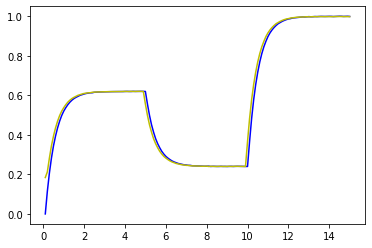

In [317]:
y_axis = values1 #network output
y = x_scaled # x noise
x_axis = x = t_save2
plt.plot(x,y,"b") #actual
plt.plot(x_axis,y_axis,"y")#noise
plt.show()

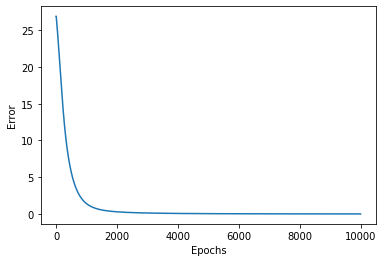

In [318]:
error_dataframe = {'Error':e1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

In [320]:
weights_df= pd.DataFrame(w1)
weights_df.to_csv("Sigmoid_Network_weights_8_inputs.csv")